##**MIT License**
Copyright (c) 2022   <br>  Kshama Aditi Lethakula



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##**Abstract**

A series of questions were raised to various working individuals and then analyzed their preference for working from home (WFH) or working from the office (WFO). Based on this data, I attempted to determine how accurate my model's predictions could be using these same factors. The target column contains the correct output with which we will use to train our model. We subsequently tested the model and compared the actual and predicted values.


##**Aim:** <br>

In this assignment we aim to create a complete ML project by combining Data Cleaning, Feature Selection, Modeling, and Interpretability into one report

##**Variable Description**

ID - Unique Identifier for each record
<br>
<br>
Name - Names of people (Real names has been modifed) <br> <br>
Age- The ages of the people who took the survey <br> <br>
Occupation - The type of work of the people who took the survey <br> <br>
Gender- The gender of the people who took the survey <br> <br>
Same_ofiice_home_location - Answers the question :Do you reside in the base location as your office? --> yes or no <br> <br>
kids - if they have kids or not. --> yes or no <br> <br>
RM_save_money - Answers the question :Do you feel you were able to save money with remote work? --> yes or no <br> <br>
RM_quality_time - Answers the question : Do you feel that remote work has given you more quality time with family/friends? --> yes or no <br> <br>
RM_better_sleep - Answers the question : Has your sleep cycle improved with work from home? --> yes or no <br> <br>
calmer_stressed - Answers the question : Are you calmer or more stressed than usual since remote work began? <br> <br>
RM_professional_growth - Answers the question :On a scale of 1-5, Do you feel WFH has affected your professional growth adversely?(5-yes it's affecting me badly,1 No it doesn't affect me) <br> <br>
RM_lazy - Answers the question : On a scale of 1-5,do you feel WFH has made you lazy?(5-extremely lazy,1-Nope, not lazy at all) <br> <br>
RM_productive - Answers the question : On a scale of 1-5, are you more productive with working remotely?(1-not productive at all,5-extremely productive) <br> <br>
digital_connect_sufficient - Answers the question : Do you feel digital connect is sufficient? <br> <br>
RM_better_work_life_balance - Answers the question : On a scale of 1-5,do you feel you have a better work-life balance with remote work?(1-No not at all,5-Yessssssss) <br> <br>
RM_improved_skillset - Answers the question : On a scale of 1-5,how much has your skillset improved in the last two years?(skillset with respect to your work domain,1:Not improved,5:Improved drastically) <br> <br>
RM_job_opportunities - Answers the question : Do you think there are more job opportunities with remote work? <br> <br>
Target - Answers the question : In the future which of the following do you think is more suited for you?(Sorry, but hybrid isn't an option here)

In [181]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**What question are you trying to answer?** 
<br>
**How did you frame it as an ML task?** <br>
Here I am trying to predict  if people prefer WFH vs WFO post Covid-19 given some of its features like kids, Age, Gender. The choice of wfh vs who is denoted by column 'Target' with values 0 and 1.To answer the question if people would prefer WFH or WFO post Covid-19, one has to gather data, preprocess the data, Split the data, define the features that seem significant to predict the target variable and we need an appropriate ML algorithm (ML)  based on the prediction between wfh and wfo and the nature of the data, followed by training evaluating and testing the model.

**What is human-level performance on that task? What level of performance is needed?** <br>
When an automated task requires machine learning (ML), human-level performance means the accuracy and effectiveness achieved by a human performing that same task. The primary objective of using ML to automate such tasks is to achieve performance that is at least as good as, if not better than, human-level performance. For instance, in image recognition, an ML system is designed to classify images into predefined categories like cat, dog, or car. Human-level performance in this task refers to the ability of a human observer to consistently and accurately classify images into their appropriate categories.

In [182]:
#reading data set
wfh_df_pandas = pd.read_csv('https://raw.githubusercontent.com/kshamaaditilethakula/wfh-wfo-prediction/main/WFH_WFO_dataset.csv')

In [183]:
wfh_df_pandas.head()

ID      Name  Age Occupation  Gender Same_ofiice_home_location kids  \
0   1   Bhavana   45      Tutor  Female                       Yes  Yes   
1   2     Harry   24      Tutor    Male                        No   No   
2   3  Banditaa   53         HR  Female                       Yes  Yes   
3   4    Neetha   26   Engineer  Female                       Yes   No   
4   5       Ram   26  Recruiter    Male                       Yes   No   

  RM_save_money RM_quality_time RM_better_sleep calmer_stressed  \
0           Yes             Yes             Yes          CALMER   
1            No              No              No          CALMER   
2           Yes             Yes             Yes          CALMER   
3           Yes             Yes              No        STRESSED   
4            No             Yes              No        STRESSED   

   RM_professional_growth  RM_lazy  RM_productive digital_connect_sufficient  \
0                       5        1              5                        Yes   
1                       2        2              2                         No   
2                       3        3              4                         No   
3                       3        4              4                         No   
4                       3        3              5                        Yes   

   RM_better_work_life_balance  RM_improved_skillset RM_job_opportunities  \
0                            5                     5                  Yes   
1                            3                     3                   No   
2                            5                     3                   No   
3                            4                     5                  Yes   
4                            4                     2                  Yes   

   Target  
0       1  
1       1  
2       1  
3       0  
4       1

In [184]:
#Dropping irrelevant columns
wfh_df_pandas.drop(['ID','Name'],axis= 1, inplace= True)

**Where did the feature data and label come from?** <br>
I used the WFH_WFO_dataset and the dataset contains 207 different values of different attributes collected to predict if people would prefer WFH vs WFO post Covid-19
ID - Unique Identifier for each record
<br>
<br>
Name  <br> <br>
Age <br> <br>
Occupation <br> <br>
Gender<br> <br>
Same_ofiice_home_location --> yes or no <br> <br>
kids  --> yes or no <br> <br>
RM_save_money  --> yes or no <br> <br>
RM_quality_time --> yes or no <br> <br>
RM_better_sleep --> yes or no <br> <br>
calmer_stressed -  Calmer or Stressed <br> <br>
RM_professional_growth --On a scale of 1-5, Do you feel WFH has affected your professional growth adversely?(5-yes it's affecting me badly,1 No it doesn't affect me) <br> <br>
RM_lazy - Answers the question : On a scale of 1-5,do you feel WFH has made you lazy?(5-extremely lazy,1-Nope, not lazy at all) <br> <br>
RM_productive - Answers the question : On a scale of 1-5, are you more productive with working remotely?(1-not productive at all,5-extremely productive) <br> <br>
digital_connect_sufficient - Answers the question : Do you feel digital connect is sufficient? <br> <br>
RM_better_work_life_balance - Answers the question : On a scale of 1-5,do you feel you have a better work-life balance with remote work?(1-No not at all,5-Yessssssss) <br> <br>
RM_improved_skillset - Answers the question : On a scale of 1-5,how much has your skillset improved in the last two years?(skillset with respect to your work domain,1:Not improved,5:Improved drastically) <br> <br>
RM_job_opportunities - Answers the question : Do you think there are more job opportunities with remote work? <br> <br>
Target - Answers the question : In the future which of the following do you think is more suited for you?

##**Exploratory Data Analysis**


In [185]:
# Checking Data Type of each variable
wfh_df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          207 non-null    int64 
 1   Occupation                   207 non-null    object
 2   Gender                       207 non-null    object
 3   Same_ofiice_home_location    207 non-null    object
 4   kids                         207 non-null    object
 5   RM_save_money                207 non-null    object
 6   RM_quality_time              207 non-null    object
 7   RM_better_sleep              207 non-null    object
 8   calmer_stressed              207 non-null    object
 9   RM_professional_growth       207 non-null    int64 
 10  RM_lazy                      207 non-null    int64 
 11  RM_productive                207 non-null    int64 
 12  digital_connect_sufficient   207 non-null    object
 13  RM_better_work_life_balance  207 no

In [186]:
# Checking for any null values in the dataset, as we hav no null values - we are good to go.
wfh_df_pandas.isnull().sum()

Age                            0
Occupation                     0
Gender                         0
Same_ofiice_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

In [187]:
# Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result
wfh_df_pandas.shape

(207, 17)

In [188]:
columns = list(wfh_df_pandas.columns)
print(columns)  # Name of all predictors and result

['Age', 'Occupation', 'Gender', 'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth', 'RM_lazy', 'RM_productive', 'digital_connect_sufficient', 'RM_better_work_life_balance', 'RM_improved_skillset', 'RM_job_opportunities', 'Target']


In [189]:
print(wfh_df_pandas.info())
print(wfh_df_pandas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          207 non-null    int64 
 1   Occupation                   207 non-null    object
 2   Gender                       207 non-null    object
 3   Same_ofiice_home_location    207 non-null    object
 4   kids                         207 non-null    object
 5   RM_save_money                207 non-null    object
 6   RM_quality_time              207 non-null    object
 7   RM_better_sleep              207 non-null    object
 8   calmer_stressed              207 non-null    object
 9   RM_professional_growth       207 non-null    int64 
 10  RM_lazy                      207 non-null    int64 
 11  RM_productive                207 non-null    int64 
 12  digital_connect_sufficient   207 non-null    object
 13  RM_better_work_life_balance  207 no

In [190]:
wfh_df_pandas['Occupation'] = wfh_df_pandas['Occupation'].astype('category').cat.codes
wfh_df_pandas['Gender'] = wfh_df_pandas['Gender'].astype('category').cat.codes
wfh_df_pandas['Same_ofiice_home_location'] = wfh_df_pandas['Same_ofiice_home_location'].astype('category').cat.codes
wfh_df_pandas['kids'] = wfh_df_pandas['kids'].astype('category').cat.codes
wfh_df_pandas['RM_save_money'] = wfh_df_pandas['RM_save_money'].astype('category').cat.codes
wfh_df_pandas['RM_quality_time'] = wfh_df_pandas['RM_quality_time'].astype('category').cat.codes
wfh_df_pandas['RM_better_sleep'] = wfh_df_pandas['RM_better_sleep'].astype('category').cat.codes
wfh_df_pandas['calmer_stressed'] = wfh_df_pandas['calmer_stressed'].astype('category').cat.codes
wfh_df_pandas['digital_connect_sufficient'] = wfh_df_pandas['digital_connect_sufficient'].astype('category').cat.codes
wfh_df_pandas['RM_job_opportunities'] = wfh_df_pandas['RM_job_opportunities'].astype('category').cat.codes
wfh_df_pandas['RM_improved_skillset'] = wfh_df_pandas['RM_job_opportunities'].astype('category').cat.codes
wfh_df_pandas['RM_lazy'] = wfh_df_pandas['RM_lazy'].astype('category').cat.codes



Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 15.40it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.496383  1053.974092 -1238.191770     inf      0.191036   
lognorm          0.562871   884.282625 -1206.838437     inf      0.148315   
gamma            0.585093   864.628080 -1198.823254     inf      0.180550   
expon            0.607645   851.281465 -1196.327503     inf      0.200809   
exponpow         0.625530   783.548089 -1184.989862     inf      0.322792   

             ks_pvalue  
cauchy    4.328604e-07  
lognorm   1.938656e-04  
gamma     2.240613e-06  
expon     8.580896e-08  
exponpow  1.076772e-19  


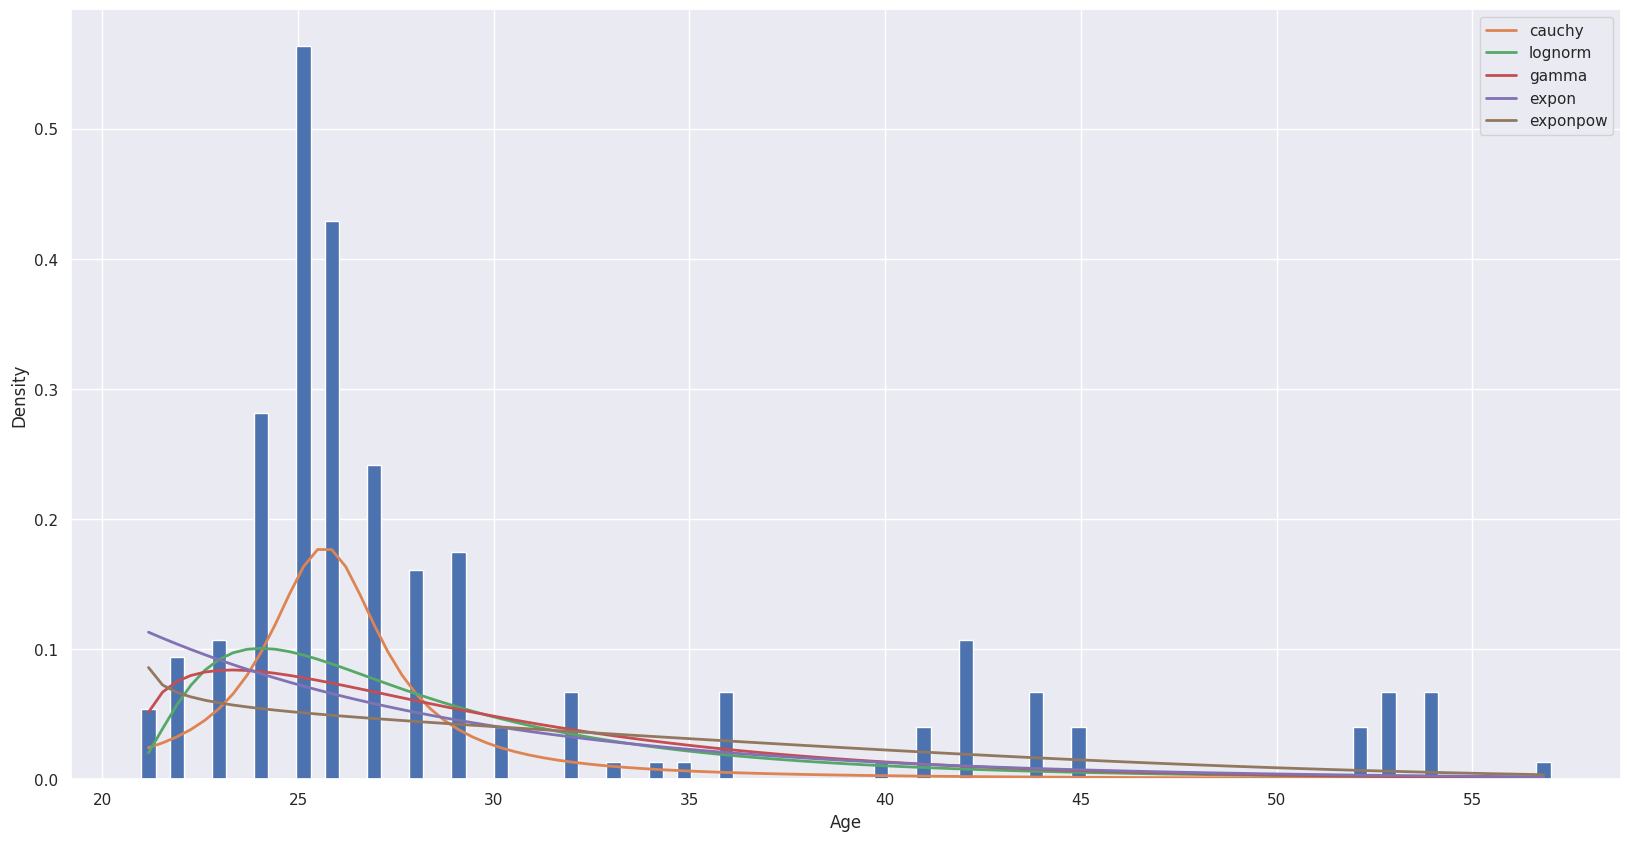

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.06it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow        40.573199  405.940750 -321.331333     inf      0.151546   
chi2            40.700338  437.679927 -320.683700     inf      0.229836   
gamma           40.845861  513.976668 -319.944894     inf      0.468658   
uniform         40.857365  362.351894 -325.219324     inf      0.205314   
expon           41.003074  424.510008 -324.482415     inf      0.179363   

             ks_pvalue  
exponpow  1.290417e-04  
chi2      4.279751e-10  
gamma     3.295962e-42  
uniform   3.956854e-08  
expon     2.682481e-06  


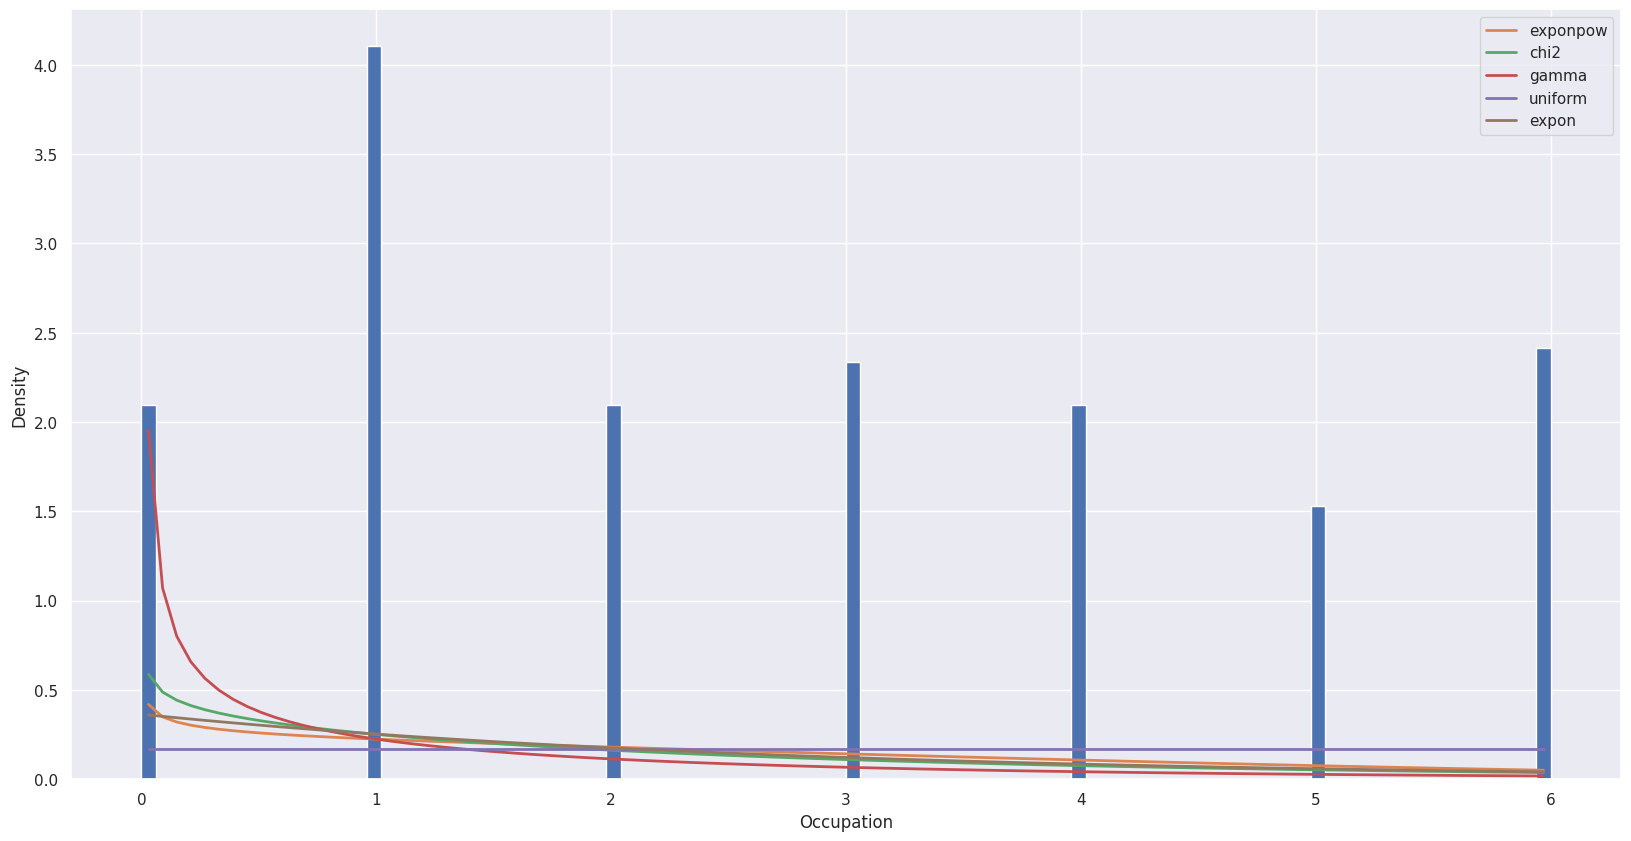

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.31it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      4111.015712  161.542273  634.660426     inf      0.516908   
lognorm       4222.888761  441.280156  640.218232     inf      0.516908   
chi2          4671.634335  125.495480  661.123067     inf      0.516908   
expon         4870.266225   65.490279  664.409751     inf      0.516908   
uniform       4905.717753    4.000000  665.911083     inf      0.516908   

             ks_pvalue  
exponpow  6.342612e-52  
lognorm   6.342675e-52  
chi2      6.342612e-52  
expon     6.342612e-52  
uniform   6.342612e-52  


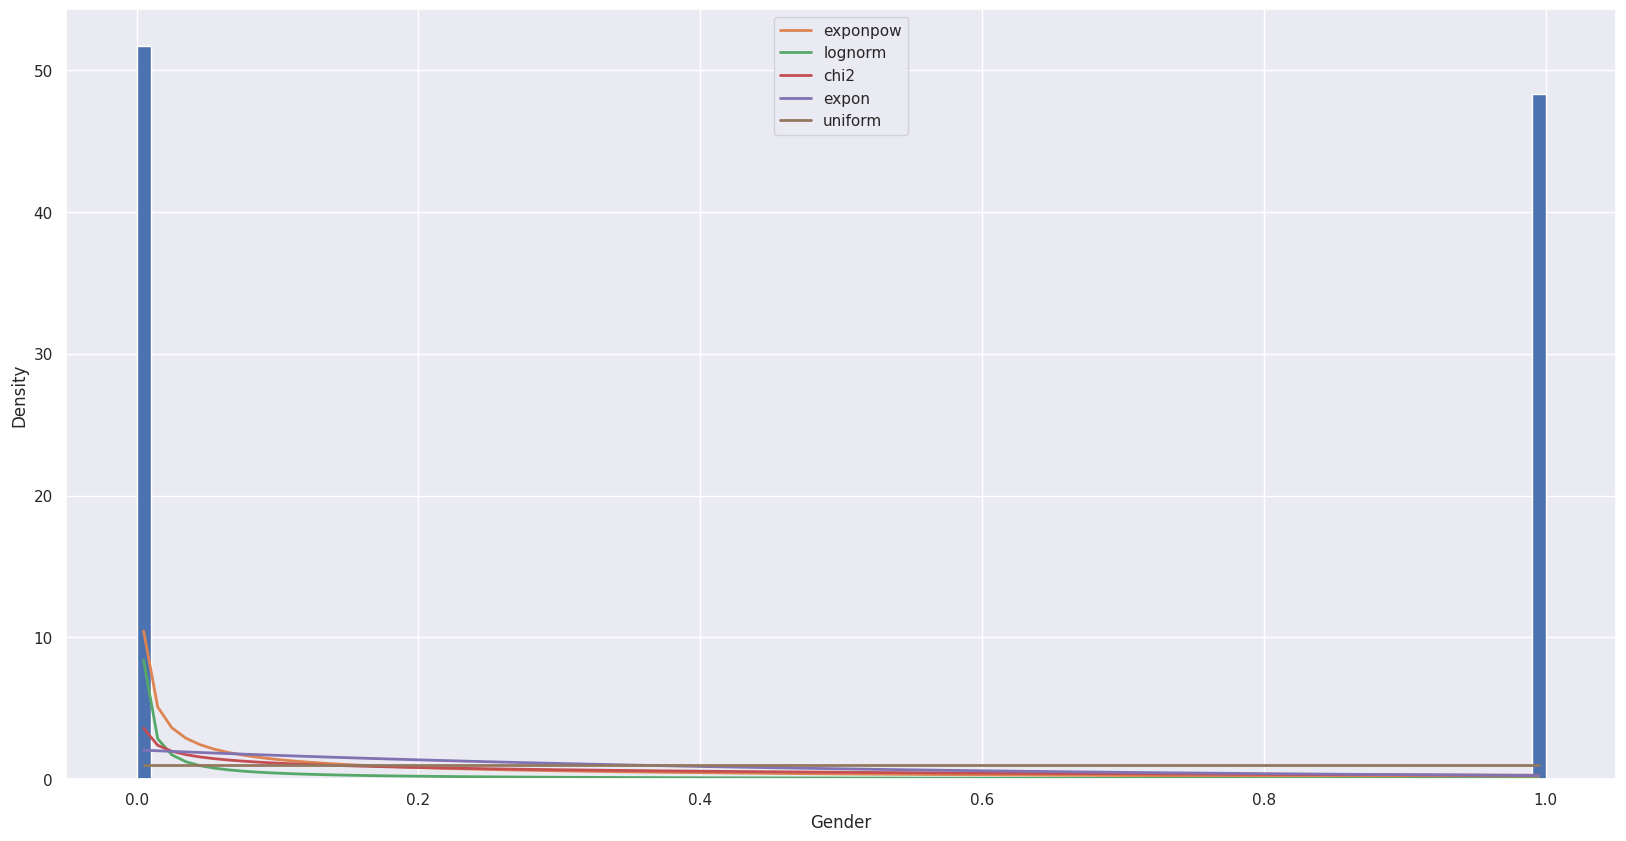

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.23it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      1083.337533  248.348997  358.600352     inf      0.487923   
chi2          1104.292453  243.233349  362.566106     inf      0.487923   
lognorm       1143.841208  726.220453  369.849869     inf      0.469264   
expon         1180.297680  258.937896  371.011692     inf      0.487923   
uniform       1213.476977  142.629436  376.750373     inf      0.495169   

             ks_pvalue  
exponpow  6.117144e-46  
chi2      6.117144e-46  
lognorm   2.531823e-42  
expon     6.117144e-46  
uniform   2.152121e-47  


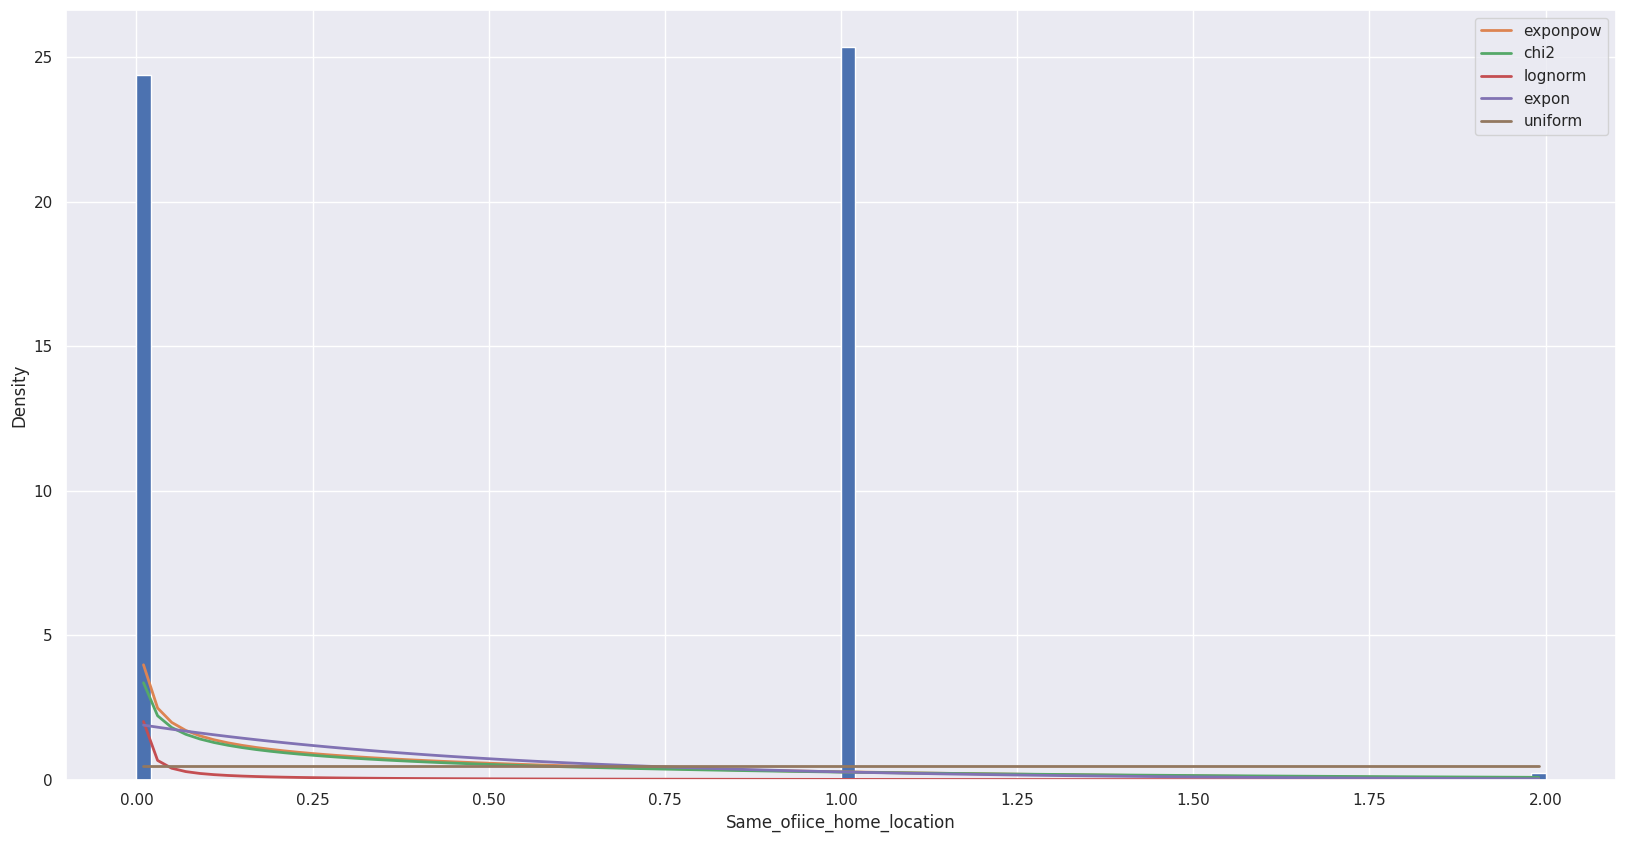

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      4267.241327  265.041669  642.380994     inf      0.710144   
gamma         4720.993007  232.804941  663.298675     inf      0.710145   
chi2          4984.205727  112.821122  674.529439     inf      0.710145   
expon         5567.430203  101.325154  692.103242     inf      0.710145   
uniform       5783.217811    4.000000  699.974760     inf      0.710145   

              ks_pvalue  
exponpow  9.006436e-106  
gamma     8.996502e-106  
chi2      8.996502e-106  
expon     8.996502e-106  
uniform   8.996502e-106  


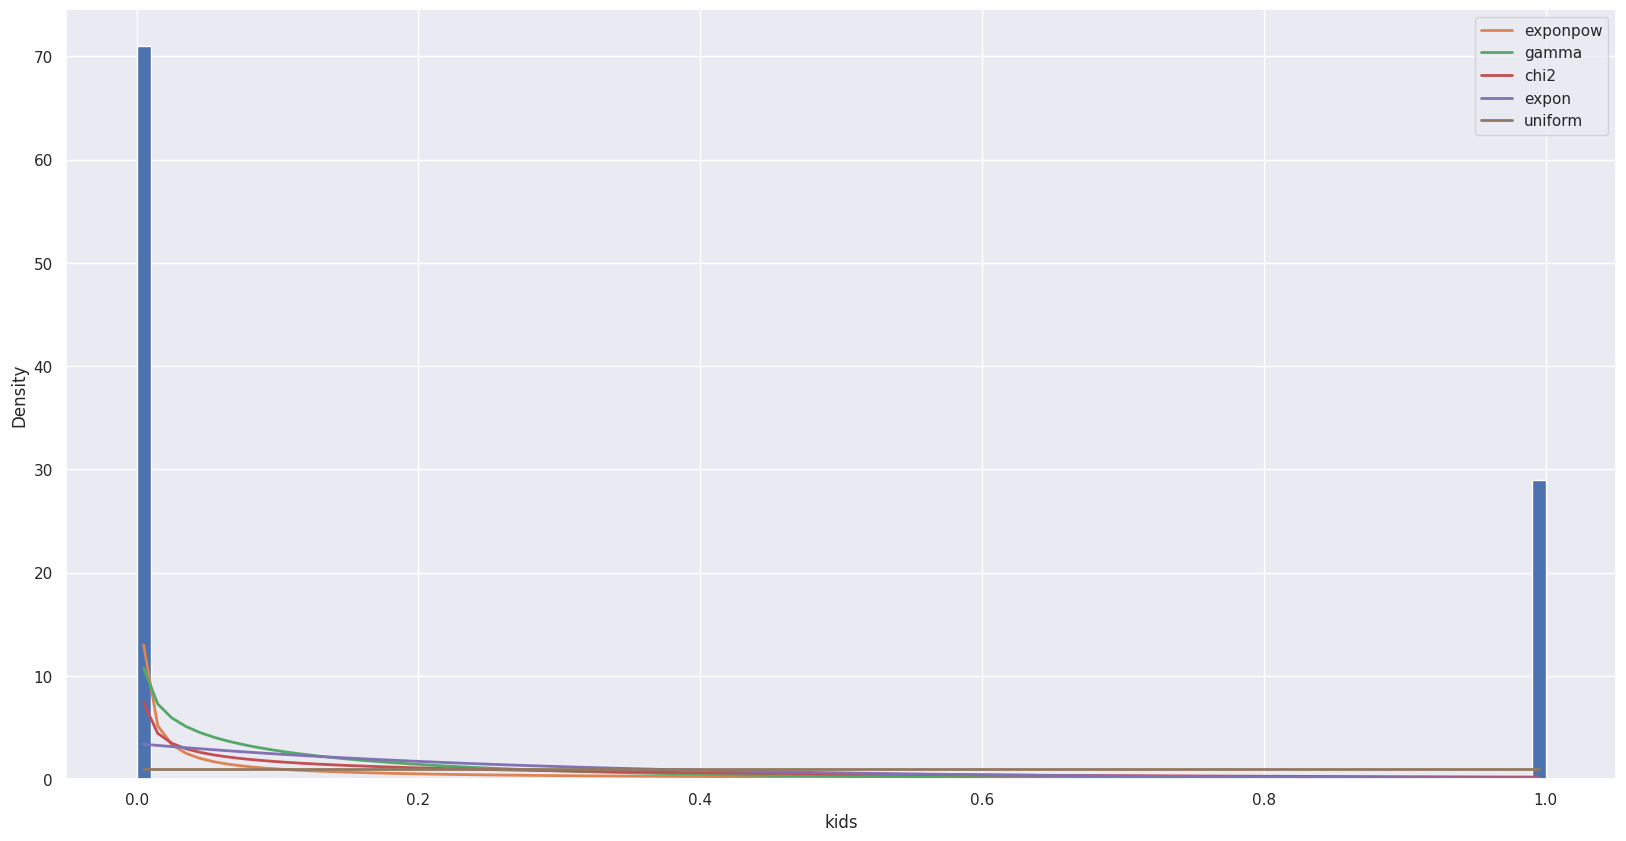

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.35it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow      6074.962832  159.932302  715.495114     inf      0.523333   
chi2          6135.943397  101.783086  717.562624     inf      0.508920   
uniform       6186.494434    4.000000  713.928290     inf      0.753623   
norm          6208.447355   98.932511  714.661534     inf      0.469885   
lognorm       6208.529668  100.977949  719.996998     inf      0.469590   

              ks_pvalue  
exponpow   2.590148e-53  
chi2       3.140066e-50  
uniform   1.973172e-122  
norm       1.931958e-42  
lognorm    2.196862e-42  


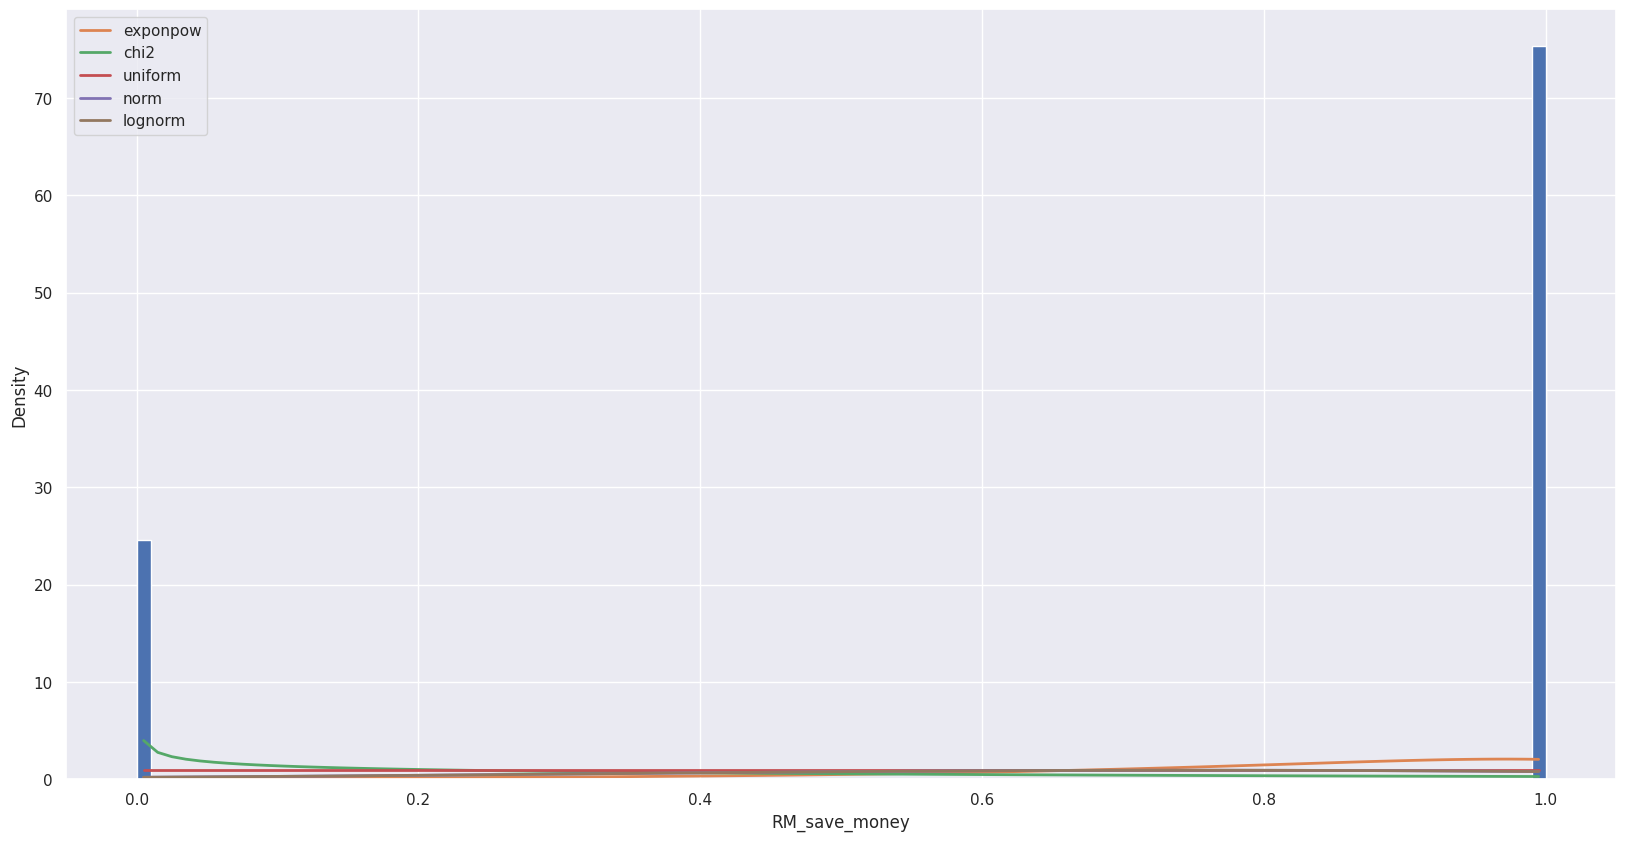

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.90it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2          4874.288517  182.551384  669.913358     inf      0.462092   
lognorm       5027.180247  815.293563  676.306572     inf      0.645627   
exponpow      5209.323310  106.382930  683.673852     inf      0.376546   
uniform       5363.137996    4.000000  684.364685     inf      0.652174   
expon         5386.883740   71.844530  685.279172     inf      0.436359   

             ks_pvalue  
chi2      5.575652e-41  
lognorm   1.184601e-84  
exponpow  7.131513e-27  
uniform   1.251028e-86  
expon     2.261141e-36  


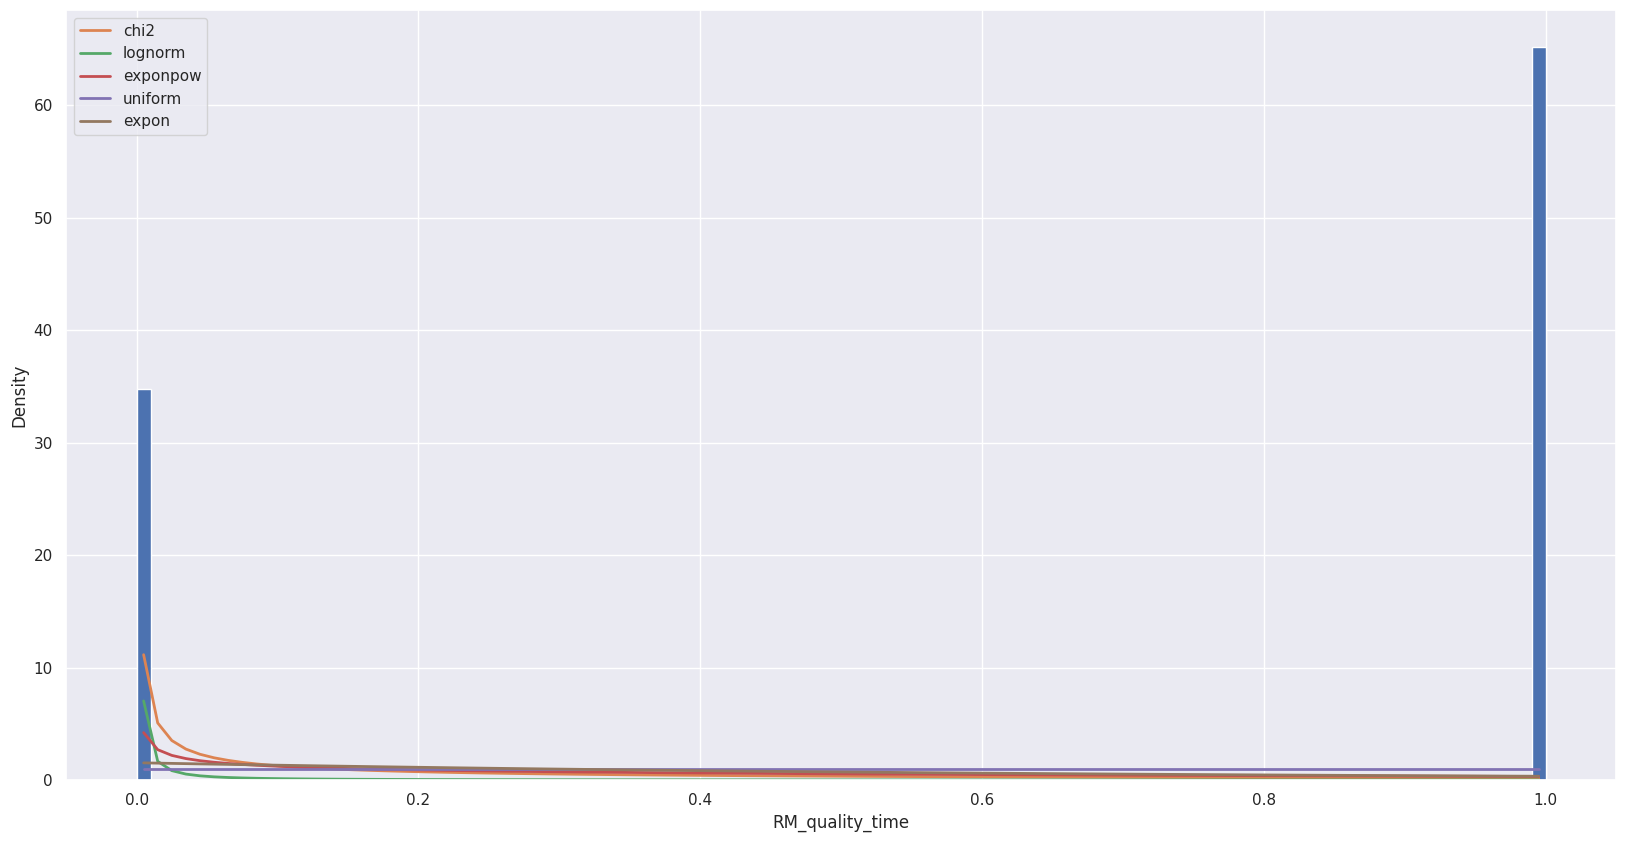

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.18it/s]


          sumsquare_error          aic         bic  kl_div  ks_statistic  \
exponpow      3889.276396   242.213170  623.182896     inf      0.550724   
gamma         4548.568092   165.920890  655.596892     inf      0.550725   
chi2          4817.023280   134.886484  667.467034     inf      0.550725   
expon         4897.157647    66.556785  665.549568     inf      0.550725   
lognorm       4951.041547  1707.340342  673.147488     inf      0.550339   

             ks_pvalue  
exponpow  1.685243e-59  
gamma     1.684856e-59  
chi2      1.684802e-59  
expon     1.684802e-59  
lognorm   2.073168e-59  


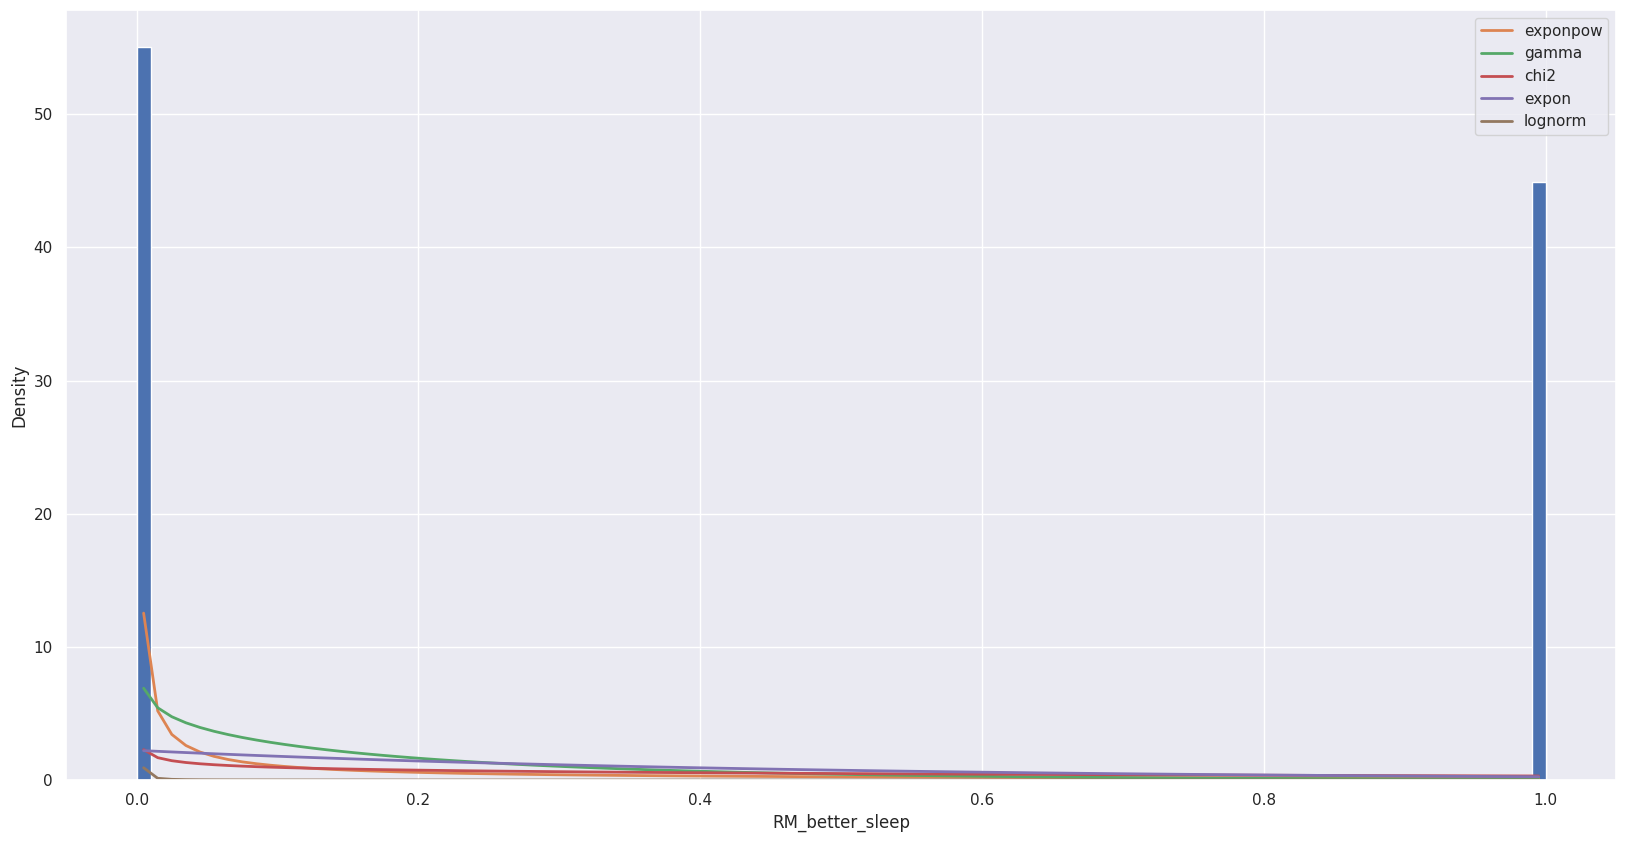

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.33it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2          4454.967357  210.603193  651.292794     inf      0.486838   
exponpow      4472.052109  216.432649  652.085118     inf      0.432060   
lognorm       4760.110875  464.136994  665.006798     inf      0.484165   
uniform       5136.294896    4.000000  675.418710     inf      0.608696   
expon         5148.836882   68.998337  675.923554     inf      0.415269   

             ks_pvalue  
chi2      1.004007e-45  
exponpow  1.237761e-35  
lognorm   3.384222e-45  
uniform   4.010946e-74  
expon     7.808116e-33  


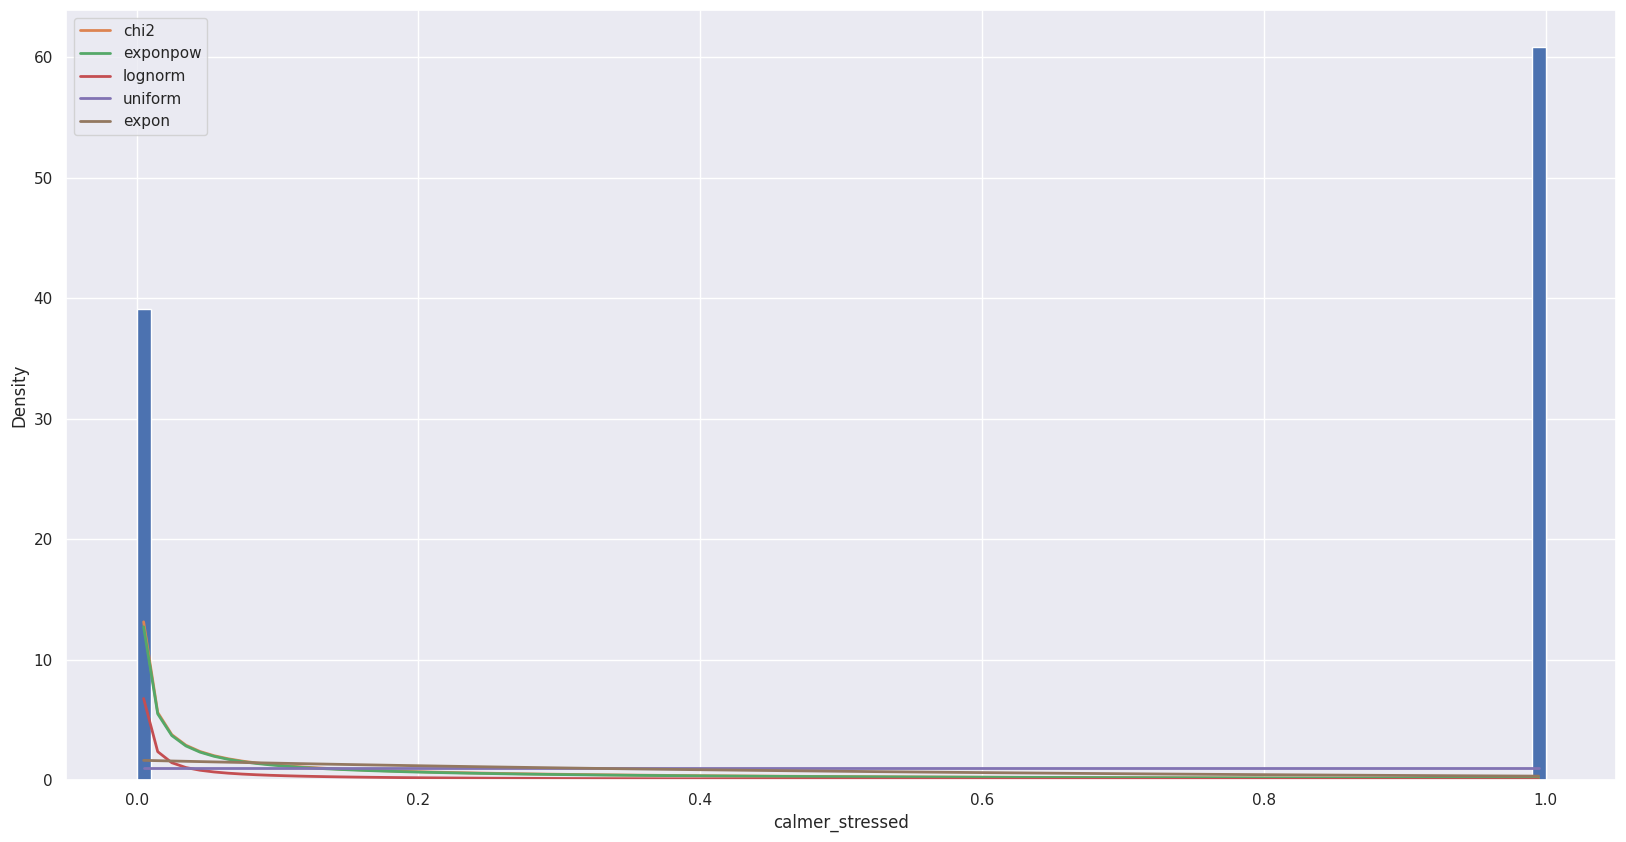

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.33it/s]


          sumsquare_error         aic        bic  kl_div  ks_statistic  \
cauchy         156.278052  384.481005 -47.518534     inf      0.190183   
norm           156.739651  317.953285 -46.908019     inf      0.207241   
lognorm        156.740629  320.090796 -41.574008     inf      0.205965   
exponpow       156.745702  307.061741 -41.567309     inf      0.204591   
gamma          156.789506  319.784203 -41.509469     inf      0.217653   

             ks_pvalue  
cauchy    4.965813e-07  
norm      2.826357e-08  
lognorm   3.533146e-08  
exponpow  4.485645e-08  
gamma     4.334411e-09  


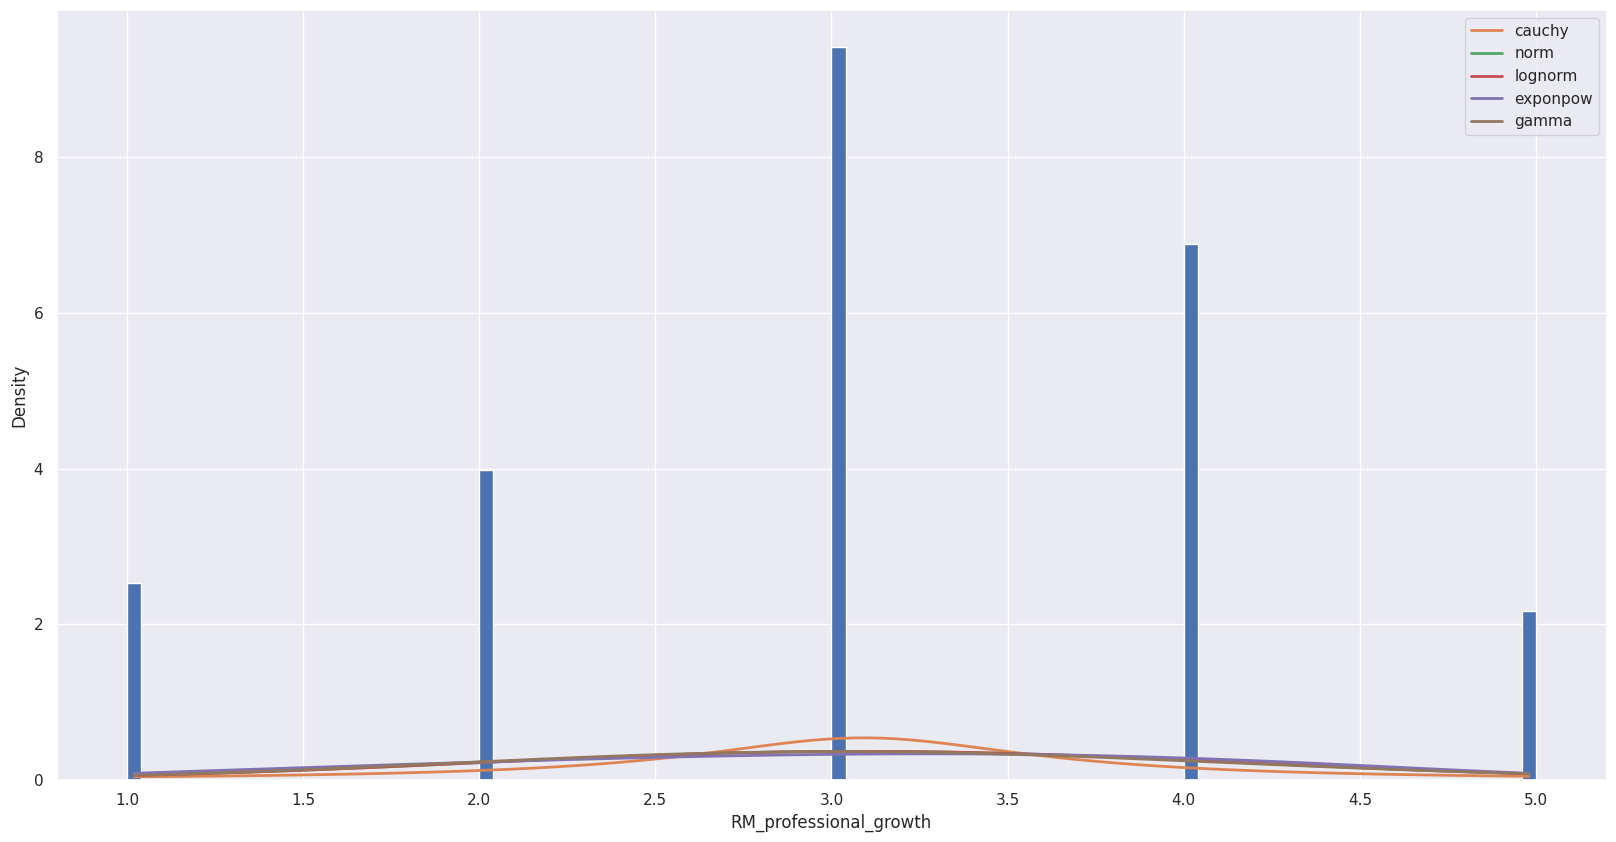

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.06it/s]


          sumsquare_error         aic        bic  kl_div  ks_statistic  \
exponpow       153.645123  324.813472 -45.703006     inf      0.336045   
uniform        153.774155  281.258872 -50.861958     inf      0.239130   
chi2           153.835794  357.400048 -45.446281     inf      0.303881   
norm           154.601057  318.462663 -49.751822     inf      0.212667   
lognorm        154.615161  320.421780 -44.400220     inf      0.213928   

             ks_pvalue  
exponpow  2.381489e-21  
uniform   6.694916e-11  
chi2      1.851355e-17  
norm      1.076612e-08  
lognorm   8.571433e-09  


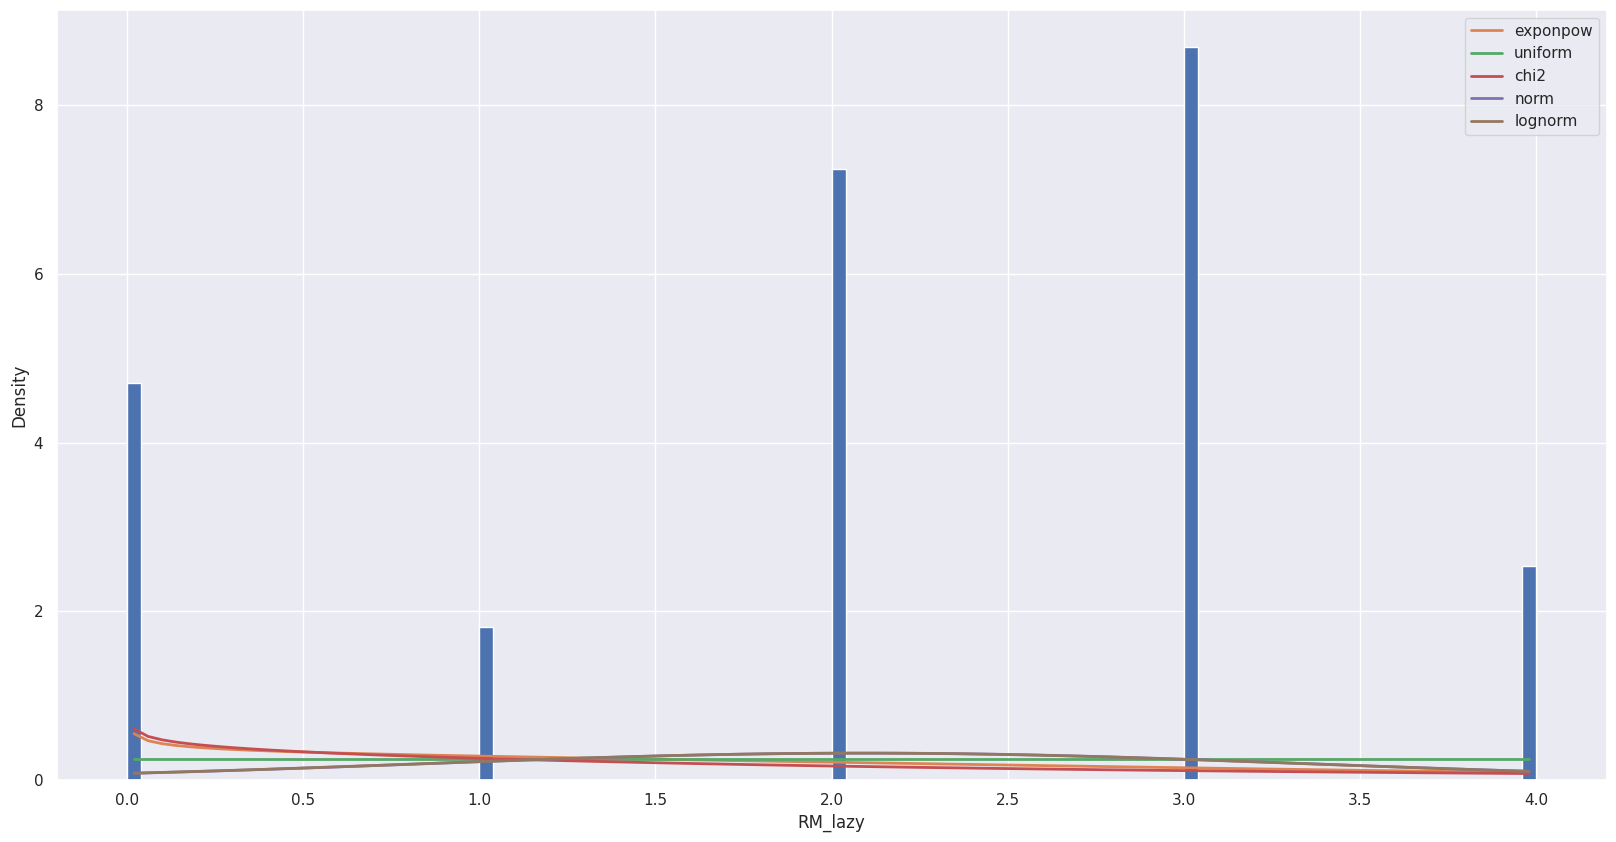

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.34it/s]


          sumsquare_error         aic        bic  kl_div  ks_statistic  \
powerlaw       162.913751  328.227605 -33.577903     inf      0.217391   
exponpow       164.051050  345.758839 -32.137858     inf      0.191769   
norm           164.106667  360.794169 -37.400411     inf      0.198383   
lognorm        164.113731  363.303362 -32.058783     inf      0.199781   
gamma          164.125248  364.405291 -32.044256     inf      0.205740   

             ks_pvalue  
powerlaw  4.549180e-09  
exponpow  3.844839e-07  
norm      1.292236e-07  
lognorm   1.021378e-07  
gamma     3.673948e-08  


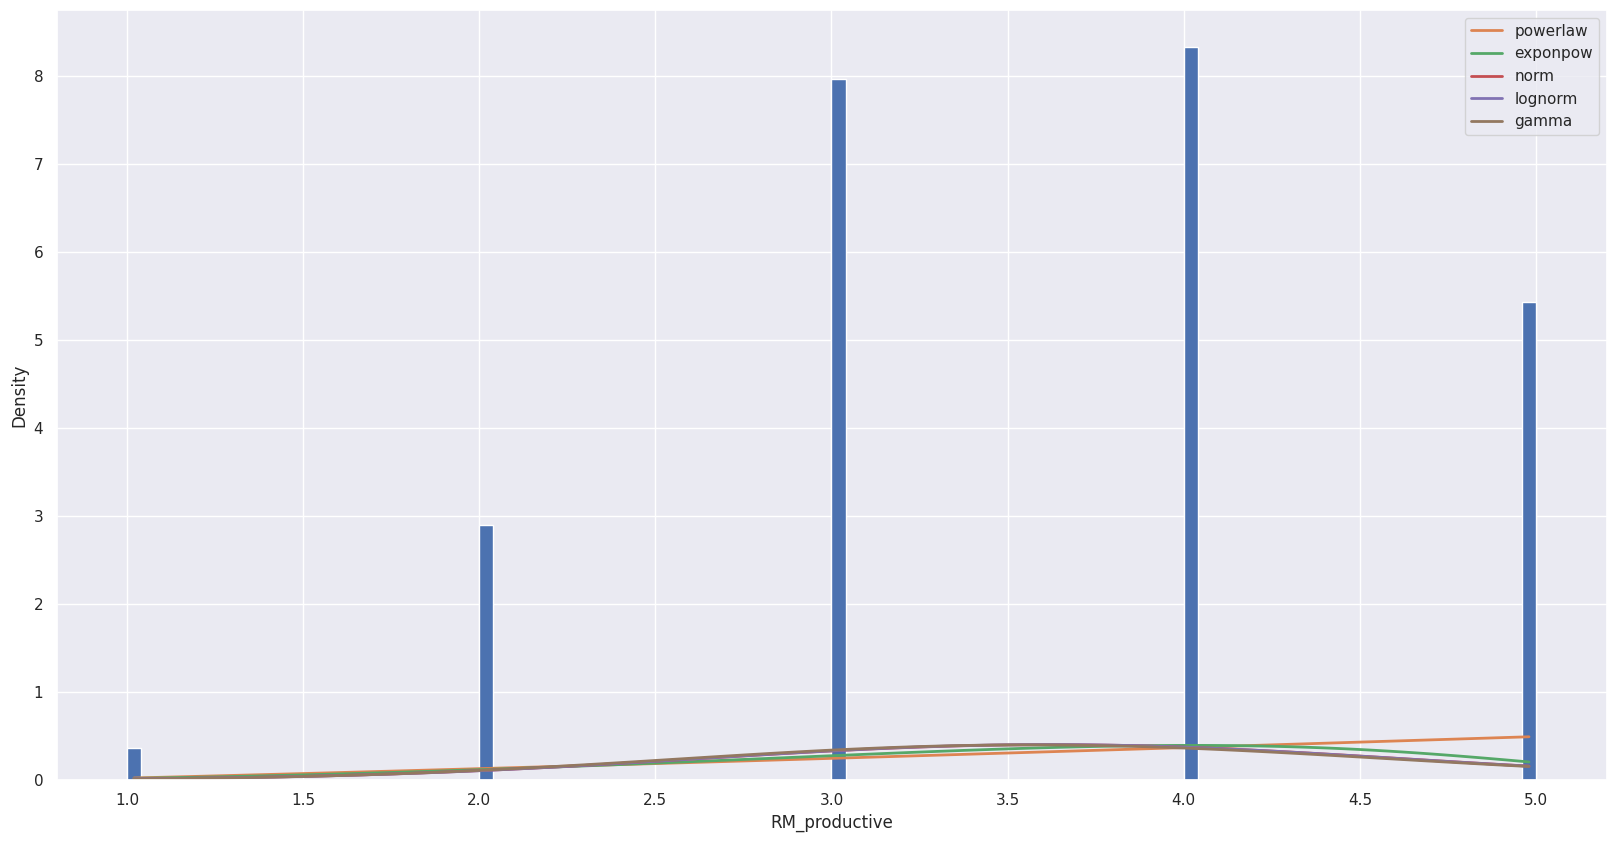

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.26it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm       3911.154331  362.394197  624.344048     inf      0.521739   
exponpow      4203.786204  156.334139  639.279727     inf      0.521739   
chi2          4672.166277  125.495480  661.146636     inf      0.521739   
expon         4871.505869   65.571120  664.462432     inf      0.521739   
uniform       4909.451796    4.000000  666.068583     inf      0.521739   

             ks_pvalue  
lognorm   5.756193e-53  
exponpow  5.756190e-53  
chi2      5.756190e-53  
expon     5.756190e-53  
uniform   5.756190e-53  


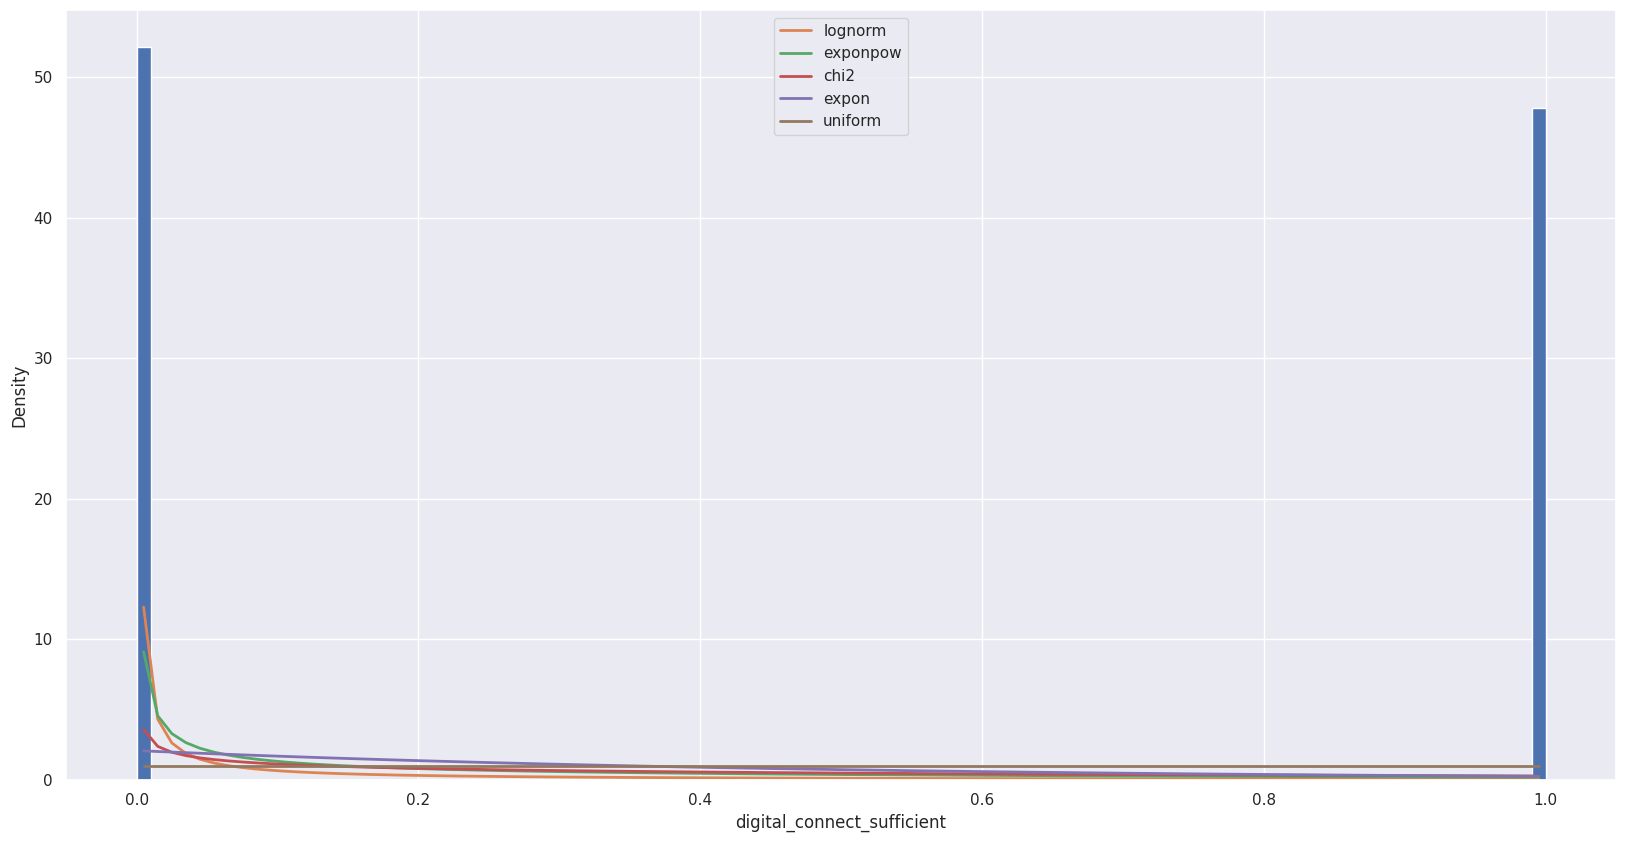

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 15.12it/s]


          sumsquare_error         aic        bic  kl_div  ks_statistic  \
powerlaw       124.697265  476.966618 -88.915627     inf      0.650356   
chi2           127.818264  382.888937 -83.798479     inf      0.351814   
uniform        129.619565  281.258872 -86.234379     inf      0.166667   
exponpow       130.470668  306.705938 -79.546908     inf      0.195942   
norm           130.523045  317.737654 -84.796544     inf      0.170235   

             ks_pvalue  
powerlaw  4.462349e-86  
chi2      2.043441e-23  
uniform   1.706651e-05  
exponpow  1.941161e-07  
norm      1.028968e-05  


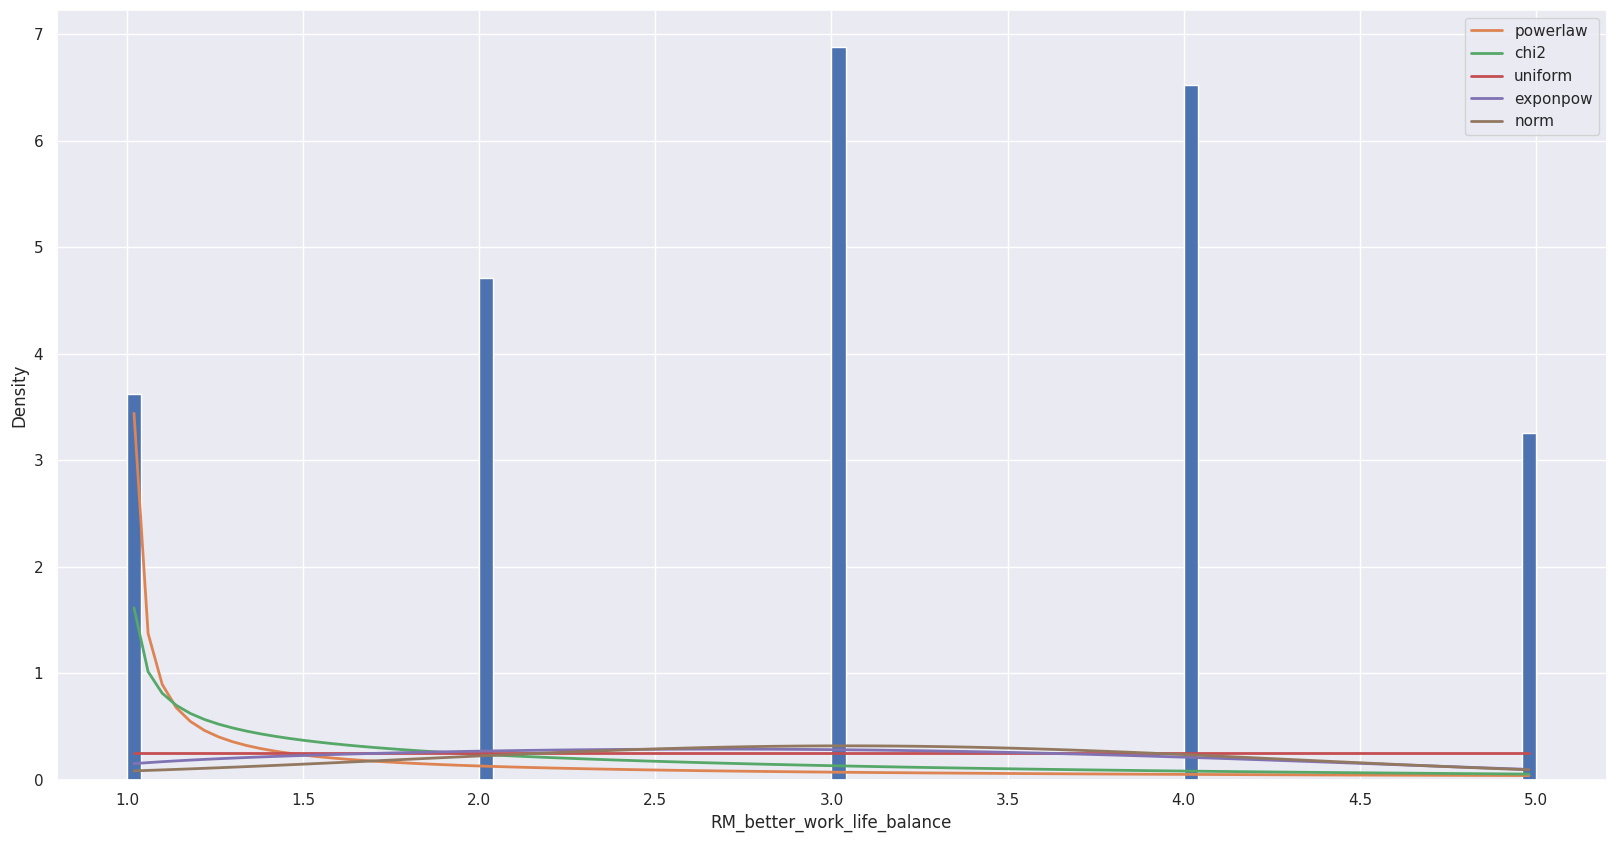

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow       821.399450  275.698798  301.304339     inf      0.447863   
uniform        862.943709  142.629436  306.184986     inf      0.362319   
chi2           865.609713  269.950355  312.156231     inf      0.435249   
cauchy         868.023617  236.690424  307.399965     inf      0.236245   
expon          869.533813  205.751814  307.759792     inf      0.365087   

             ks_pvalue  
exponpow  2.160147e-38  
uniform   7.491420e-25  
chi2      3.514292e-36  
cauchy    1.200820e-10  
expon     3.078106e-25  


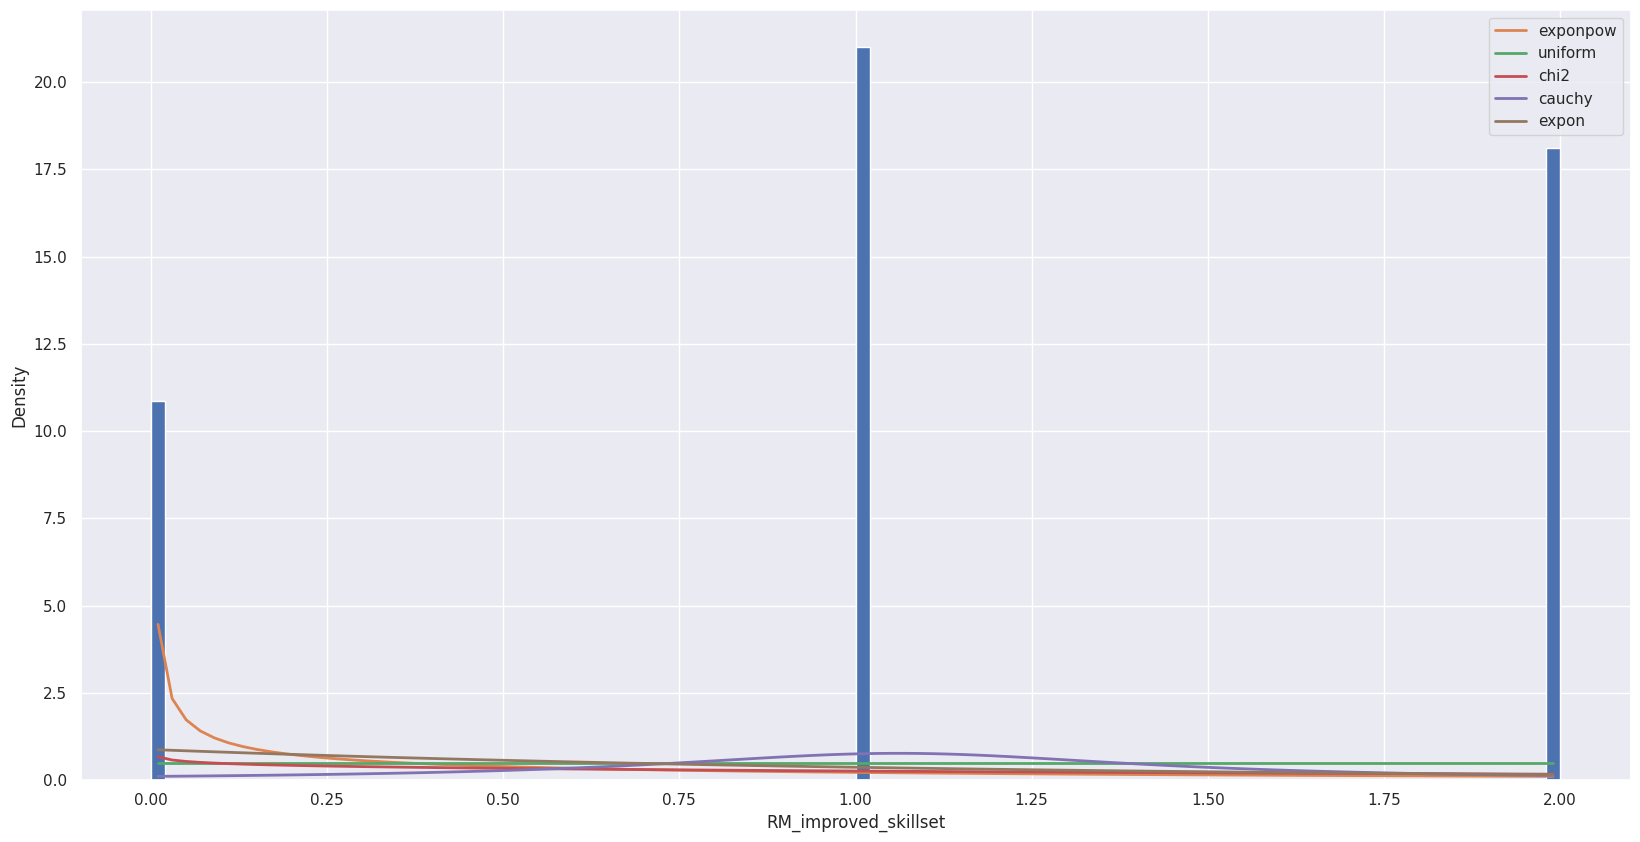

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.54it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow       821.399450  275.698798  301.304339     inf      0.447863   
uniform        862.943709  142.629436  306.184986     inf      0.362319   
chi2           865.609713  269.950355  312.156231     inf      0.435249   
cauchy         868.023617  236.690424  307.399965     inf      0.236245   
expon          869.533813  205.751814  307.759792     inf      0.365087   

             ks_pvalue  
exponpow  2.160147e-38  
uniform   7.491420e-25  
chi2      3.514292e-36  
cauchy    1.200820e-10  
expon     3.078106e-25  


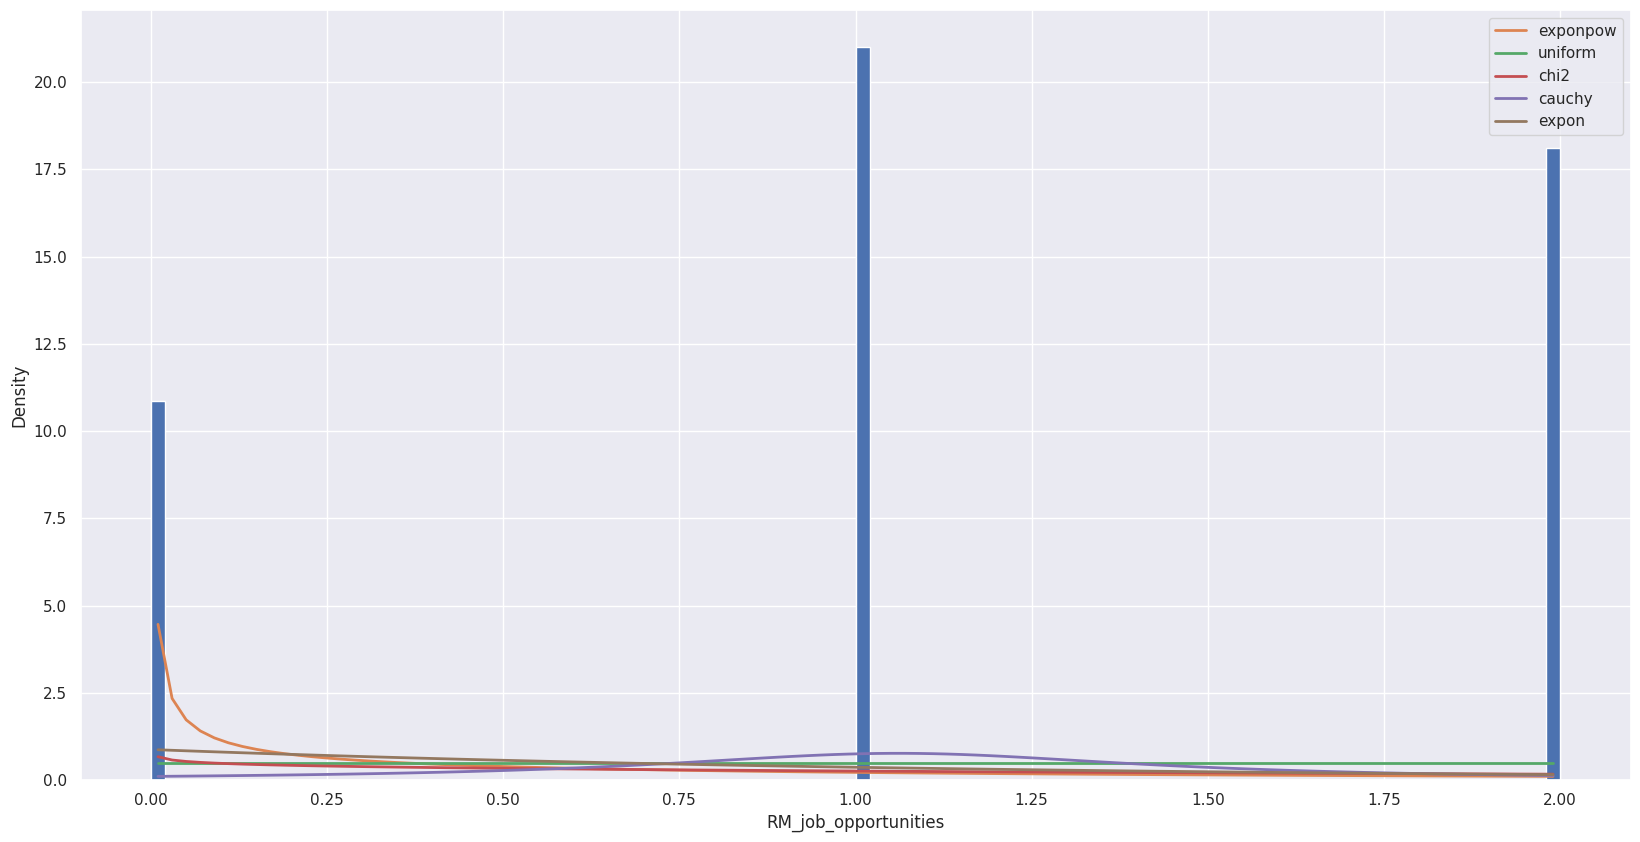

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
gamma         3352.306114  430.254870  592.427949     inf      0.594202   
lognorm       4329.609832  478.137911  645.384537     inf      0.594201   
chi2          4925.801038  134.888308  672.089499     inf      0.594203   
exponpow      4984.155946   45.586826  674.527371     inf      0.594203   
expon         4993.298233   70.048173  669.573999     inf      0.594203   

             ks_pvalue  
gamma     2.926932e-70  
lognorm   2.928208e-70  
chi2      2.925203e-70  
exponpow  2.925203e-70  
expon     2.925203e-70  


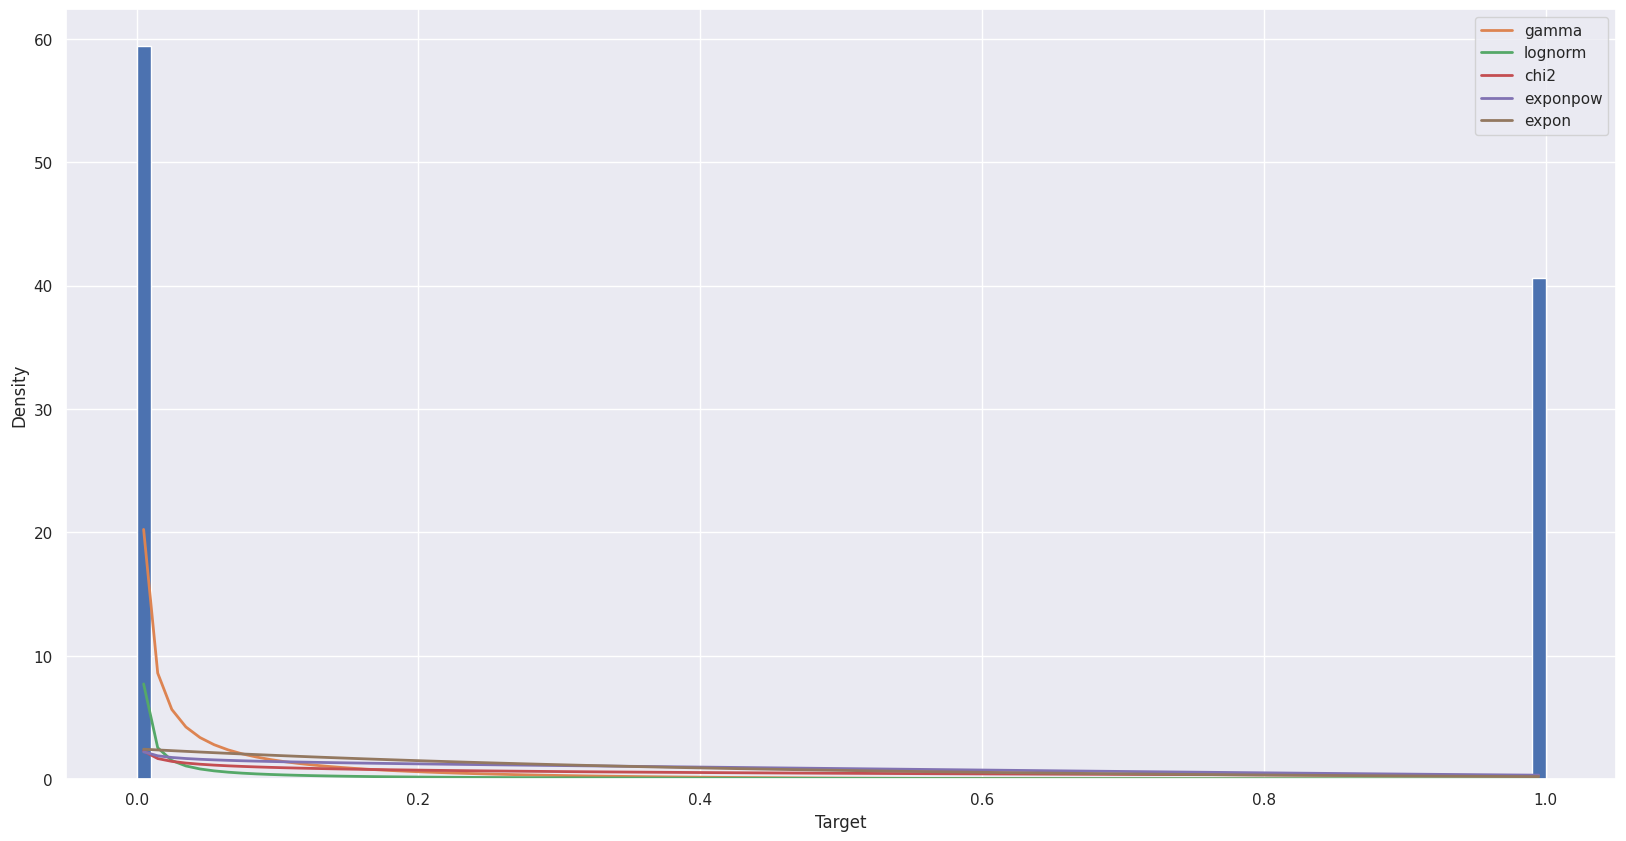

In [191]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in wfh_df_pandas.columns:
    values = wfh_df_pandas[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

<Axes: >

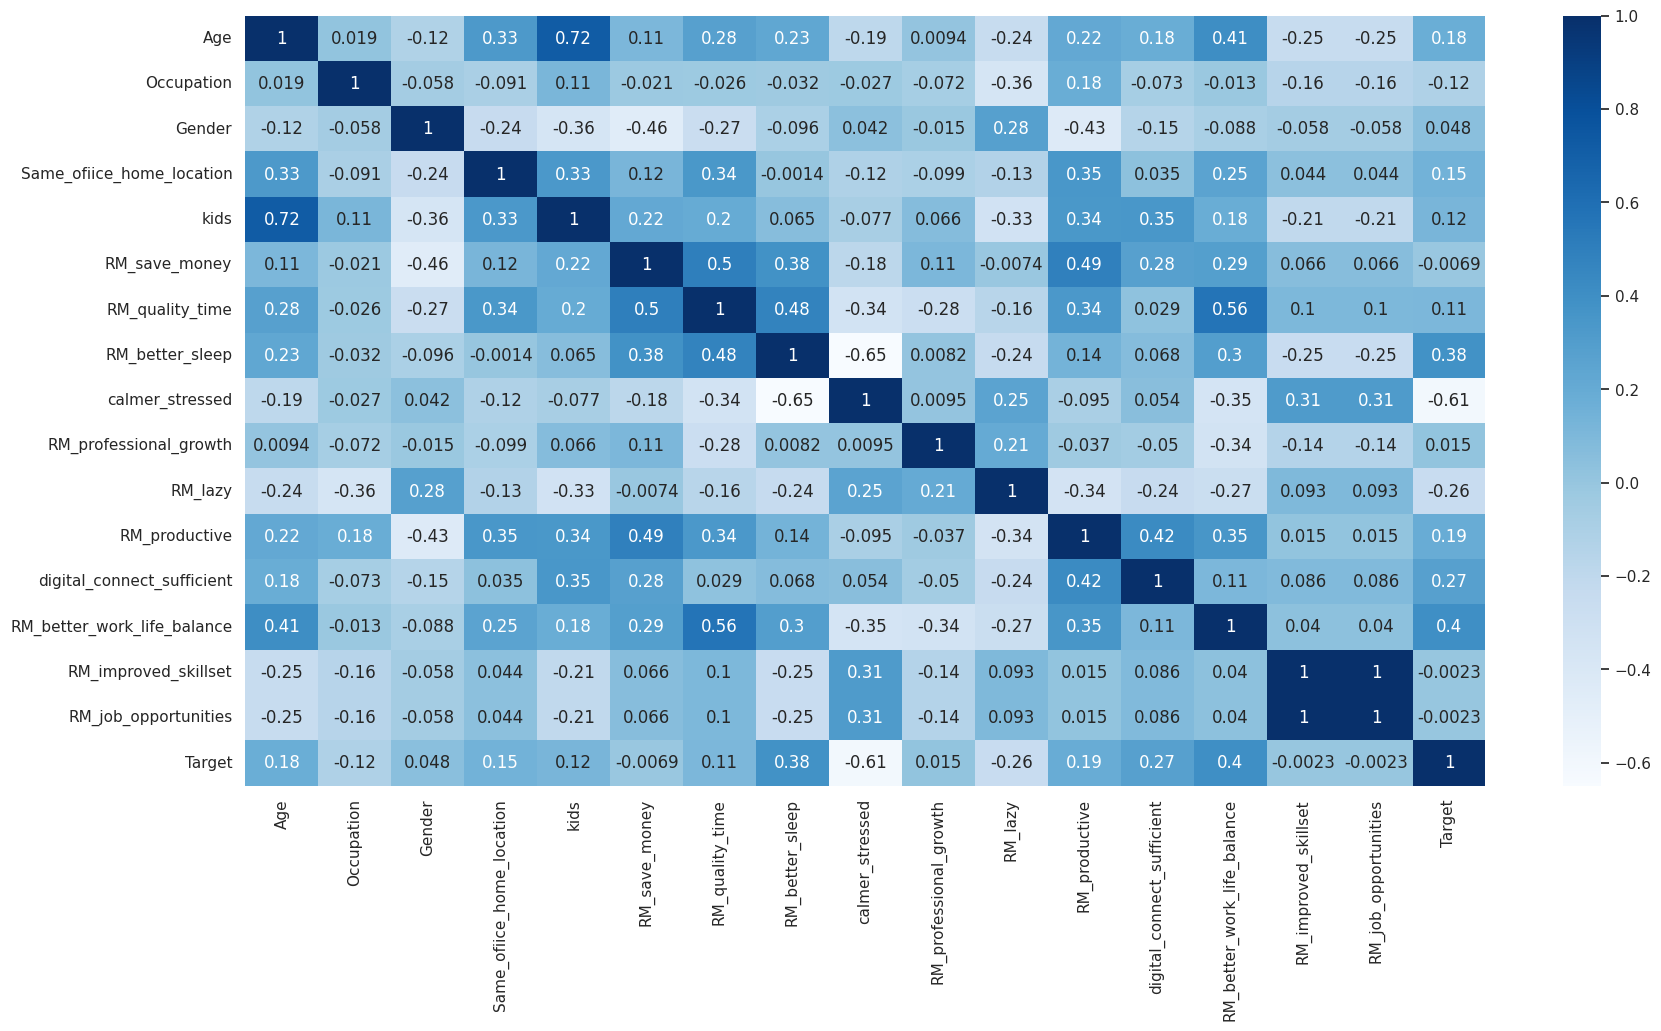

In [248]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    wfh_df_pandas.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

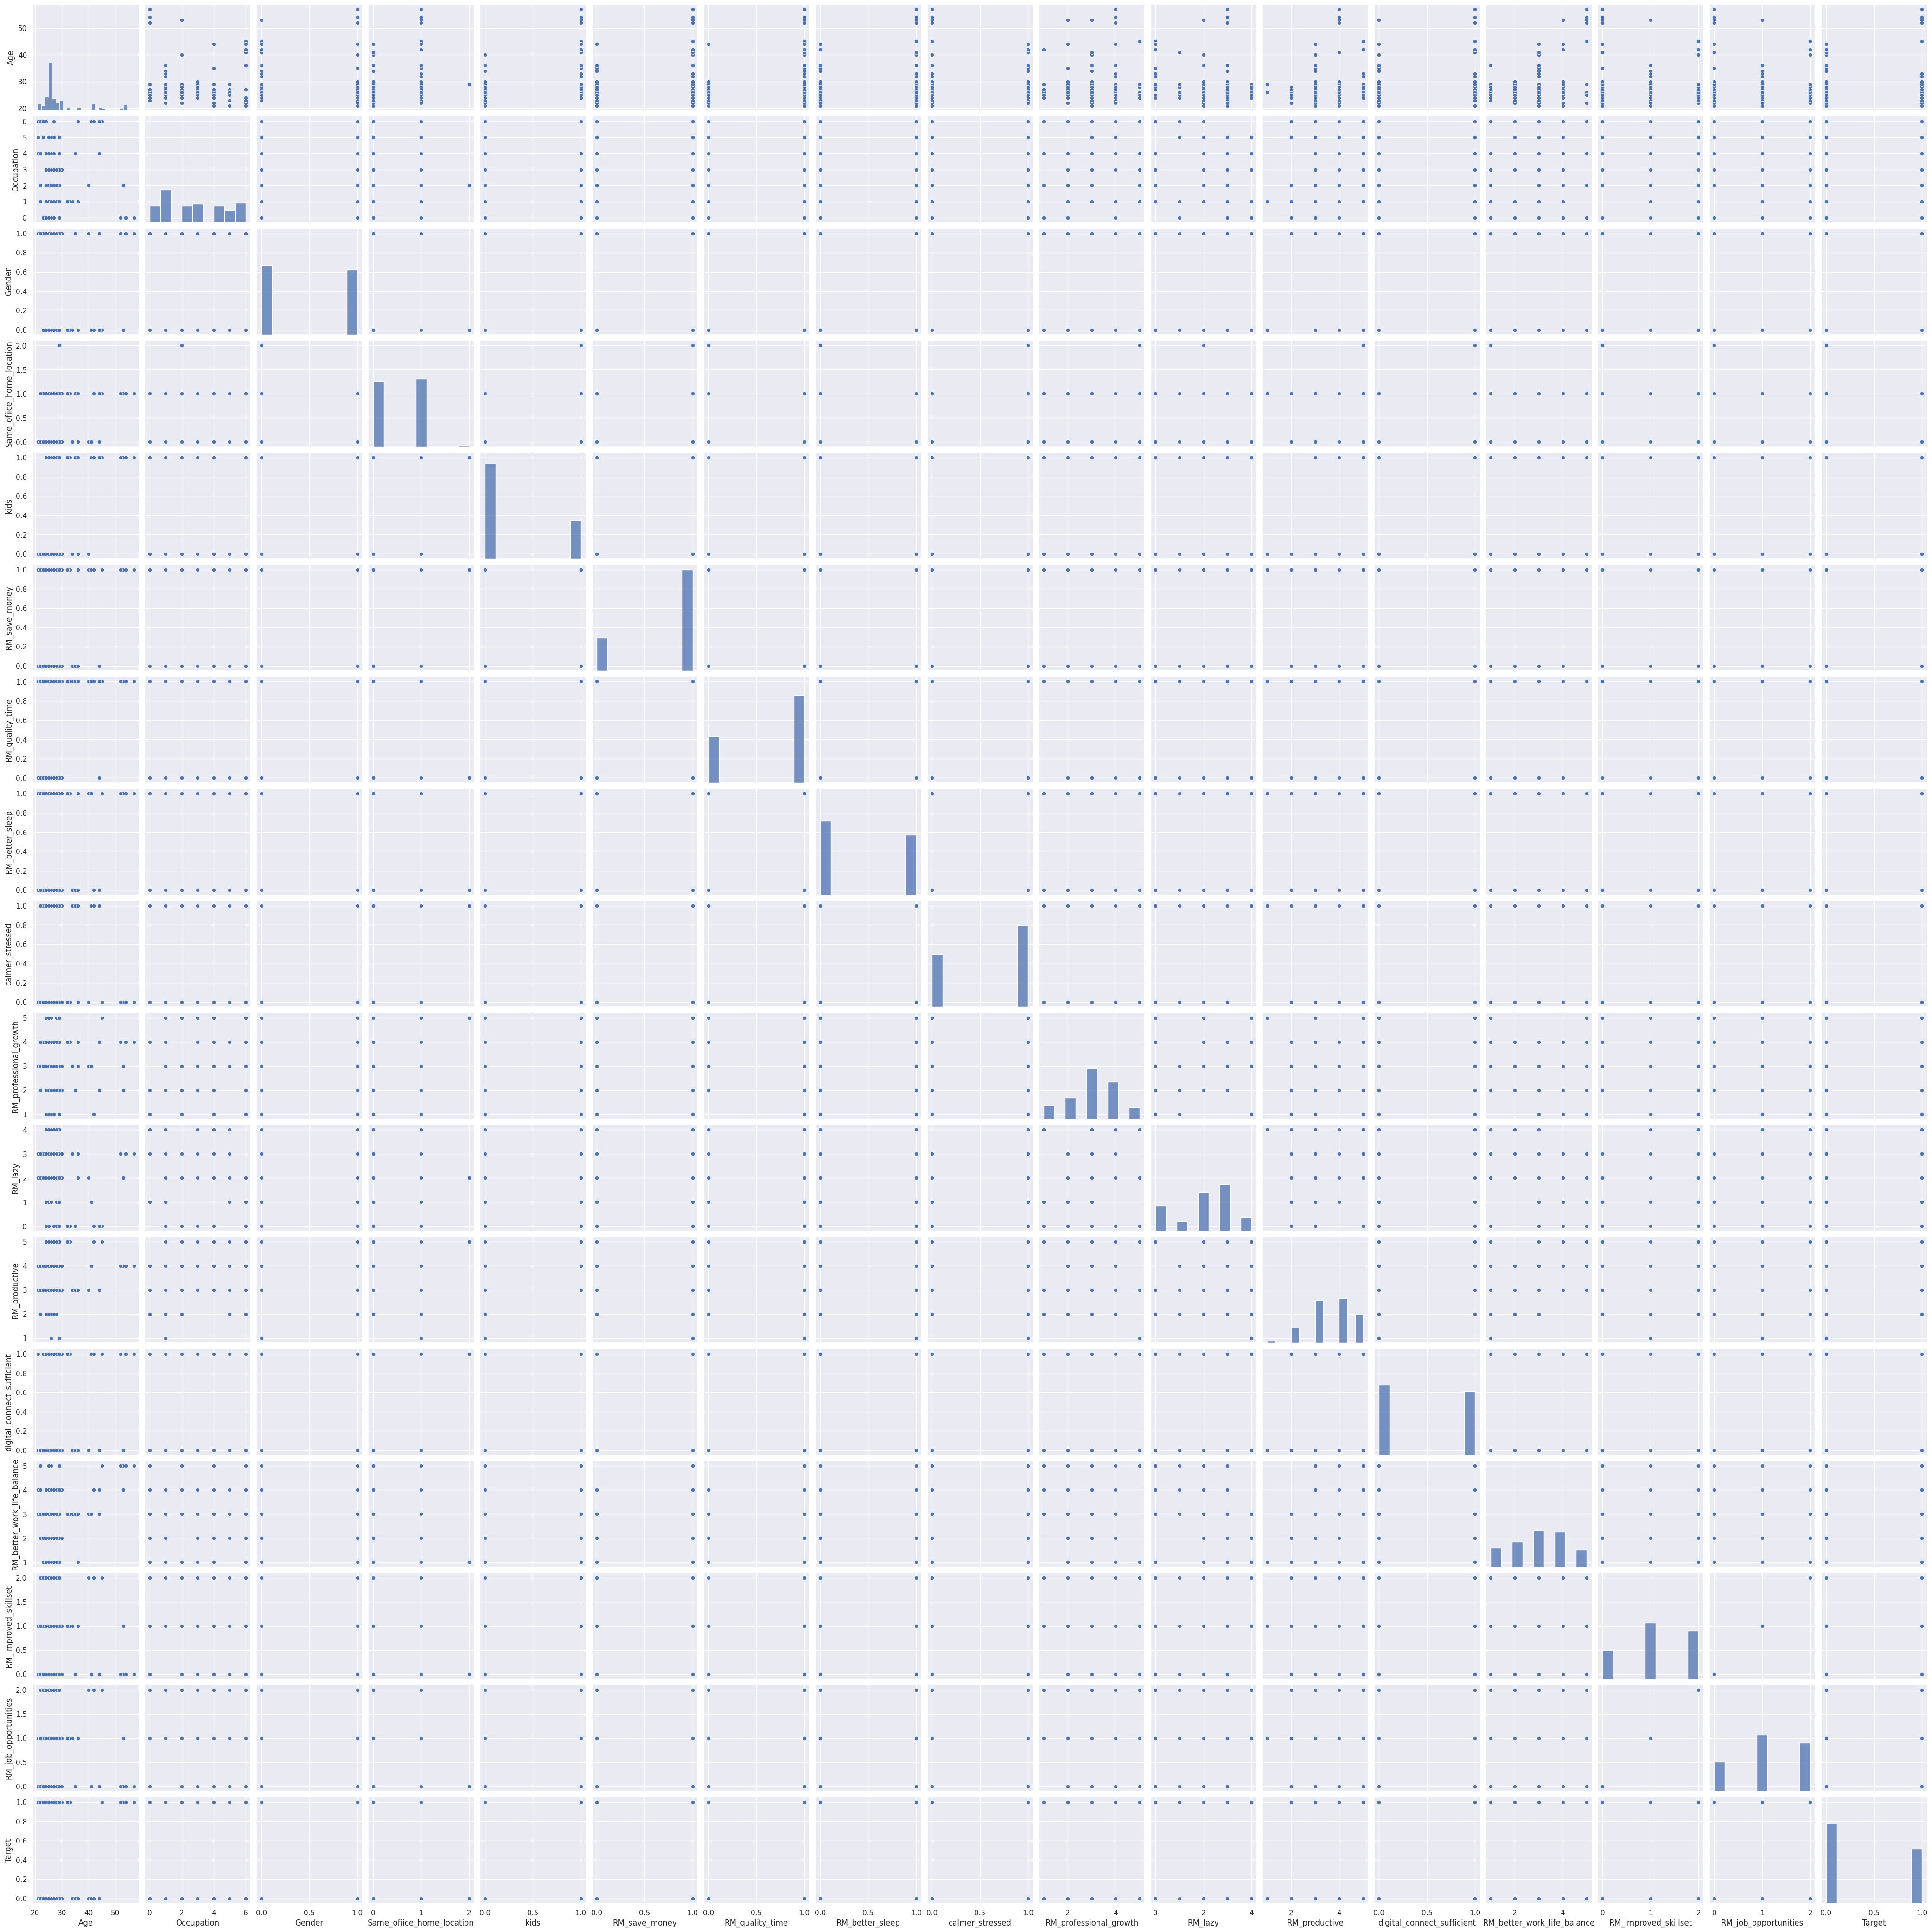

In [193]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(wfh_df_pandas)

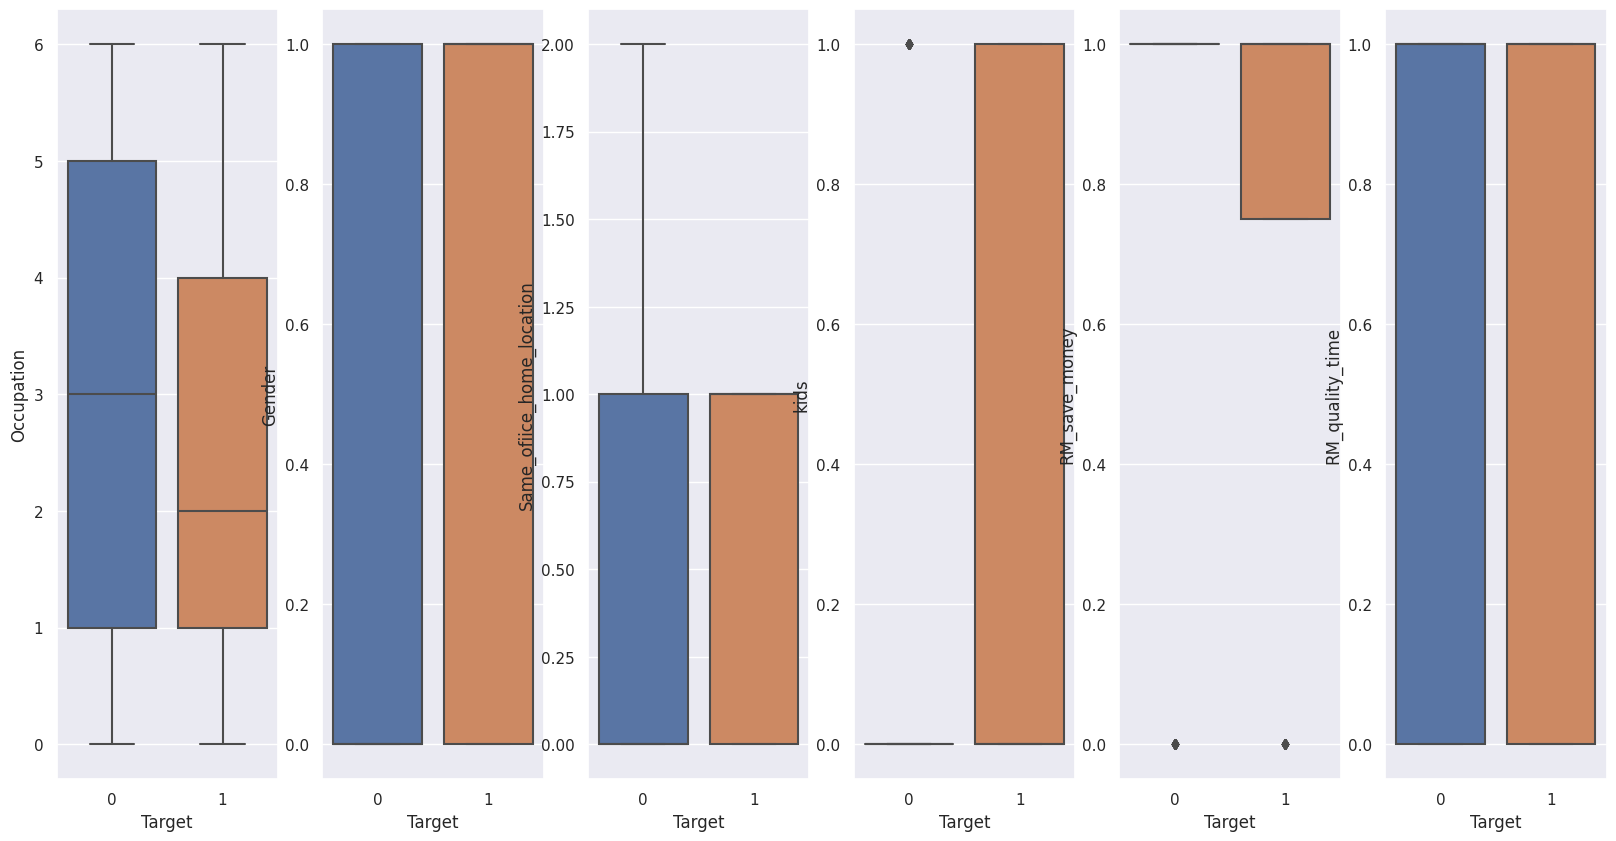

In [194]:
names = wfh_df_pandas[
    [
        "Occupation",
        "Gender",
        "Same_ofiice_home_location",
        "kids",
        "RM_save_money",
        "RM_quality_time",
        "Target",
    ]
].columns.drop("Target")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="Target",
        data=wfh_df_pandas[
            [
                "Occupation",
        "Gender",
        "Same_ofiice_home_location",
        "kids",
        "RM_save_money",
        "RM_quality_time",
        "Target",
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

**What kind of data exploration did you do?** <br>

Preliminary findings from the Exploratory data analysis


**Datatype** - All the features in the dataset are Integers/ Strings <br>
**Missing Data** - Our Dataset Didn't had any missing values in any of the features.<br>
**Distribution of training data** - I checked the probability distribution of each and every feature in the training dataset<br>
**Correlation** - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.<br>
**Barplot** - Performed Barplot analysis to findout how a variable predicts if people  prefer WFH vs WFO post Covid-19


The above graphs are a cohesive representation of how Target variable ( choosing between wfh and wfo ) is changing w.r.t. all the significant variables.

A few findings which we can interpret from the above graph as

Target value increases as the the value of Occupation decreases
Target value remains constant irrespective of Gender
These are the preliminary findings about how few parameters are affecting the target variable 

**Data Cleaning** <br>
The dataset was relatively free of any missing values. However, managing missing values is a crucial task in every Data Science project.<br>

**Handling Missing Data** <br>
Checking for missing values is a crucial step in any machine learning modeling task. Missing values in the dataset can significantly impact the results and make the model less effective.

Fortunately, there are various methods to handle missing values, which we can discuss in greater detail below.<br>

**How to handle missing data - Data Imputation techniques** <br>
To handle missing data, we can use various methods such as:

Deleting rows with missing data: This involves removing any rows that contain missing values. However, this approach can lead to significant data loss.

Filling missing data points with estimates such as mean, mode, or median: This method is straightforward, but it assumes that the missing data is missing completely at random (MCAR) and may introduce bias.

Using MICE Imputation: This approach involves creating a regression model that predicts the missing values based on the other features in the dataset. This process is repeated multiple times to generate multiple imputed datasets, which are then combined to obtain a final estimate.

To compare the effectiveness of these methods, we can intentionally create missing values in our dataset's Occupation column. We will remove 1%, 5%, and 10% of the data and assess how well the Mean Imputation and MICE Imputation methods recover the missing data. <br>

df_imputation = wfh_df_pandas.copy()

In [195]:
df_imputation = wfh_df_pandas.copy()
# Creating three extra coloumns of Alcohol for performing Data Imputation techniques
df_imputation["Occupation_type_1"] = df_imputation[["Occupation"]]
df_imputation["Occupation_type_2"] = df_imputation[["Occupation"]]
df_imputation["Occupation_type_3"] = df_imputation[["Occupation"]]

In [196]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Occupation_type_1"] = mm_impute_train_df[
        "Occupation_type_1"
    ].fillna(mm_impute_train_df["Occupation"].mean())
    mm_impute_train_df["Occupation_type_2"] = mm_impute_train_df[
        "Occupation_type_2"
    ].fillna(mm_impute_train_df["Occupation"].mean())
    mm_impute_train_df["Occupation_type_3"] = mm_impute_train_df[
        "Occupation_type_3"
    ].fillna(mm_impute_train_df["Occupation"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [197]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

                                             column_name  percent_missing
Age                                                  Age              0.0
Occupation                                    Occupation              0.0
Gender                                            Gender              0.0
Same_ofiice_home_location      Same_ofiice_home_location              0.0
kids                                                kids              0.0
RM_save_money                              RM_save_money              0.0
RM_quality_time                          RM_quality_time              0.0
RM_better_sleep                          RM_better_sleep              0.0
calmer_stressed                          calmer_stressed              0.0
RM_professional_growth            RM_professional_growth              0.0
RM_lazy                                          RM_lazy              0.0
RM_productive                              RM_productive              0.0
digital_connect_sufficient    digital_

In [198]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(df_imputation, 0.01, "Occupation_type_1")
create_missing(df_imputation, 0.05, "Occupation_type_2")
create_missing(df_imputation, 0.1, "Occupation_type_3")

In [199]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

For MICE imputation, we have to be carefull and create three different dataframes for all three configuration, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity which will mislead the regression model and result in bad imputation

In [200]:
# Dataframe for 1 type
df_imputation_1_percent = df_imputation.drop(
    ["Occupation", "Occupation_type_2", "Occupation_type_3"], axis=1
)
# Dataframe for 2 type
df_imputation_5_percent = df_imputation.drop(
    ["Occupation", "Occupation_type_1", "Occupation_type_3"], axis=1
)
# Dataframe for 3 type
df_imputation_10_percent = df_imputation.drop(
    ["Occupation", "Occupation_type_1", "Occupation_type_2"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)

Let's examine how well our imputation methods have retrieved the missing data.

In [201]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Occupation"],
        mm_imputed_df_imputation["Occupation_type_1"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Occupation"],
        mice_imputed_df_imputation_1_percent["Occupation_type_1"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Occupation"],
        mm_imputed_df_imputation["Occupation_type_2"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Occupation"],
        mice_imputed_df_imputation_5_percent["Occupation_type_2"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["Occupation"],
        mm_imputed_df_imputation["Occupation_type_3"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["Occupation"],
        mice_imputed_df_imputation_10_percent["Occupation_type_3"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.22131982844128348
Average % error on residuals for 1% missing data imputed using MICE Imputation
0.273767600242341
Average % error on residuals for 5% missing data imputed using Mean Imputation
2.8840424104952995
Average % error on residuals for 5% missing data imputed using MICE Imputation
2.4577392866251198
Average % error on residuals for 10% missing data imputed using Mean Imputation
1327918979.3867614
Average % error on residuals for 10% missing data imputed using MICE Imputation
1227829250.851059


##**Interpreting the Imputation Methods**


Based on the six readings above, we can conclude that MICE imputation is more effective than Mean imputation as the imputed value is dependent on the other features. Additionally, we can observe that the percentage error of residuals increases with the percentage of missing data points. This suggests that datasets with fewer missing data points are more accurately imputed by the imputation method.

##**Why Imputing data is always better than deleting the row ?**


Deleting a row from a dataset causes data loss and can harm the model's training. As a result, it is not an ideal solution.

Choosing an imputation method is subjective, but based on the analysis above, MICE is a more effective method for retrieving missing data. However, after creating a model, it does not necessarily have a significant positive impact on its accuracy. Nevertheless, it is still a better option to use MICE since it can provide the most accurate approximation of the missing values.

##**Feature Importance and Selection**

Lets fit a very simple linear model to understand how the certain features collected from a survey conducted from working people are affecting their preference over wfh & wfo

In [202]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = wfh_df_pandas.drop(["Target"], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, wfh_df_pandas.Target), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [203]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "Target ~ Age + Occupation + Gender + Same_ofiice_home_location + kids + RM_save_money + RM_quality_time +RM_better_sleep + calmer_stressed + RM_professional_growth + RM_lazy + RM_productive + digital_connect_sufficient + RM_better_work_life_balance + RM_improved_skillset + RM_job_opportunities",
    data=df_norm,
).fit()
print(results.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     25.34
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.39e-37
Time:                        01:16:23   Log-Likelihood:                -33.128
No. Observations:                 207   AIC:                             98.26
Df Residuals:                     191   BIC:                             151.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**Feature Selection** <br> 

Feature selection is the process of identifying and selecting the most relevant features from a dataset for use in a machine learning model. The goal is to choose the features that are most predictive of the outcome variable while minimizing the number of irrelevant or redundant features.

A basic example of feature selection would be in predicting house prices based on various factors such as the number of bedrooms, square footage, location, age of the house, and amenities such as a pool or fireplace. By using feature selection techniques, we can identify which of these factors have the most significant impact on the house price and select only those features for use in the model. For example, we might find that the number of bedrooms and square footage have the most significant impact on house price, while the age of the house and amenities have a less significant impact, and we would then select only the most relevant features to use in our model.



##**Null-Hypothesis**
let's take an example to explain the null hypothesis in the case of predicting work from home vs work from office.

Suppose we want to determine whether employees' productivity is significantly affected by working from home compared to working from the office. Our null hypothesis would be that there is no significant difference in productivity between employees who work from home and employees who work from the office.

To test this hypothesis, we would take two groups of employees - one group would work from home, while the other group would work from the office. We would then measure their productivity, say the number of tasks completed in a day, after a certain period of time.

If the difference in productivity between the two groups is not statistically significant, we would fail to reject the null hypothesis and conclude that working from home does not significantly affect productivity. However, if the difference in productivity between the two groups is statistically significant, we would reject the null hypothesis and conclude that working from home does indeed have a significant impact on productivity.

In summary, the null hypothesis in this example assumes that there is no significant difference in productivity between employees who work from home and employees who work from the office. The aim of the study is to either reject or fail to reject this null hypothesis based on the data collected.

To test the null hypothesis, we collect data and analyze it using statistical tests.
After running the statistical test, we obtain a **p-value**, which is the probability of observing the test statistic or a more extreme value if the null hypothesis is true. **If the p-value is smaller than a predetermined level of significance (usually 0.05), we reject the null hypothesis and conclude that there is enough evidence to support the alternative hypothesis (i.e., there is a significant difference or relationship). If the p-value is larger than the level of significance, we fail to reject the null hypothesis and conclude that there is not enough evidence to support the alternative hypothesis.**


**Features in our dataset with P value < 0.05** <br>


Age<br>
kids<br>
RM_save_money<br>
RM_quality_time<br>
RM_better_sleep<br>
calmer_stressed<br>
RM_professional_growth<br>
RM_productive<br>
digital_connect_sufficient<br>
RM_better_work_life_balance<br>
RM_job_opportunities

In [204]:
df_norm_feature_selected = df_norm[
    [
        "Age",
        "kids",
        "RM_save_money",
        "RM_quality_time",
        "RM_better_sleep",
        "calmer_stressed",
        "RM_professional_growth",
        "RM_productive",
        "digital_connect_sufficient",
        "RM_better_work_life_balance",
        "RM_job_opportunities",
        "Target",
    ]
]

In [205]:
results2 = smf.ols(
    "Target ~ Age + kids + RM_save_money + RM_quality_time + RM_better_sleep+ calmer_stressed+ RM_professional_growth+ RM_productive+ digital_connect_sufficient+ RM_better_work_life_balance+RM_job_opportunities",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     32.96
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           9.43e-39
Time:                        01:16:24   Log-Likelihood:                -37.774
No. Observations:                 207   AIC:                             99.55
Df Residuals:                     195   BIC:                             139.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [206]:
predicted_quality_1 = results.predict(
    df_norm[
        [
            "Age",
            "Occupation",
            "Gender",
            "Same_ofiice_home_location",
            "kids",
            "RM_save_money",
            "RM_quality_time",
            "RM_better_sleep",
            "calmer_stressed",
            "RM_professional_growth",
            "RM_lazy","RM_productive","digital_connect_sufficient", "RM_better_work_life_balance", "RM_improved_skillset","RM_job_opportunities"
        ]
    ]
)
df_norm["predicted_quality_1"] = predicted_quality_1.round()

In [207]:
predicted_quality_2 = results2.predict(
    df_norm_feature_selected[
        [
            "Age",
        "kids",
        "RM_save_money",
        "RM_quality_time",
        "RM_better_sleep",
        "calmer_stressed",
        "RM_professional_growth",
        "RM_productive",
        "digital_connect_sufficient",
        "RM_better_work_life_balance",
        "RM_job_opportunities",
        ]
    ]
)
df_norm_feature_selected["predicted_quality_2"] = predicted_quality_2.round()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [208]:
# Calculate the number of correct predictions

correct_predictions = (df_norm['Target'] == df_norm['predicted_quality_1']).sum()

# Calculate the total number of predictions

total_predictions = df.shape[0]

# Calculate the accuracy as a percentage

accuracy = 100 * correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 90.34%


In [209]:
# Calculate the number of correct predictions

correct_predictions_two = (df_norm_feature_selected['Target'] == df_norm_feature_selected['predicted_quality_2']).sum()

# Calculate the total number of predictions

total_predictions_two = df.shape[0]

# Calculate the accuracy as a percentage

accuracy = 100 * correct_predictions_two / total_predictions_two




print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 89.86%


From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

From the above two interpretations, our observation is that in both the cases our model predicts the target of predictions, pretty good and they are pretty close to each other. Model who uses all features slighly overcomes the model who is using only the statistically important features with and accuracy of 90.34% compared to the 89.86% of the later

From the above studies let's stick to the data with all featues and try using different models

In [210]:
df_norm = df_norm.drop(["predicted_quality_1"], axis=1)

In [211]:
X = df_norm.drop(["Target"], axis=1)  # Training Feature
Y = df_norm["Target"]  # Target

##How did you split the data into train, and test?
The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [212]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

##Fitting a Linear Model


In [213]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [214]:
y_linear_predictions = linear_model.predict(x_test).round()


##Fitting a Tree Based Model


In [215]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=10, random_state=0)

In [216]:
y_tree_based_predictions = tree_model.predict(x_test).round()


##Fitting a Support Vector Machine (SVM)


In [217]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [218]:
svm_predictions = svm_model.predict(x_test).round()

##Fitting a MLP Regressor


In [219]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [220]:
mlp_predictions = regr.predict(x_test).round()

##Using AutoML to find out the best Model


In [221]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [222]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [223]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53462..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqp57grvg
  JVM stdout: /tmp/tmpqp57grvg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqp57grvg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:53462
Connecting to H2O server at http://127.0.0.1:53462 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_x45j88
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:53462
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [224]:
wfh_hf = h2o.H2OFrame(wfh_df_pandas)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [225]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = wfh_hf.split_frame([pct_rows])

In [226]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "Target"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [227]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
01:16:35.377: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
01:16:38.871: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


01:16:39.536: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
01:16:39.536: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 175.0.
01:16:39.549: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train 

In [228]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
------------------------------------------------------  ---------  ----------  ---------  ---------  ------------------------
GBM_grid_1_AutoML_1_20230410_11635_model_76             0.0798445  0.00637514  0.0223338  0.0561544                0.00637514
XGBoost_grid_1_AutoML_1_20230410_11635_model_67         0.079956   0.00639296  0.0228185  0.0571497                0.00639296
StackedEnsemble_BestOfFamily_4_AutoML_1_20230410_11635  0.080696   0.00651184  0.0300965  0.0568184                0.00651184
GBM_grid_1_AutoML_1_20230410_11635_model_17             0.0853326  0.00728165  0.0355114  0.0618318                0.00728165
GBM_grid_1_AutoML_1_20230410_11635_model_93             0.0961168  0.00923844  0.0306714  0.0712534                0.00923844
GBM_grid_1_AutoML_1_20230410_11635_model_13             0.0962502  0.00926411  0.0338671  0.0712614                0.00926411
GBM_grid_1_AutoML_1_20230410_11635_model_47             0.096748   0.00936017  0.0254196  0.0705478                0.00936017
GBM_grid_1_AutoML_1_20230410_11635_model_102            0.0971462  0.00943738  0.0353378  0.0684022                0.00943738
GBM_5_AutoML_1_20230410_11635                           0.0974393  0.00949441  0.0308274  0.0718633                0.00949441
StackedEnsemble_BestOfFamily_3_AutoML_1_20230410_11635  0.0978585  0.00957629  0.0396941  0.0718766                0.00957629
[184 rows x 6 columns]

In [229]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

1


In [230]:
autoML_best_predictions = autoML_model.predict(df_test).round()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [231]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Target"], use_pandas=False)

In [232]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [233]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

##**Hyperparameter Tuning of AutoML's Best Model**


In [234]:
train, validate, test = np.split(
    wfh_df_pandas.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="Target",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_11
Best R2: 0.8422033763519454


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


##**What evaluation metric are you using? ** <br>
The evaluation metrics which I am using are

Mean Squared Error <br>
Root Mean Squared Error <br>
Mean Absolute Error <br>
Mean Residual Deviance <br>
Accuracy  <br>

To evaluate the best model in a regression problem, various evaluation metrics are employed, among which Mean Residual Deviance and Accuracy are the most crucial. Mean Residual Deviance provides an estimate of the model's ability to predict the response variable with p predictor variables. A lower value is indicative of a better prediction capability. Accuracy, on the other hand, measures the precision and correctness of the model.

**How do training, validation, and test metrics compare?**

The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~0.3929 and ~0.3534 respectively. Also, the other metrics on both of the dataset validates that the model is not overfitting the Training Data. Please refer below to see the Evaluation Metrics on both training and validation dataset.

In [235]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_11


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         27267                  5            10           6.93          10            23            17.13

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.03820739007815473
RMSE: 0.19546710740724313
MAE: 0.10543576531048998
RMSLE: 0.14061498715618
Mean Residual Deviance: 0.03820739007815473

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.016510861565054453
RMSE: 0.12849459741582311
MAE: 0.07422336330501046
RMSLE: 0.101631414890533
Mean Residual Deviance: 0.016510861565054453

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance     validation_rmse      validation_mae        validation_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  --------------------  -------------------  --------------------  ---------------------
     2023-04-10 01:20:28  2.431 sec   0.0                nan                  nan                  nan                   nan                  nan                   nan
     2023-04-10 01:20:28  2.433 sec   1.0                0.0                  0.0                  0.0                   0.2208630521496931   0.04878048780487805   0.04878048780487805
     2023-04-10 01:20:28  2.434 sec   2.0                0.28054180384339106  0.08333333333333333  0.0787037037037037    0.17460757394239454  0.06097560975609756   0.03048780487804878
     2023-04-10 01:20:28  2.436 sec   3.0                0.3787471710373855   0.15422885572139303  0.14344941956882254   0.14724203476646208  0.06504065040650406   0.021680216802168025
     2023-04-10 01:20:28  2.437 sec   4.0                0.361467061035984    0.15432098765432098  0.13065843621399179   0.16098022905419615  0.06707317073170732   0.025914634146341462
     2023-04-10 01:20:28  2.438 sec   5.0                0.3195756924241983   0.1331521739130435   0.1021286231884058    0.13251783128981587  0.058536585365853655  0.0175609756097561
     2023-04-10 01:20:28  2.439 sec   6.0                0.3347264701978142   0.1486254295532646   0.1120418098510882    0.11345760761750295  0.05284552845528455   0.012872628726287264
     2023-04-10 01:20:28  2.440 sec   7.0                0.3105046871361994   0.13268608414239483  0.09641316073354908   0.12014592090290362  0.05226480836236934   0.014435042309606773
     2023-04-10 01:20:28  2.441 sec   8.0                0.28993248621161194  0.12301587301587301  0.08406084656084654   0.12949244257070305  0.054878048780487805  0.01676829268292683
     2023-04-10 01:20:29  2.443 sec   9.0                0.2700887779008005   0.11261261261261261  0.07294794794794794   0.12022261795565765  0.05420054200542006   0.014453477868112019
---  ---                  ---         ---                ---                  ---                  ---                   ---                  ---                   ---
     2023-04-10 01:20:29  2.637 sec   91.0               0.19176004522356793  0.10197004445761373  0.036771914944144814  0.13102405637388972  0.07569016349663908   0.017167303348668235
     2023-04-10 01:20:29  2.641 sec   92.0               0.19213712225298882  0.10233145469027456  0.03691667374765997   0.13188986019157753  0.0756627783684943    0.017394935221353866
     2023-04-10 01:20:29  2.644 sec   93.0               0.19227799685997837  0.10270011675297566  0.03697082807648586   0.13141454123663338  0.07553107789924005   0.017269781648434814
     2023-04-10 01:20:29  2.647 sec   94.0               

In [236]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Target"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


**Which models did you explore and did you try to tune the hyperparameters of the best model you got? <br>**

I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were

Linear Regressor <br>
Random Forest Regressor <br>
MLP Regressor <br>
Support Vector Machine(SVM) Regressor <br>
AutoML <br>
The models which gave me the best performance in predicting the target of predictions were the SVM and the model from AutoML where the model from AutoML slightly outpaced the SVM. The model from AutoML to give the best result was a RandomForestRegressor.

As the AutoML's model was promising, I tuned its hyperparameters to oprimize the model. Tunining the hyperparameters helped the model to incease its accuracy from 90.25 % to 96.08 % which is a great increase in the performance.


In [237]:
mlp_accuracy = 100 * (mlp_predictions == y_test).sum() / len(y_test)
linear_accuracy = 100 * (y_linear_predictions == y_test).sum() / len(y_test)
tree_accuracy = 100 * (y_tree_based_predictions == y_test).sum() / len(y_test)
svm_accuracy = 100 * (svm_predictions == y_test).sum() / len(y_test)
automl_accuracy = 100 * (autoMLpredictions == y_test_h2O).sum() / len(y_test_h2O)
tuned_automl_accuracy = 100 * (autoMLpredictions_2 == y_test_h2O_2).sum() / len(y_test_h2O_2)

print(f"Accuracy of predicting the choice of wfh vs who using MLP Regressor = {mlp_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using Linear Model = {linear_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using Tree Based Model = {tree_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using SVM = {svm_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using best AutoML model = {automl_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using best AutoML model with Tuned Hyper-Parameters = {tuned_automl_accuracy:.2f}")

Accuracy of predicting the choice of wfh vs who using MLP Regressor = 100.00
Accuracy of predicting the choice of wfh vs who using Linear Model = 95.24
Accuracy of predicting the choice of wfh vs who using Tree Based Model = 100.00
Accuracy of predicting the choice of wfh vs who using SVM = 100.00
Accuracy of predicting the choice of wfh vs who using best AutoML model = 96.88
Accuracy of predicting the choice of wfh vs who using best AutoML model with Tuned Hyper-Parameters = 100.00


##**Model Selection <br>**
From the above summary of the models trained on the dataset, the two best models are SVM and AutoML's best model with tuned hyperparameters.<br>

SVM Regressor with an Accuracy of ~ 90.48% <br>
AutoML's Hyperparameter Tuned Version ~ 100% <br>
Let's try to understand how both the models have been trained.<br>

Interpreting SVM Regressor using SHAP values

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of RM_better_work_life_balance

The cross is made at approx E[f(x)] 0.57
So as the RM_better_work_life_balance increases the expected value also increases

Talking about the red line on the plot -  By plotting this we can see the difference between the model output from the expected value.

In [238]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [00:18,  2.77it/s]


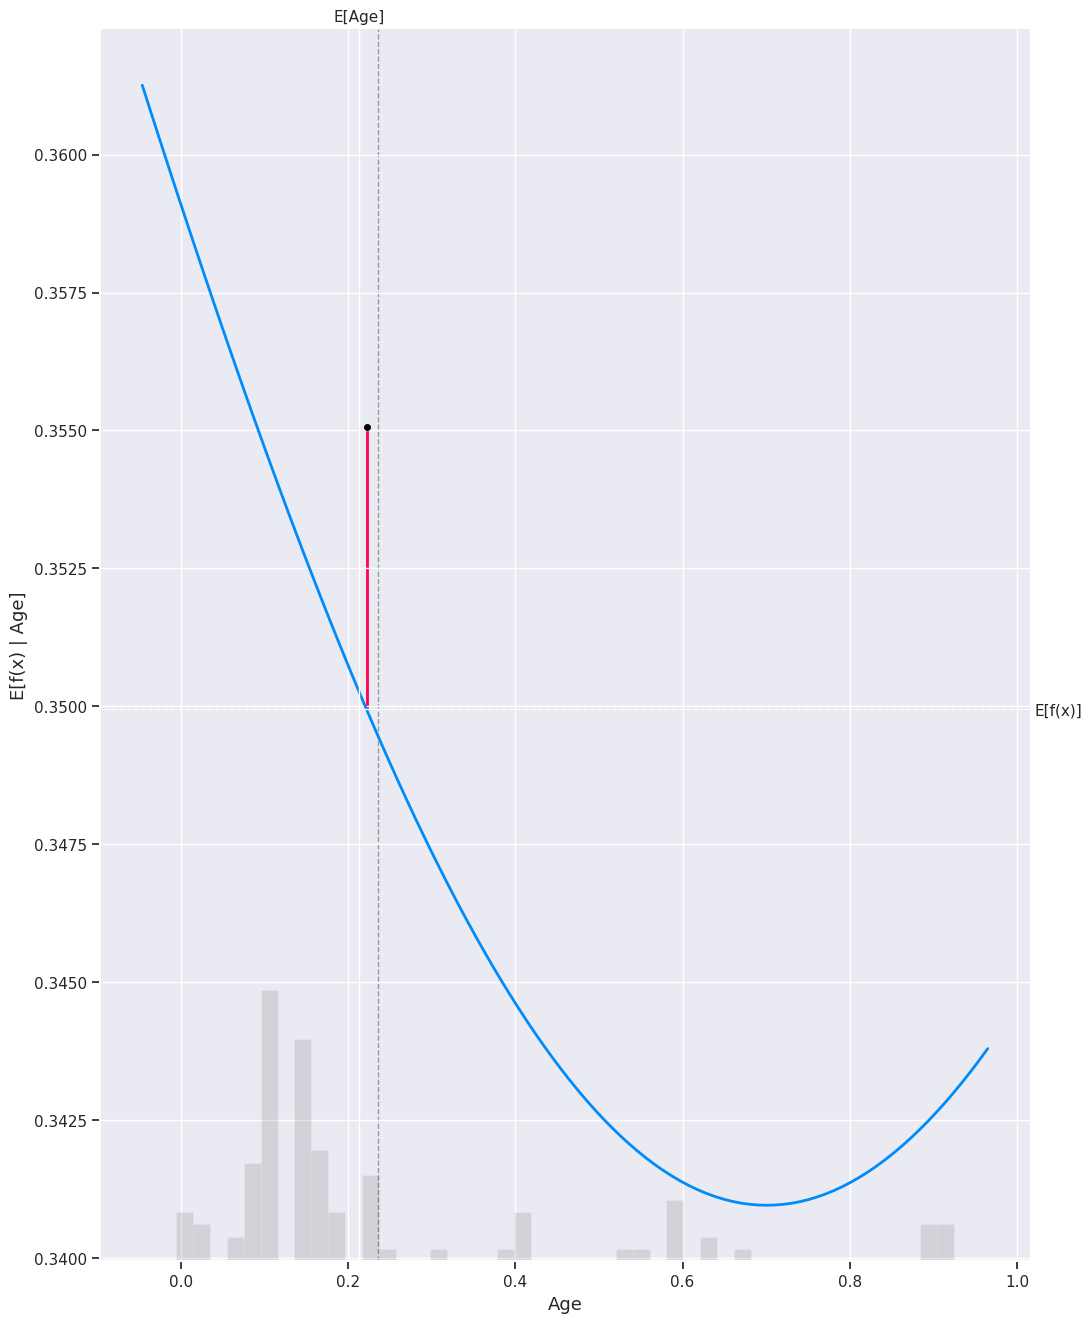

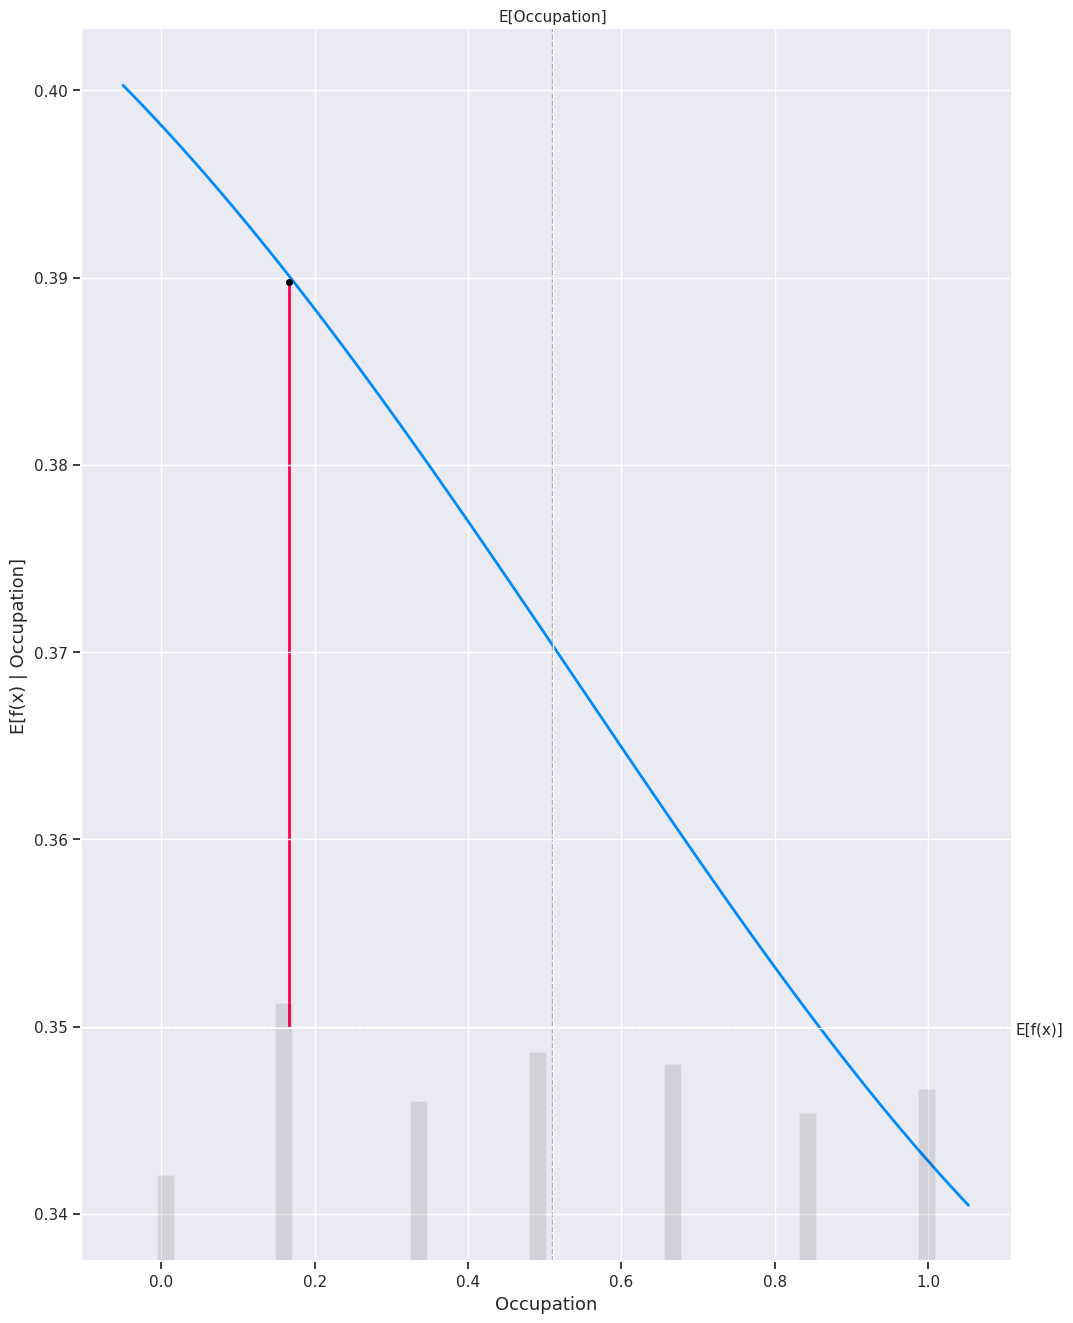

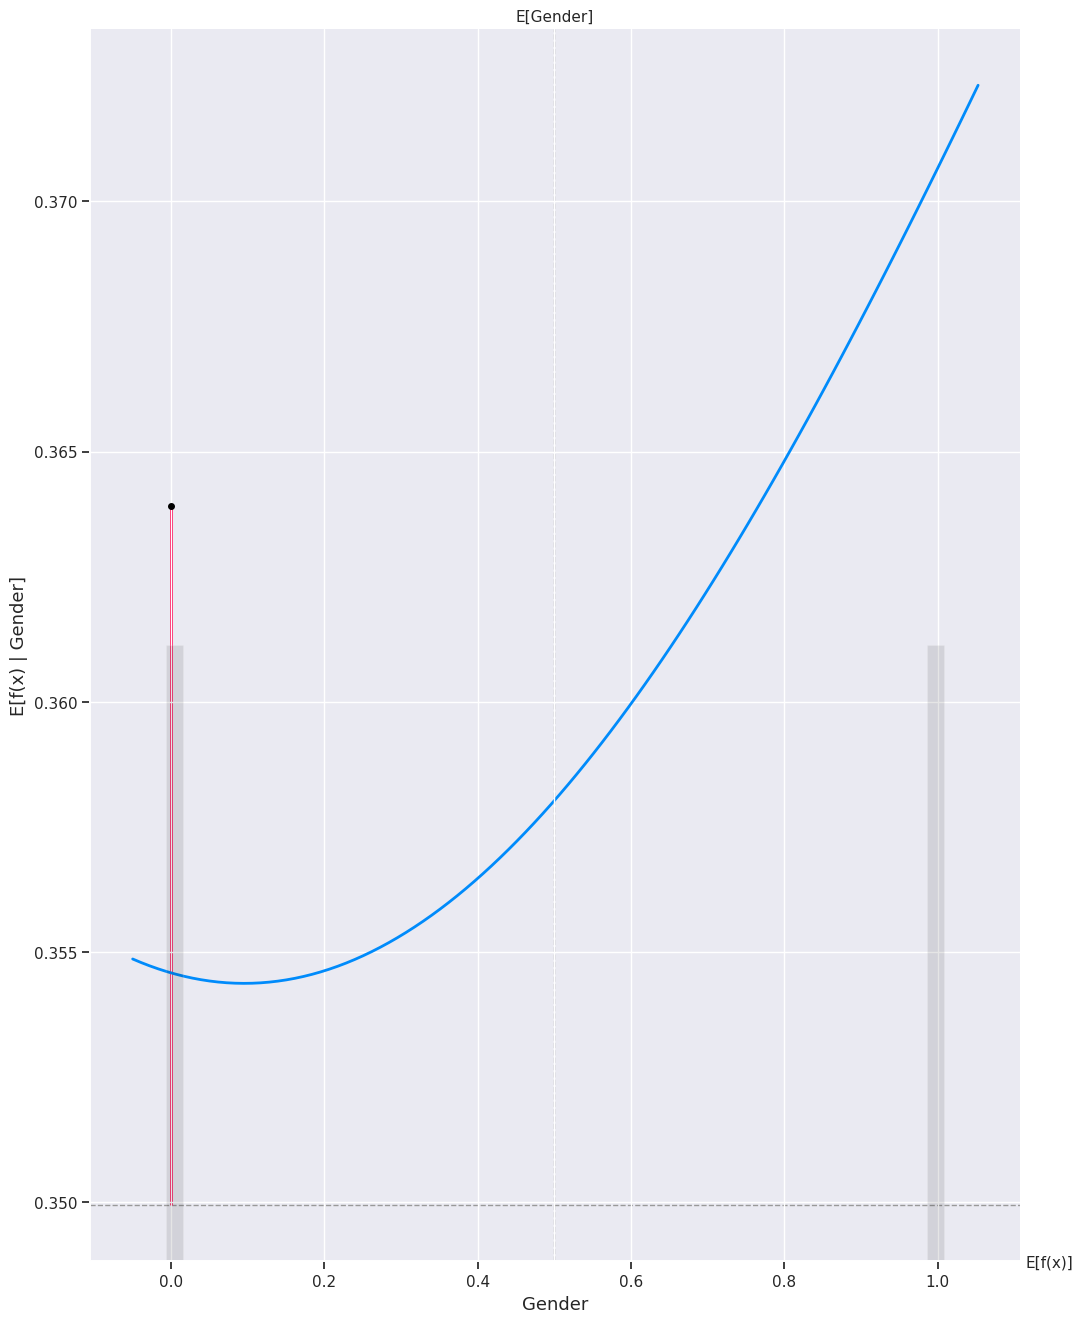

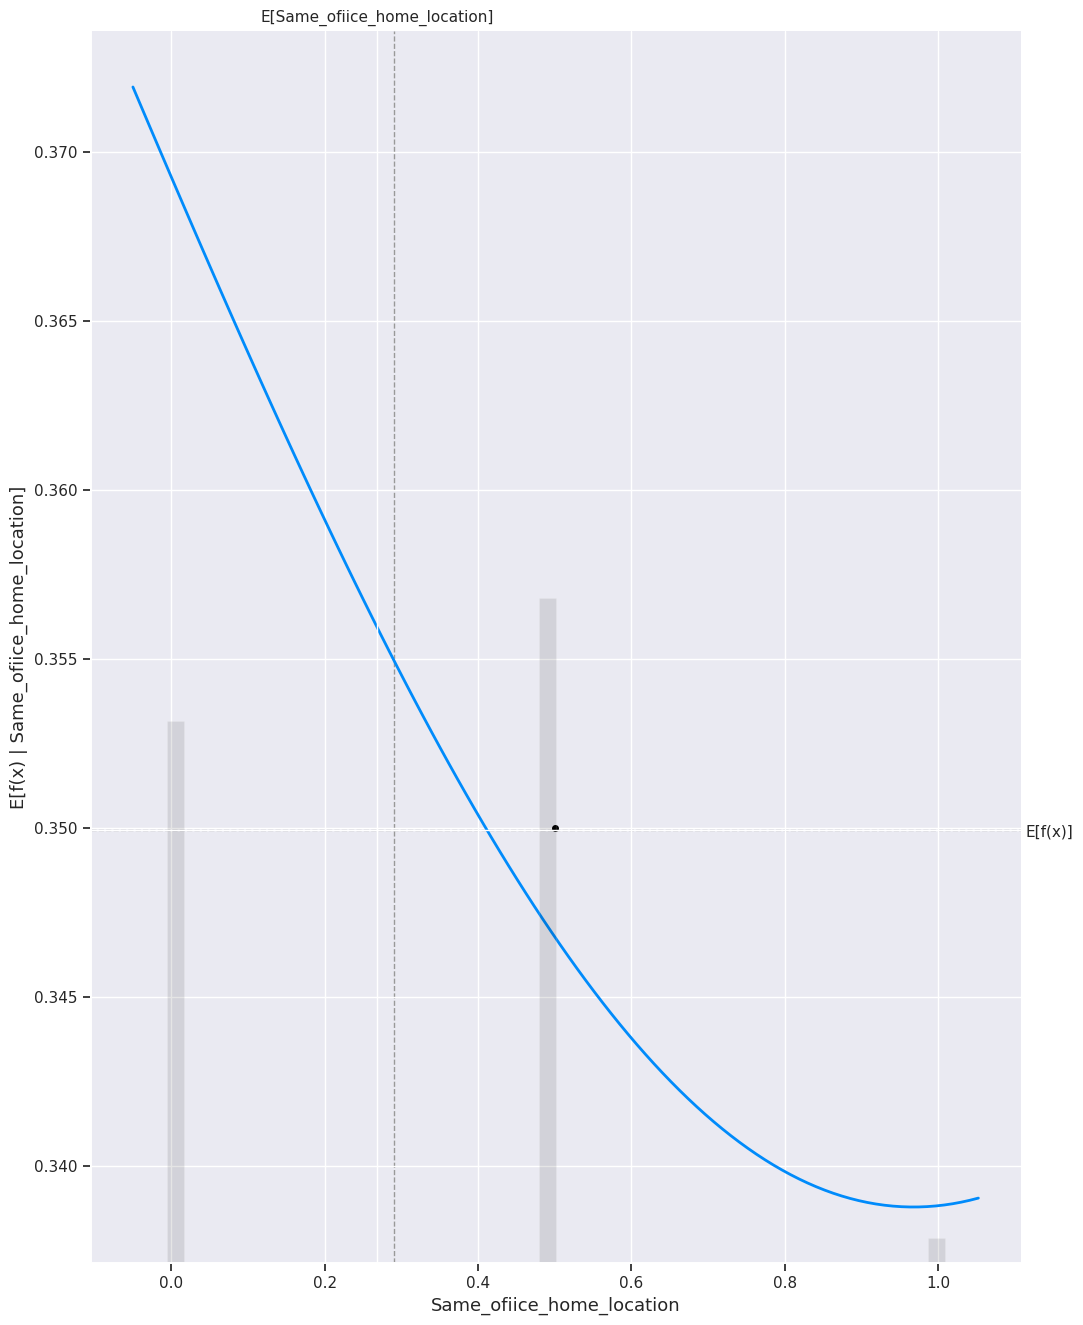

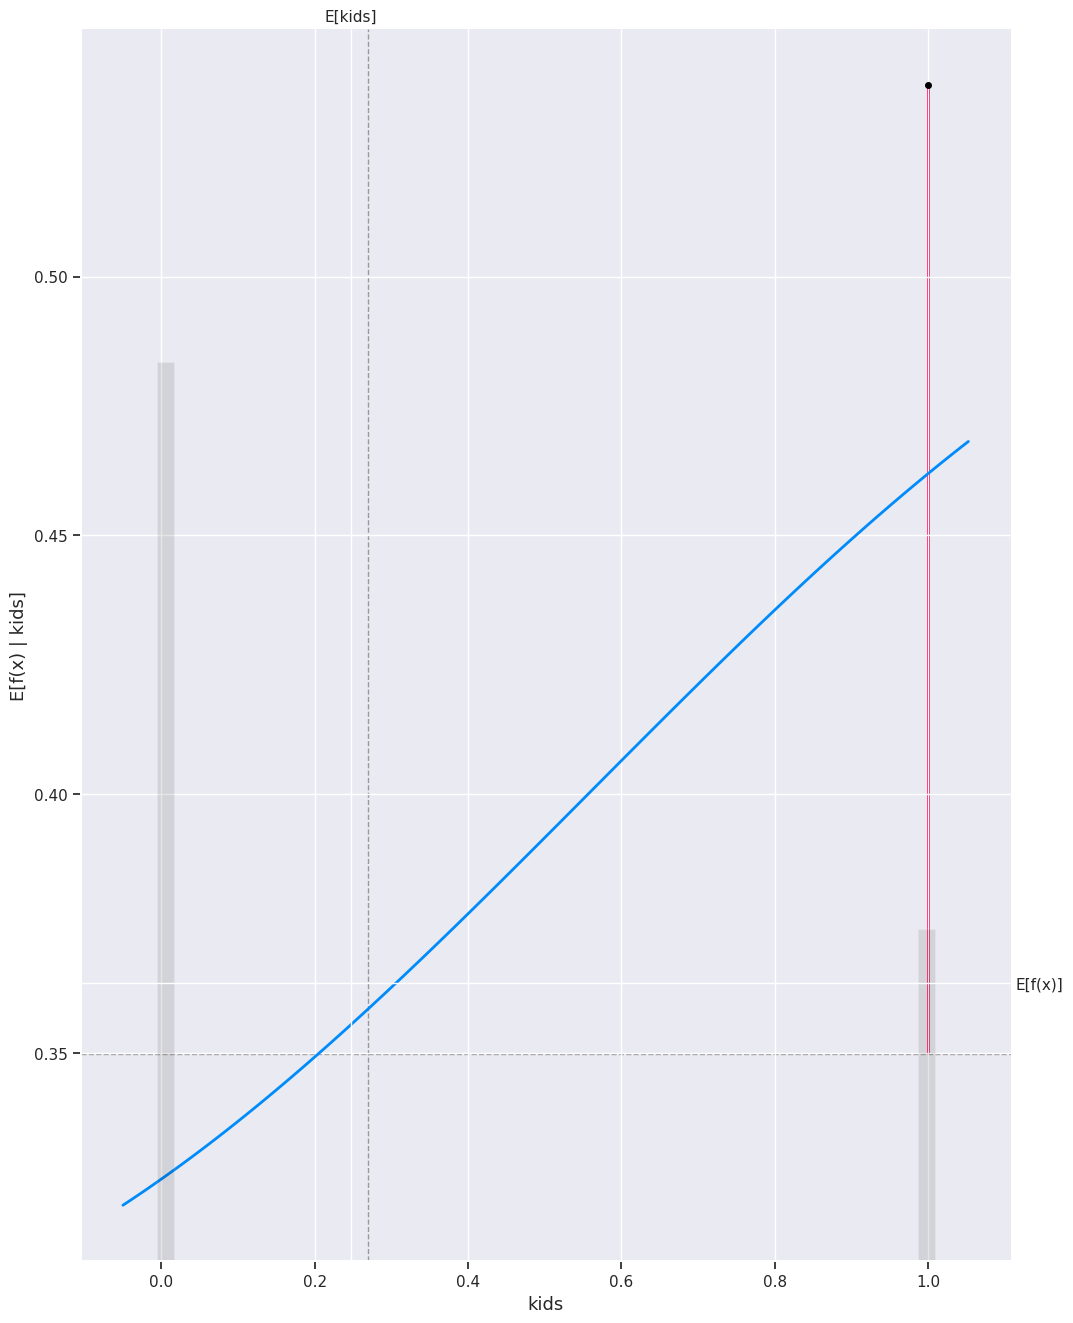

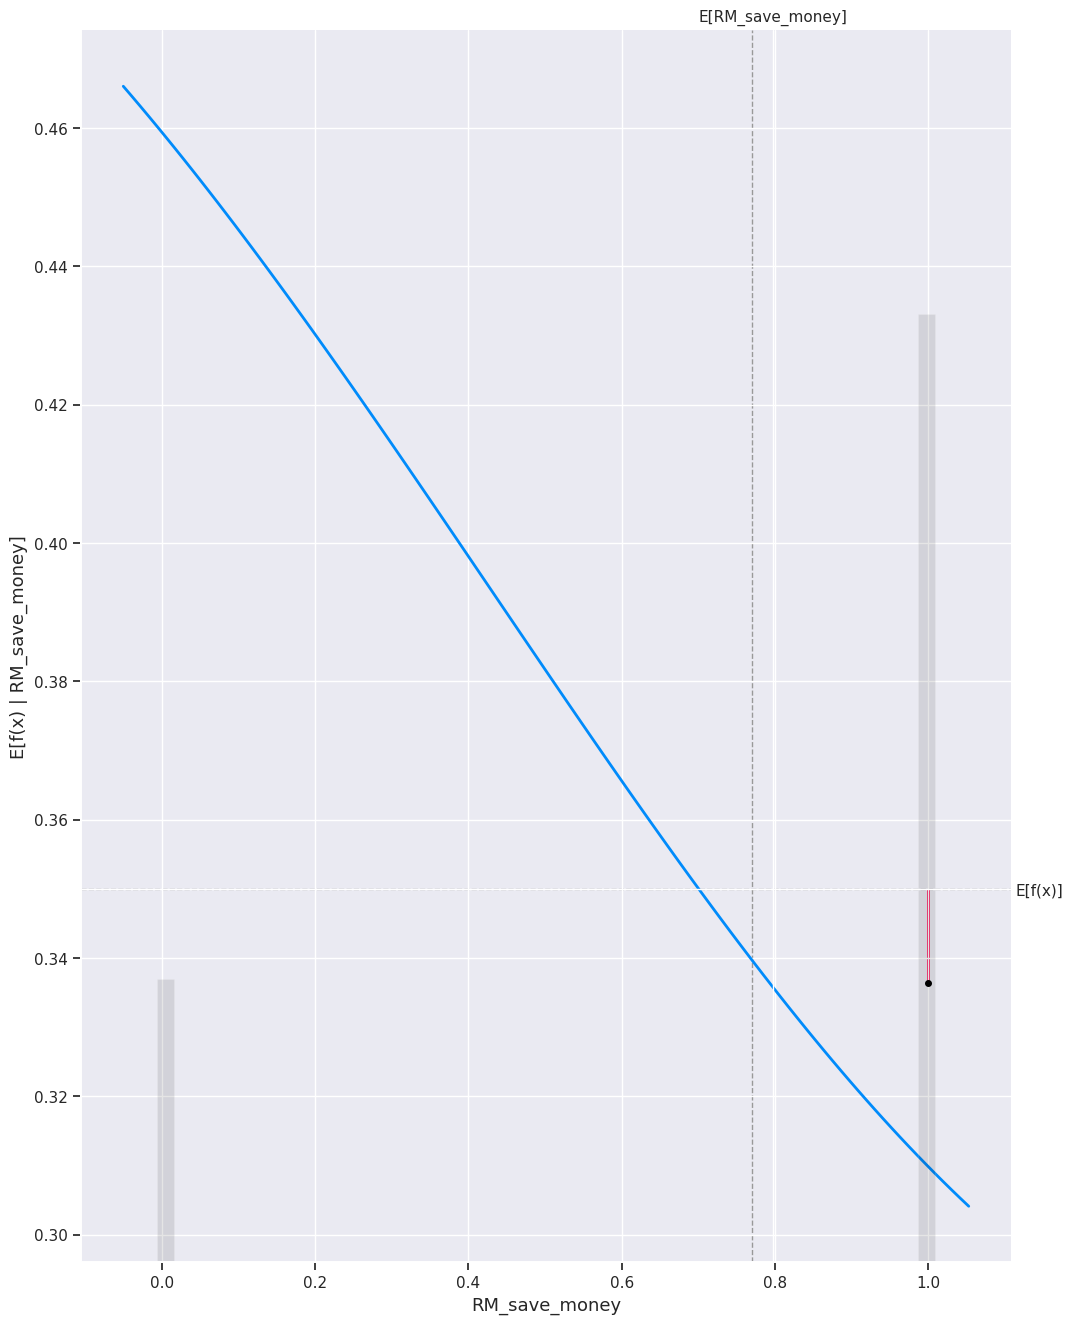

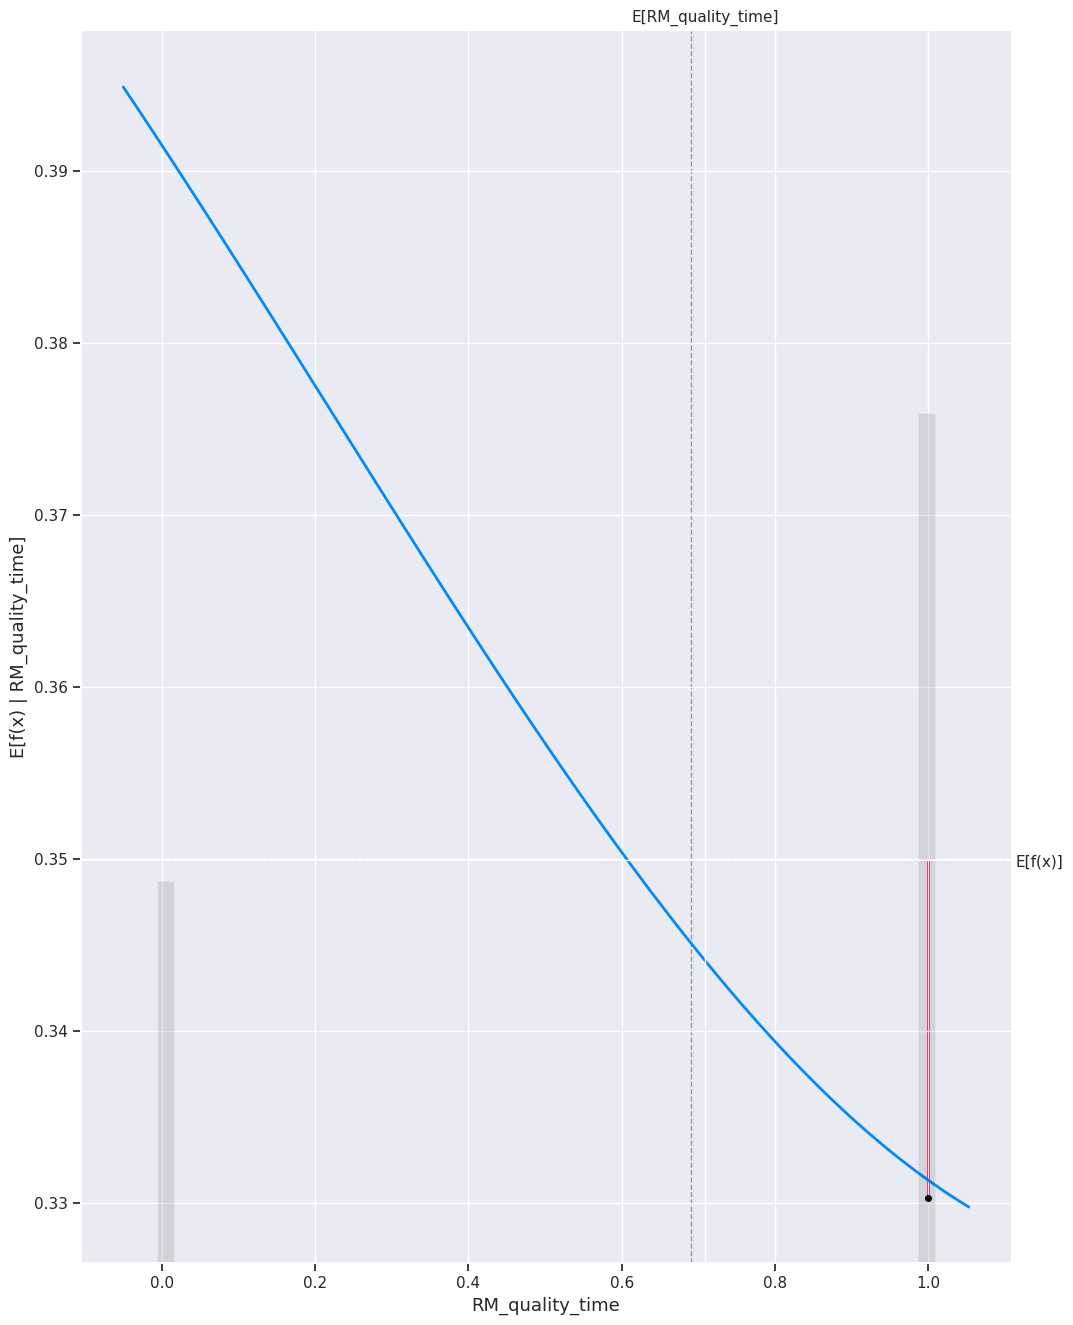

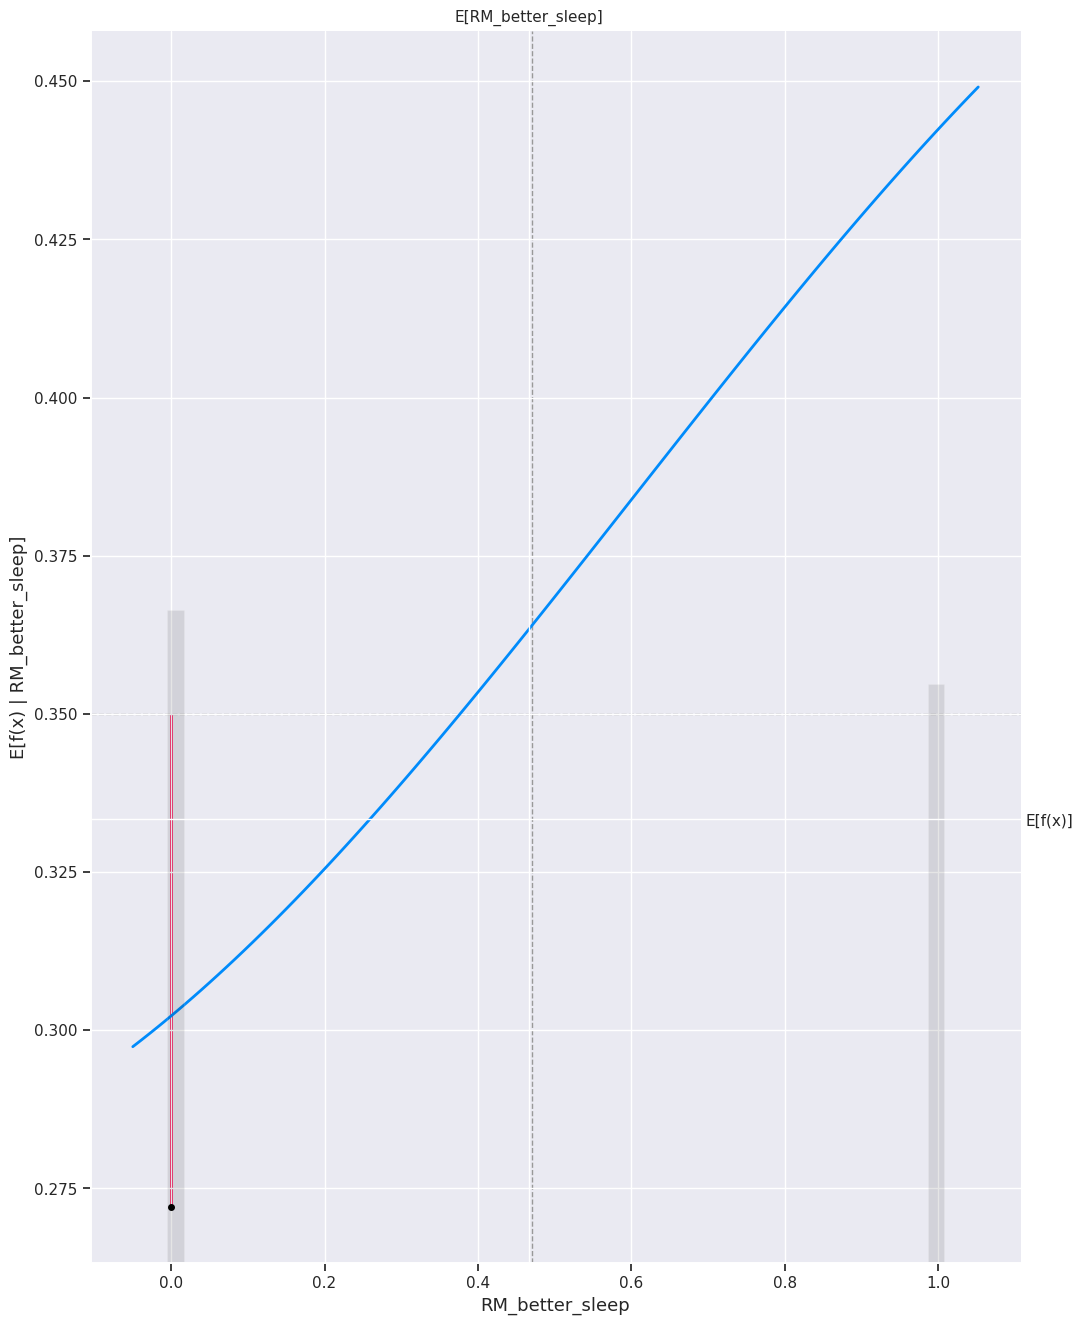

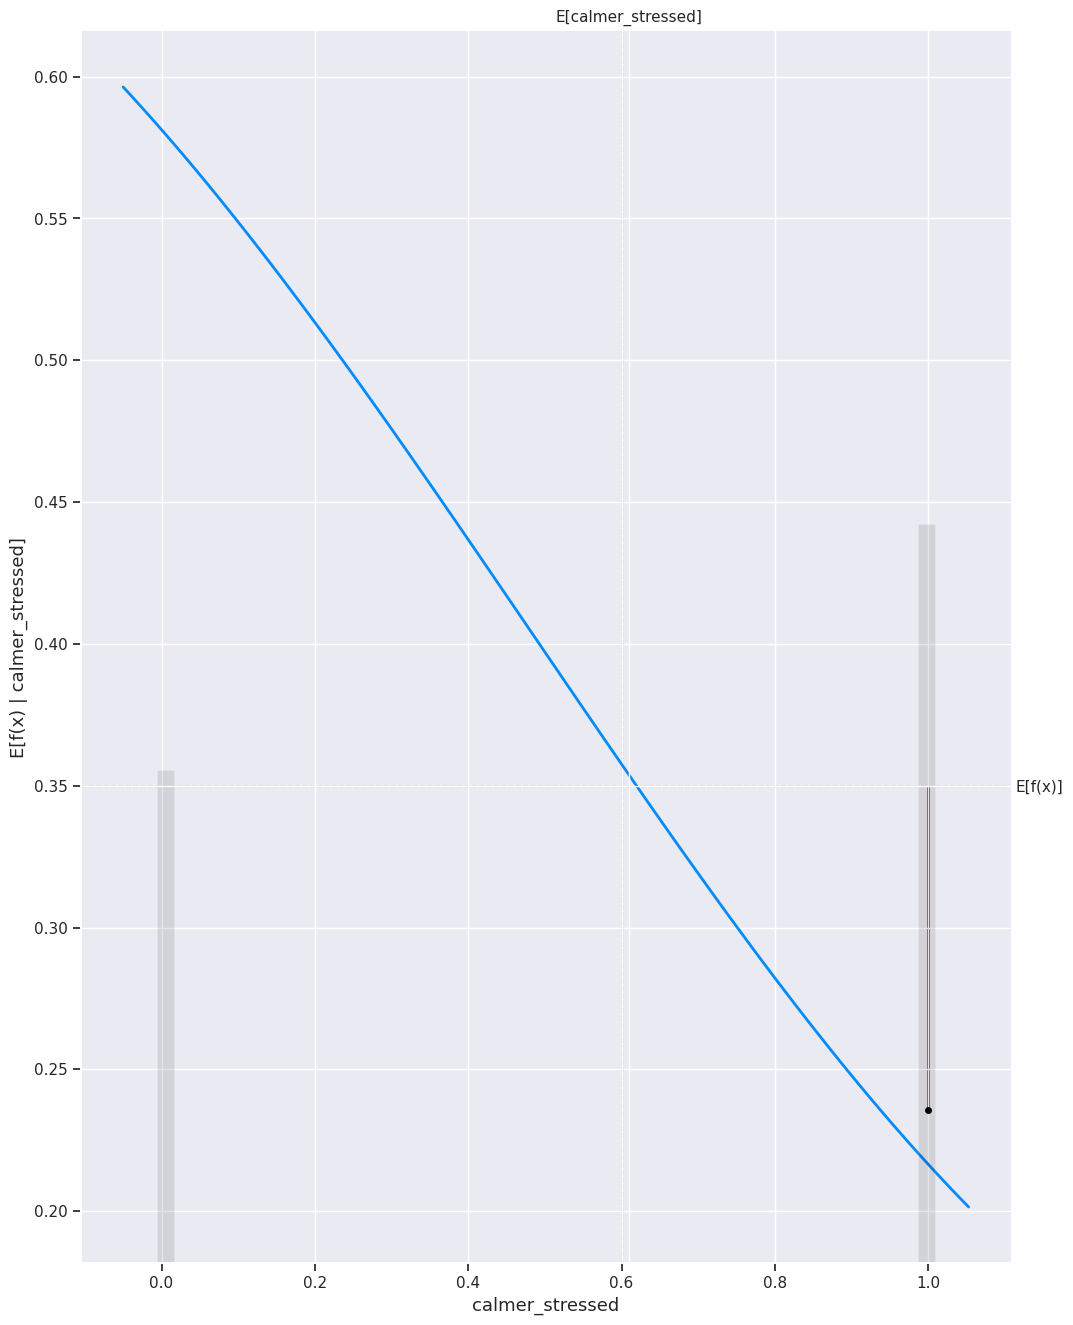

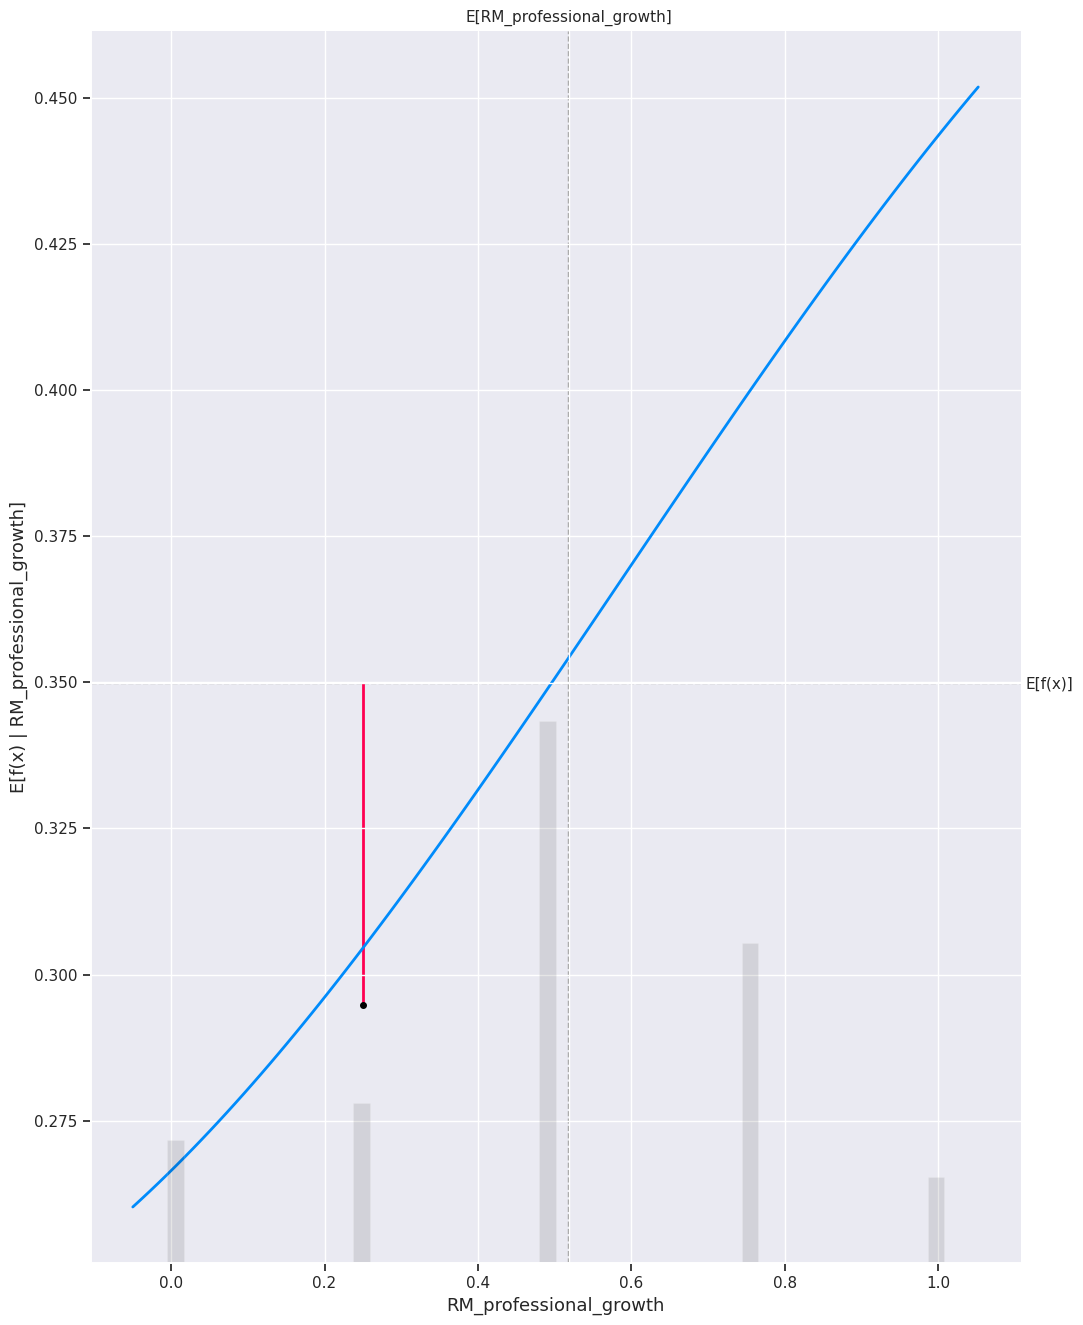

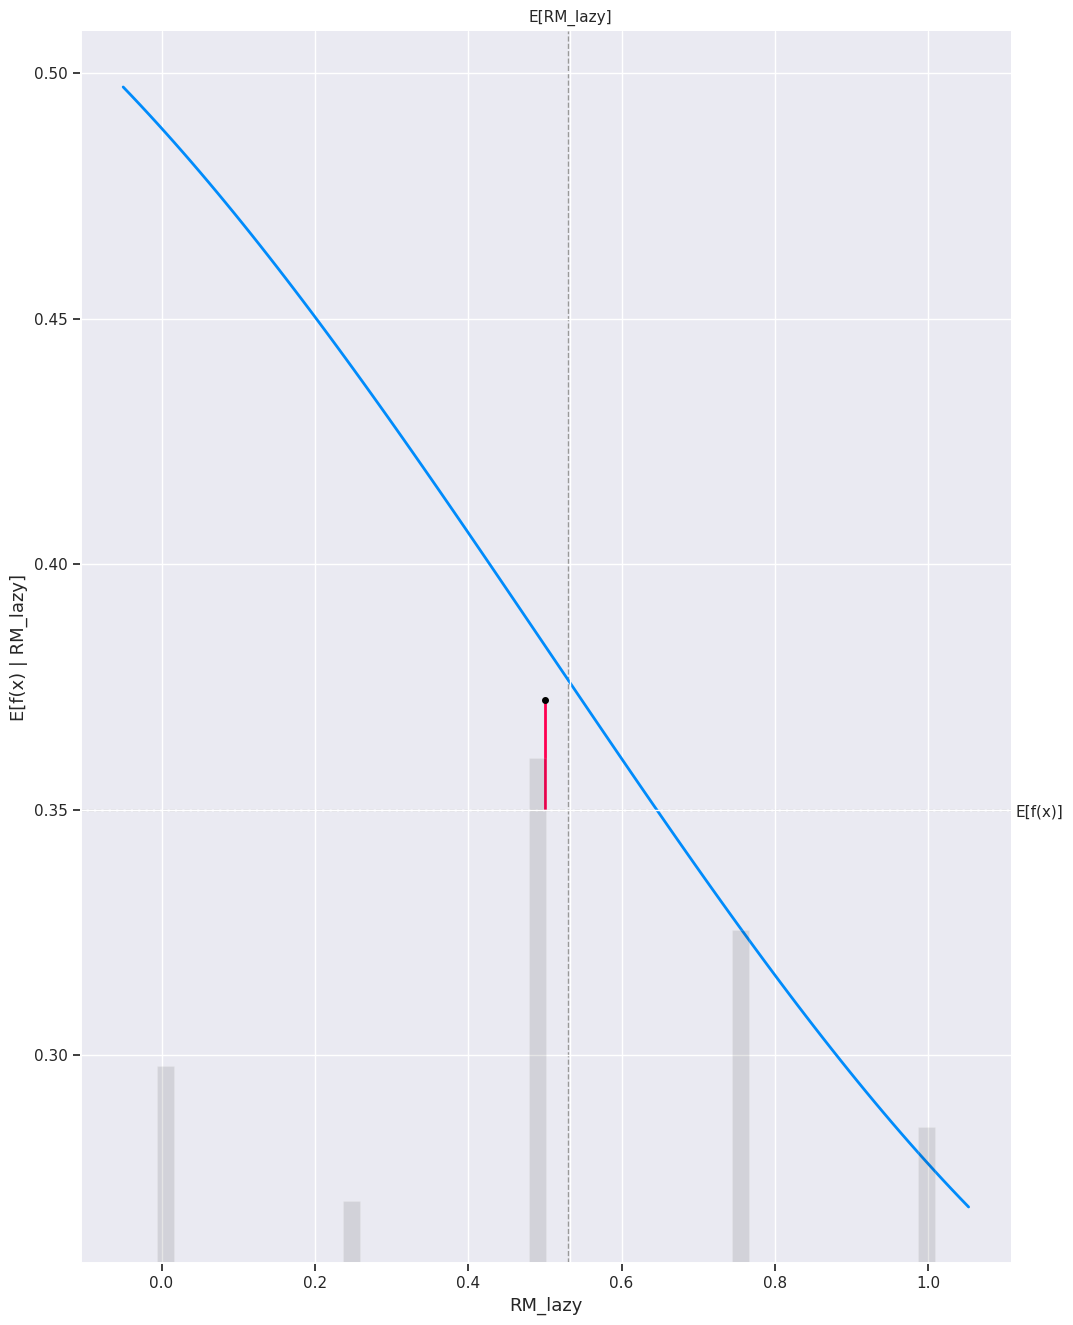

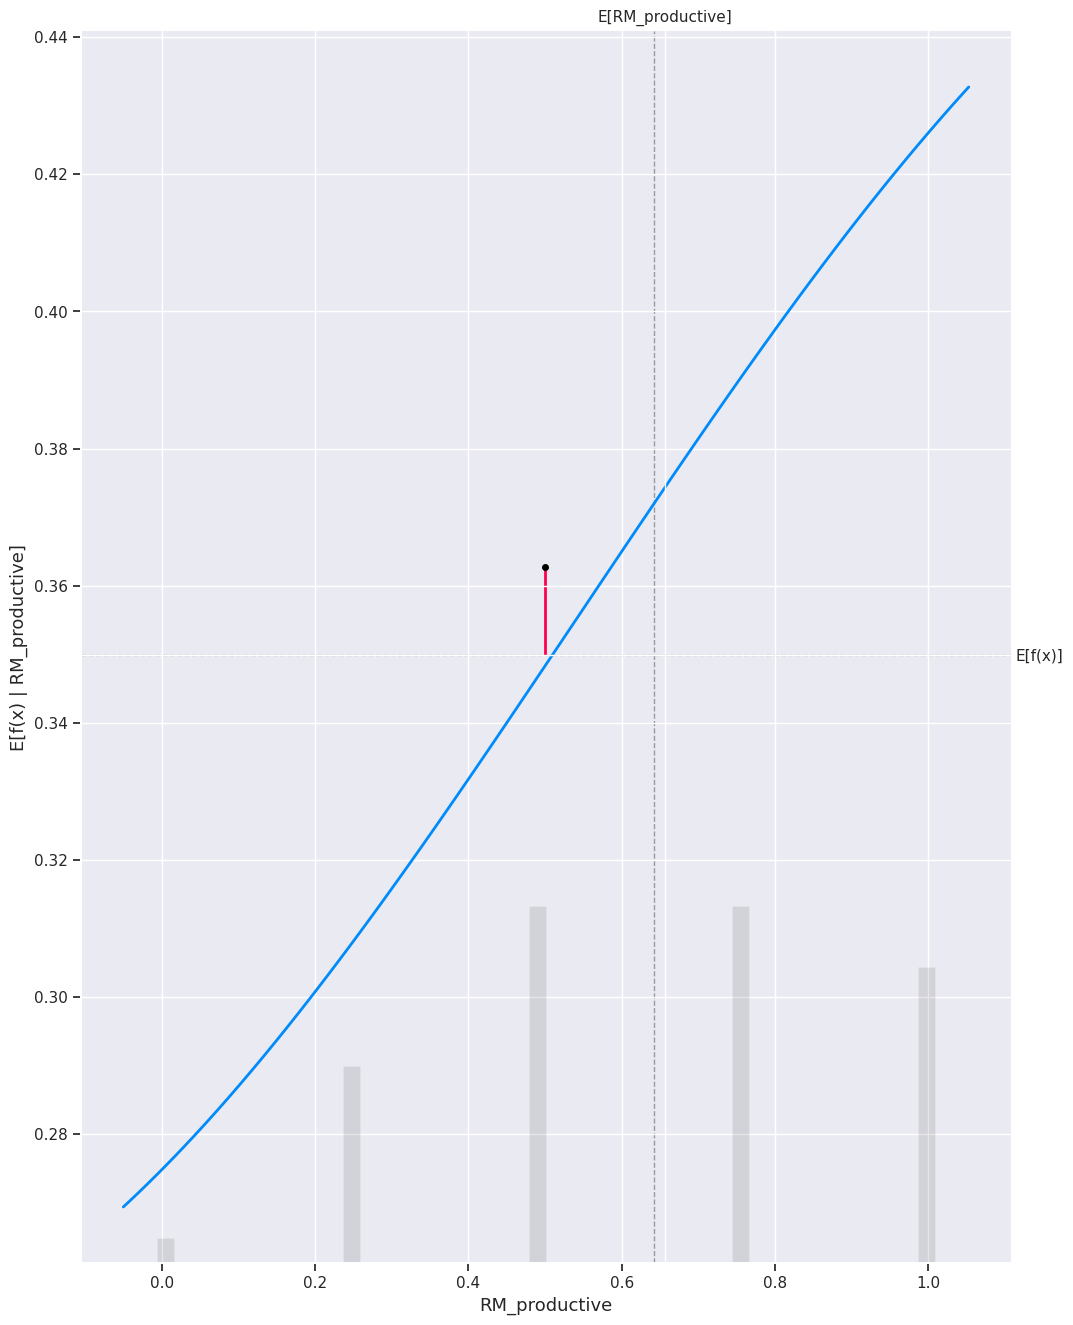

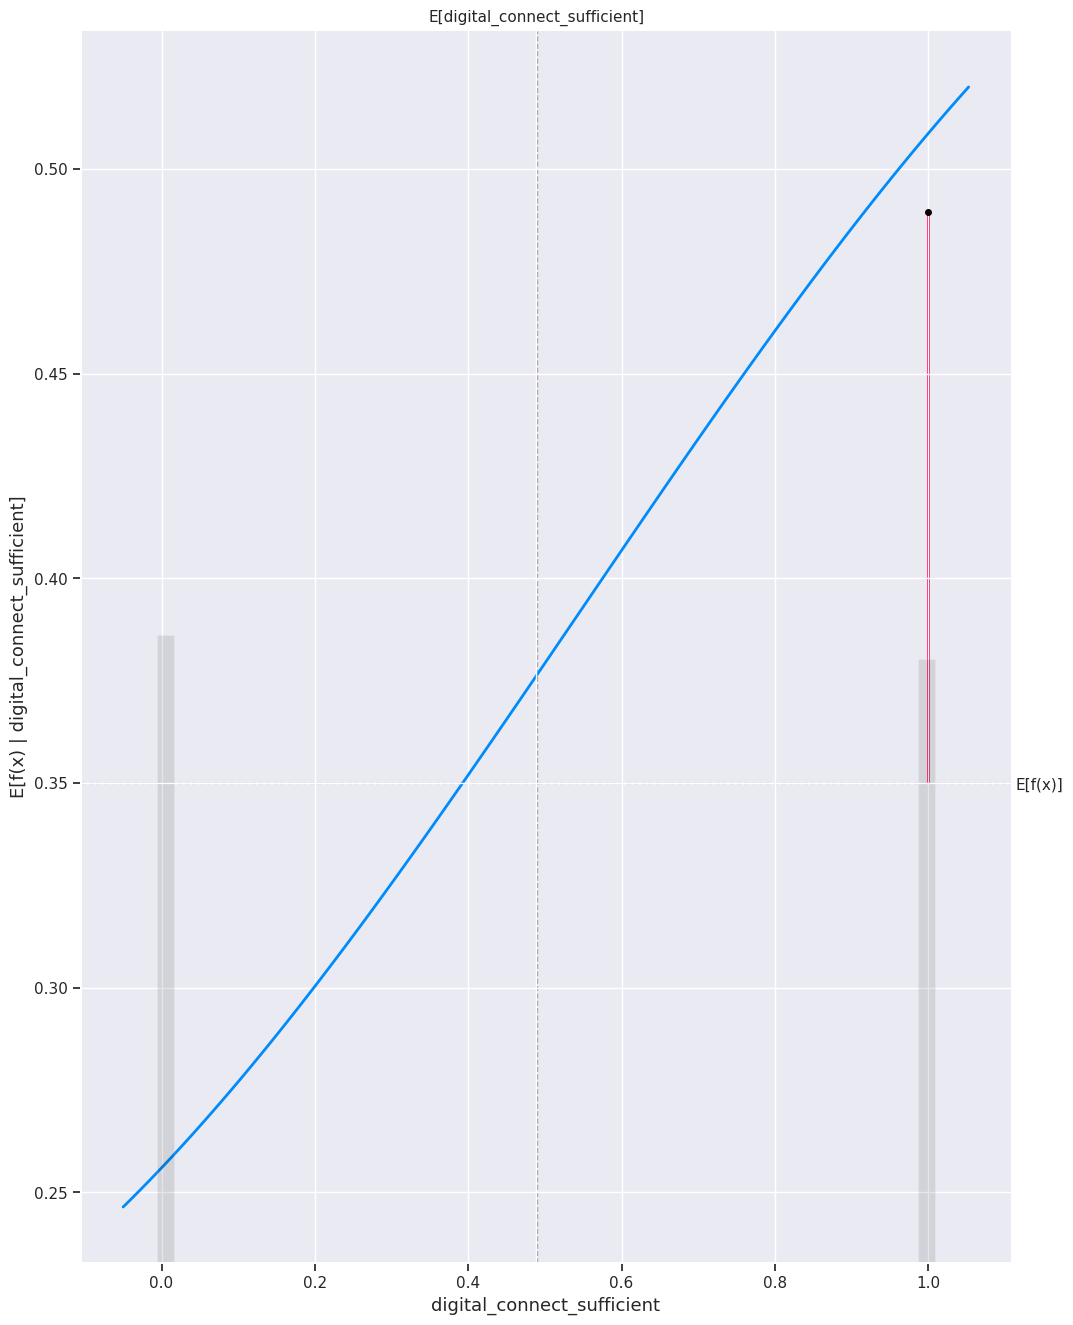

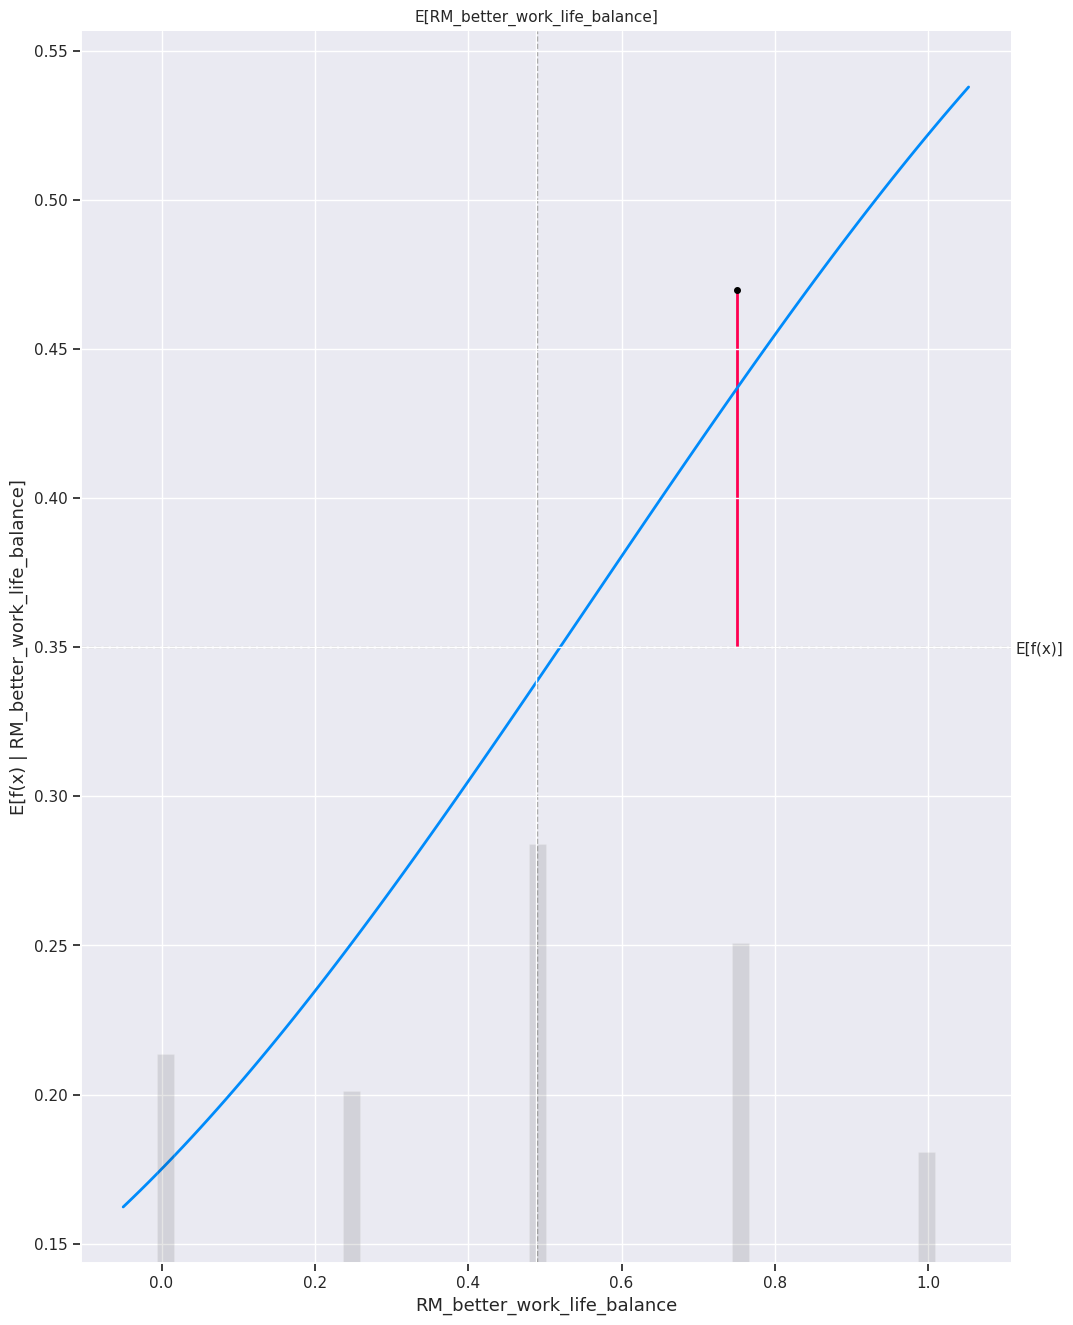

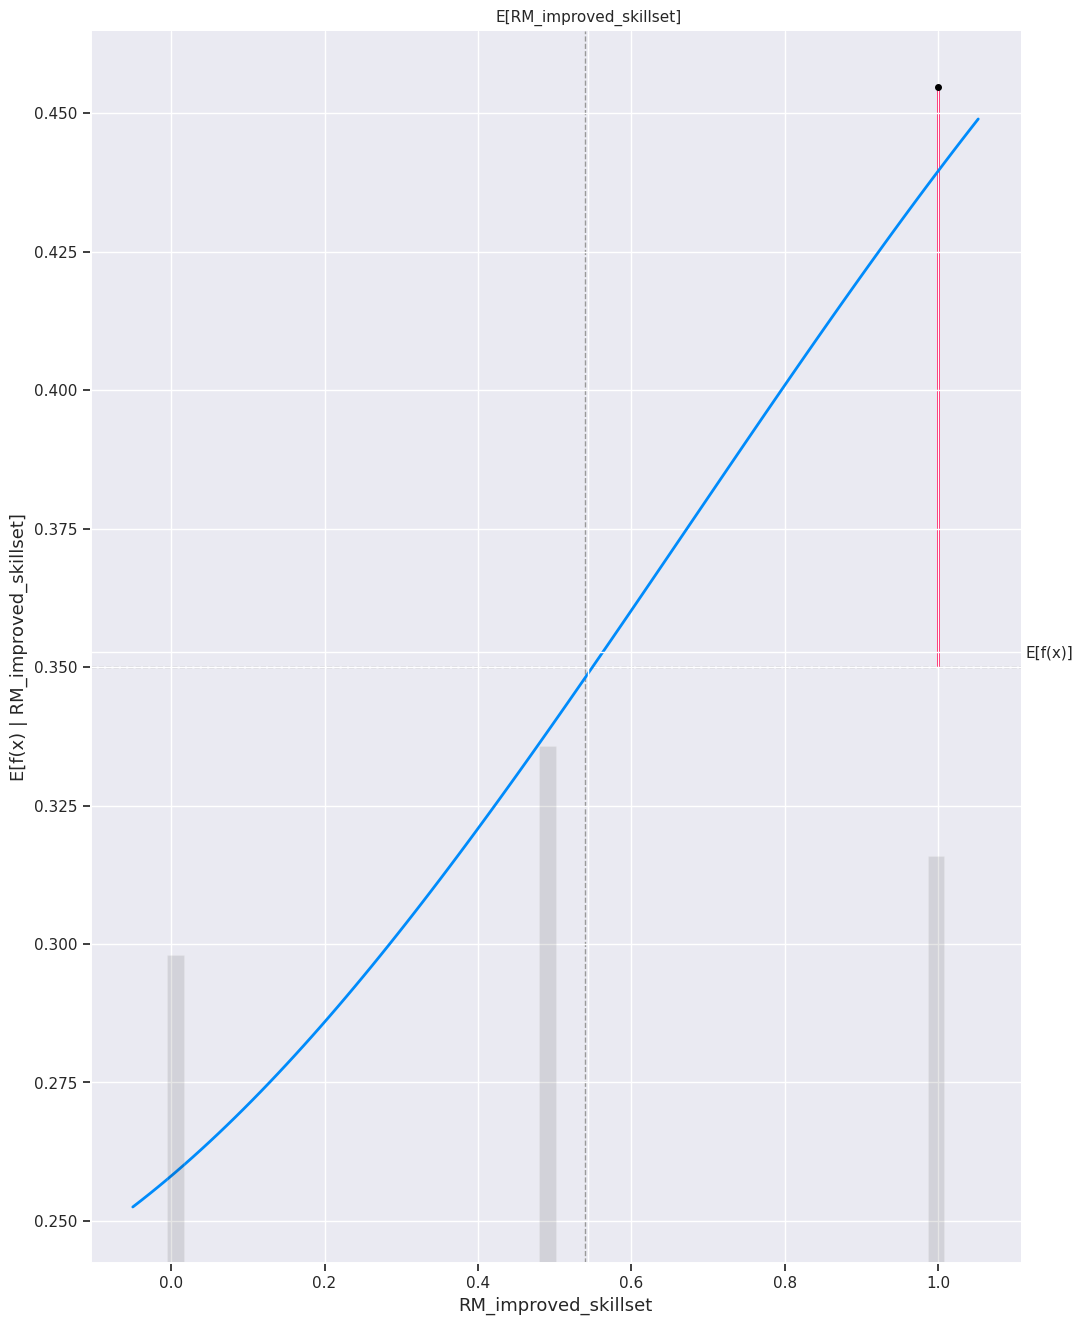

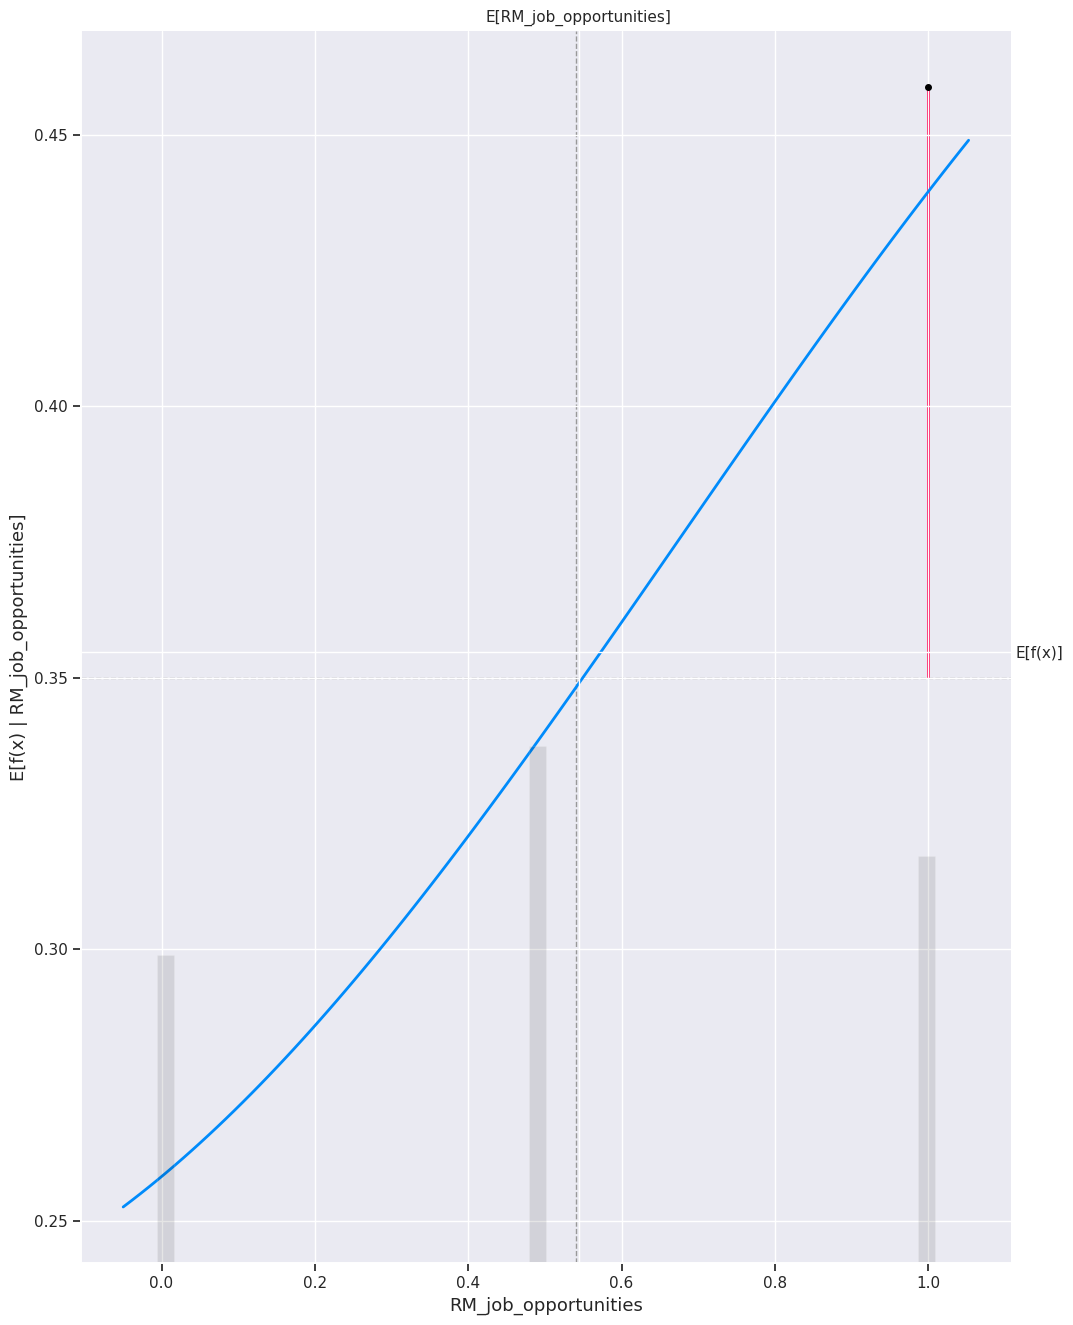

In [239]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

##**Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

The concept underlying SHAP feature importance is uncomplicated: significant features are those that have high Shapley values in absolute terms. To obtain a comprehensive understanding, we compute the mean absolute Shapley value for each feature throughout the data set. After that, we rank the features in decreasing order of importance and present them in a graph.


SHAP feature importance plot for SVM model:

Using the below plot we can come on the conclusion that the calmer_stressed is the most important feature, followed by digital_connect_sufficient and RM_job_opportunities.

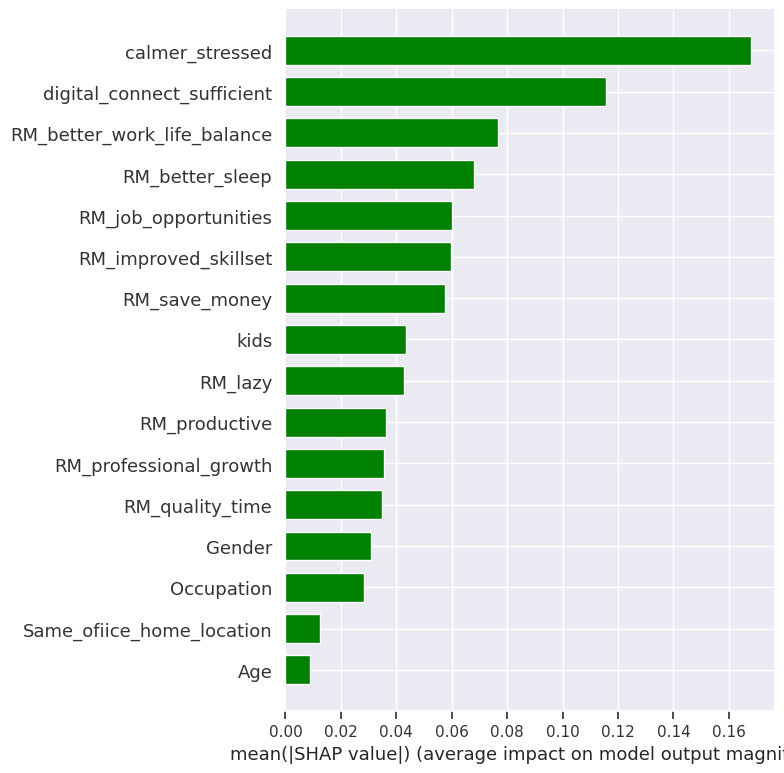

In [240]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="green")

In [241]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

##**Interpreting Waterfall SHAP visualization**

Let's consider the same sample (sample_ind = 18).
It says that f(x) = 0.9 is what we got as a model output and the expected output for this sample was 0.353. We came pretty close to determining it as the difference is only 0.547. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that kids has the biggest and most positive impact in increasing the target value of predictions by 0.17 for this specific set. Followed by RM_job_opportunities increases the target value of predictions by 0.17 for this sample, and so on. With the help of this model, we can visually explain the reason behind the output generated by this particular sample is 0.353

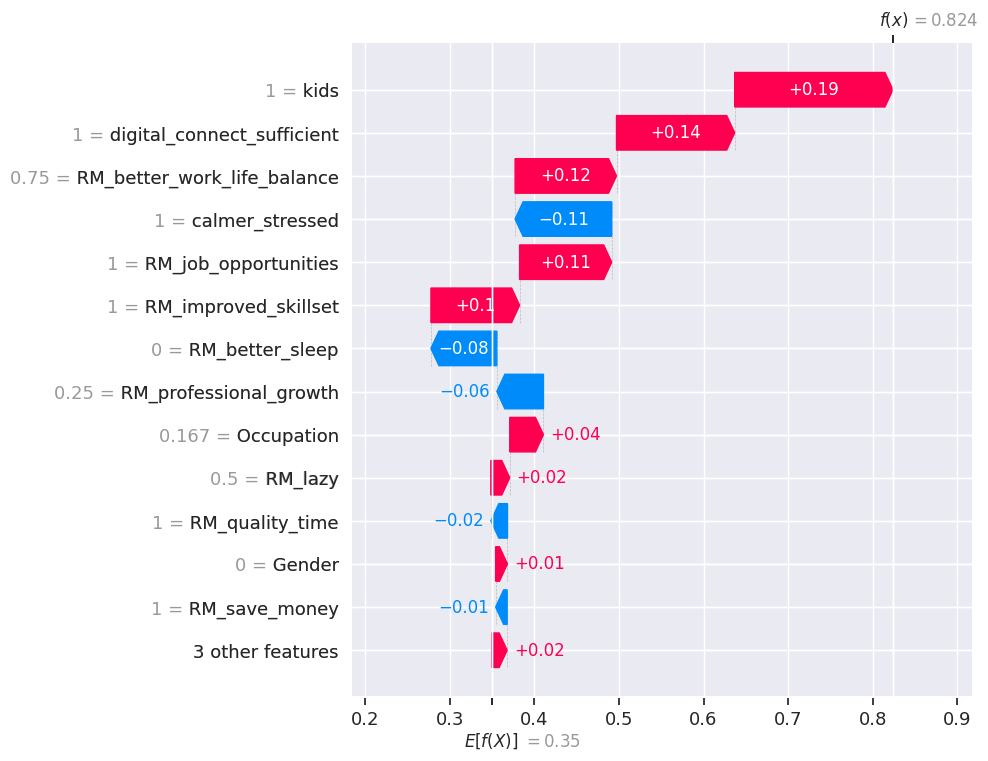

In [242]:
get_SHAP()

##**Interpret the summary plot SVM Model <br>**

• Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature of a the predictions<br>

Red color represents high values whereas blue color represents low value<br>

If a dot(a feature of predictions) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact<br>

The position of a dot(a feature of predictions) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.<br>

Let us try to understand how the features are affecting the model.<br>

Higher value of calmer_stressed tends to have a positive impact on the target of predictions <br>

Lower values of digital_connect_sufficient tend to have a positive impact on the target of predictions<br>

Higher values of RM_better_sleep tends to have a positive impact on the target of predictions<br>

Lower value of RM_save_money tends to have a positive impact on the target of predictions, and so on.<br>

We could also interpret the intensity of impact<br>

Higher amount of RM_quality_time has a much positive impact on the target of predictions but it doesn't really care if the value is low it will always have the same intensity of negative impact on the quality<br>

This visualization is very useful when it comes to interpreting how our model is working.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


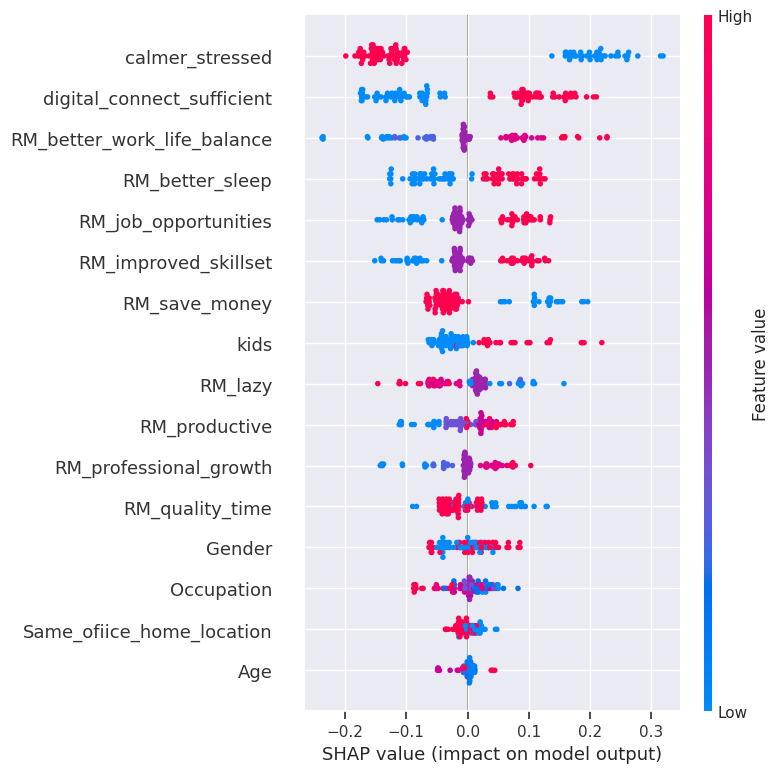

In [243]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

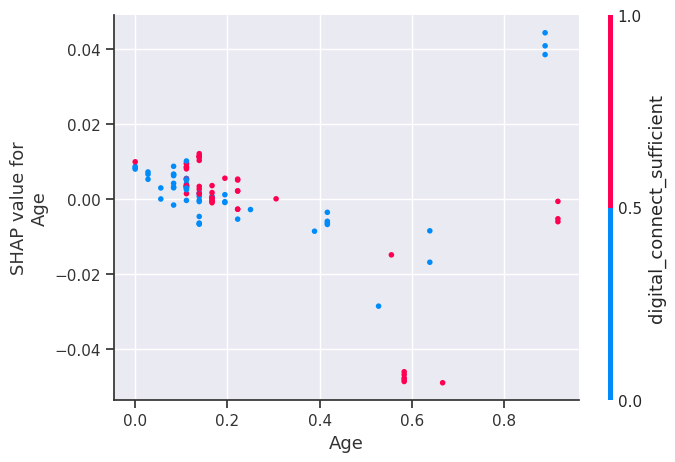

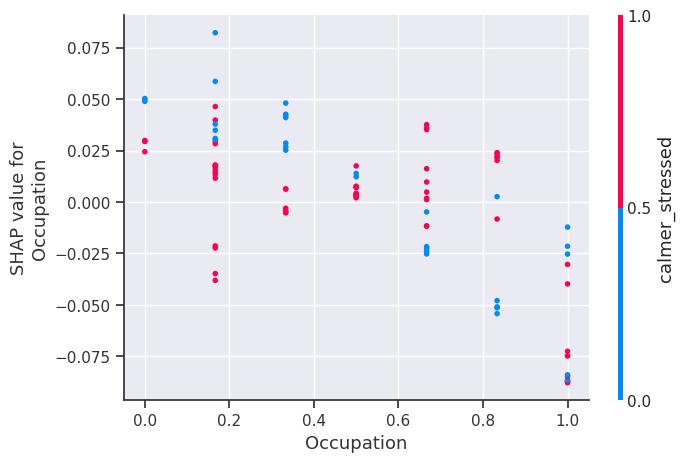

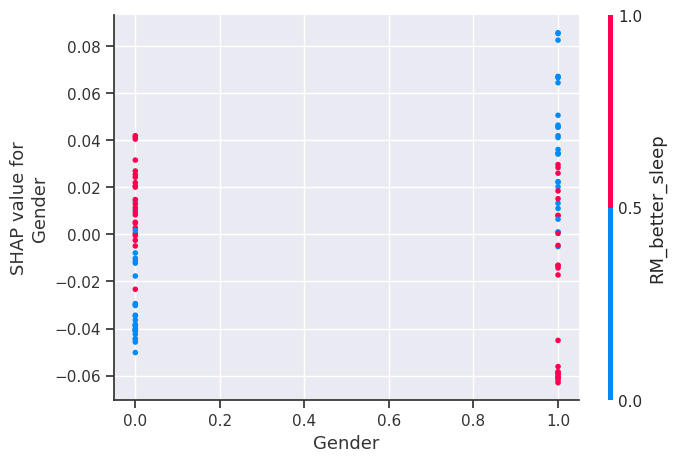

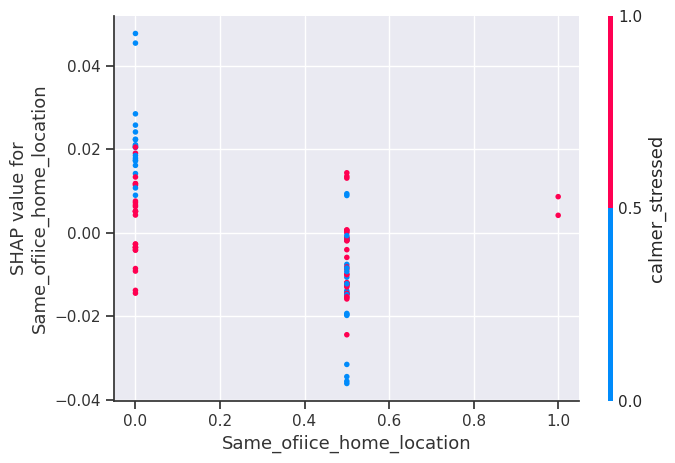

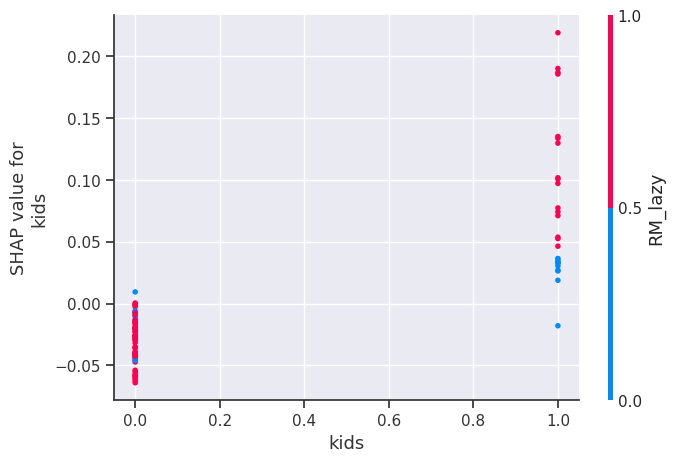

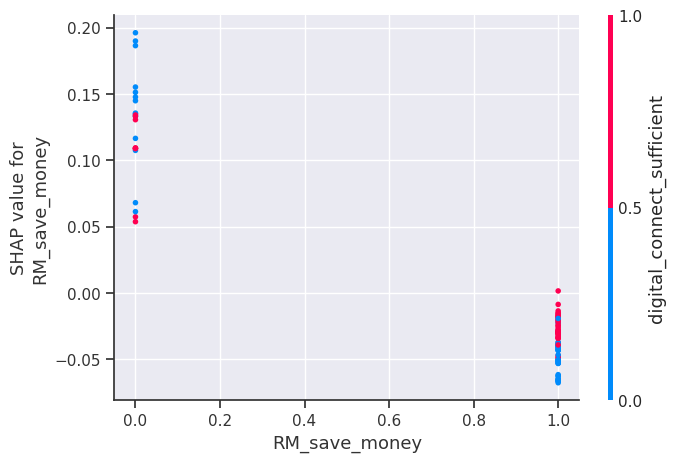

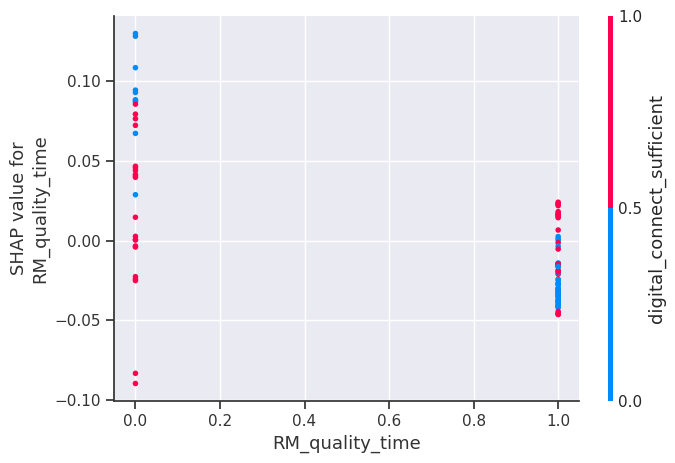

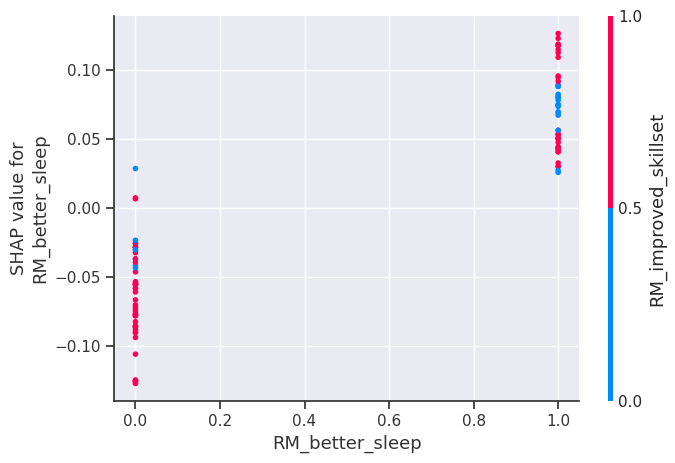

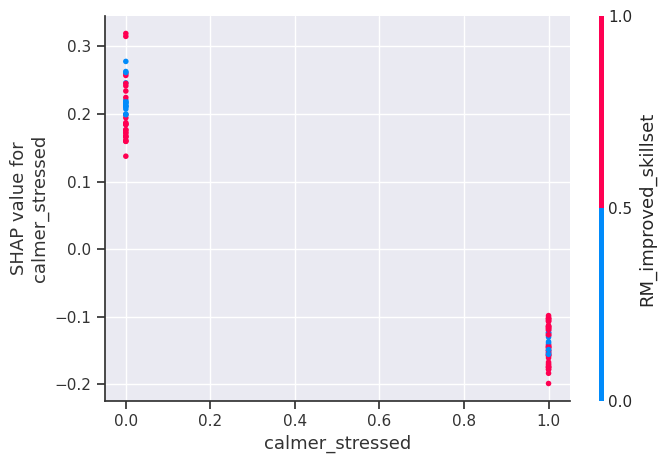

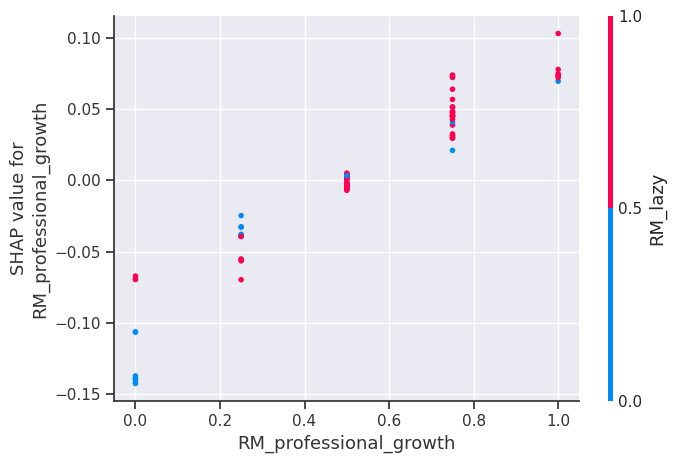

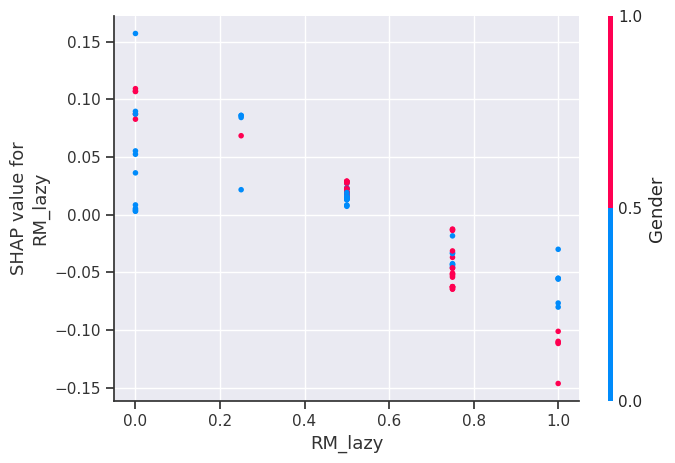

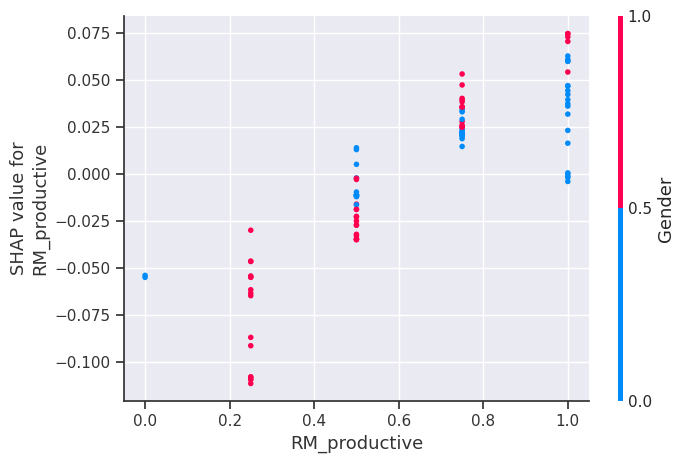

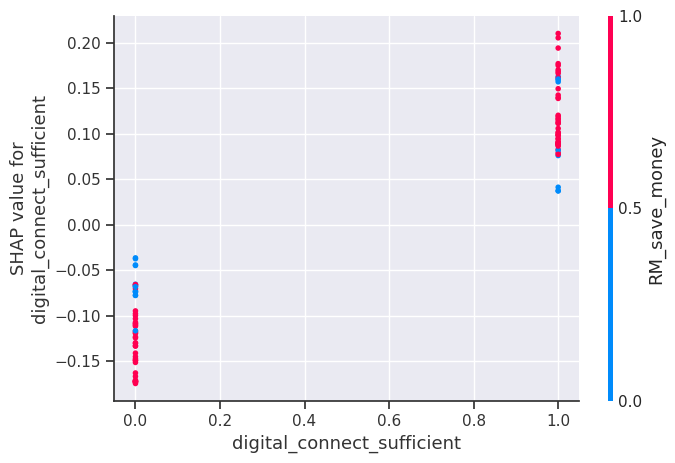

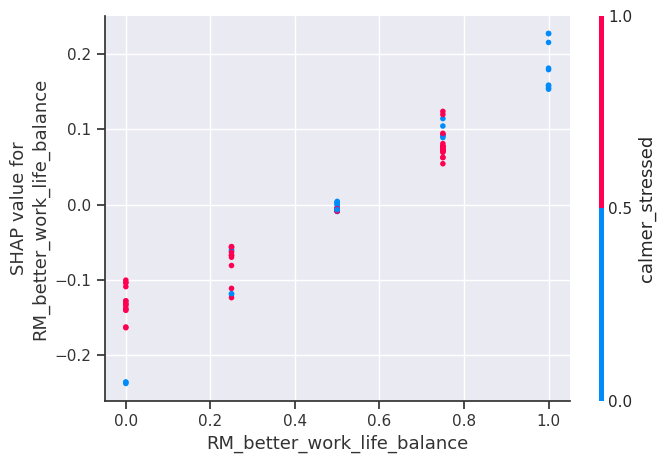

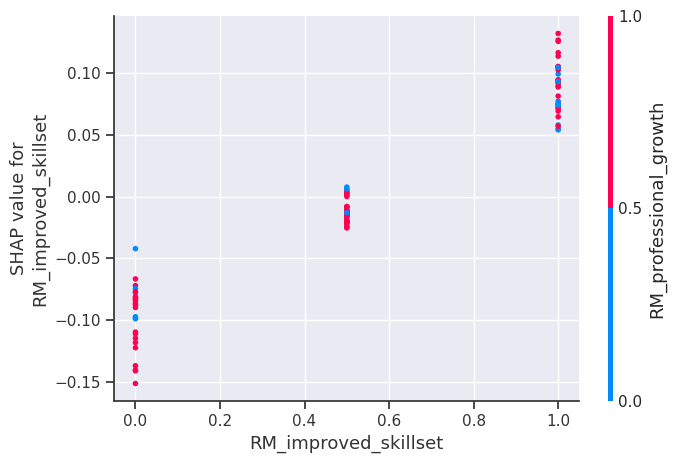

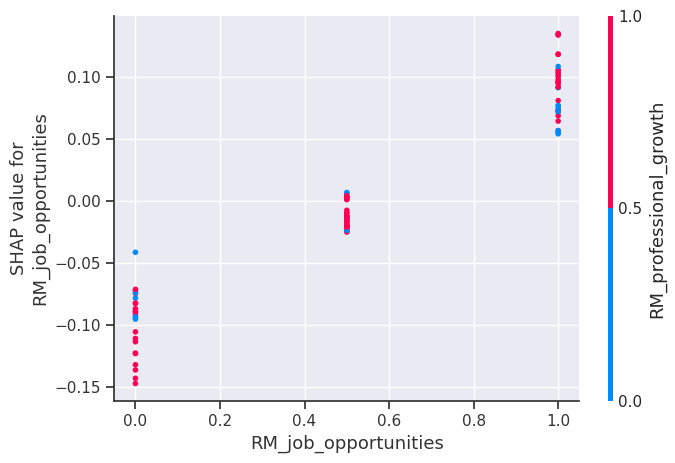

In [244]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

##**Heatmap Visualization for Linear and Tree-based model** <br>

This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(target value of predictions)

Here the Y-axis is Features

and X-axis is Instance of that feature

To determine whether an event had a positive or negative impact, its color is used as an indicator. Specifically, red indicates a positive effect, while blue indicates a negative one. Furthermore, the more intense the color, the greater the impact, with darker shades indicating more significant features.

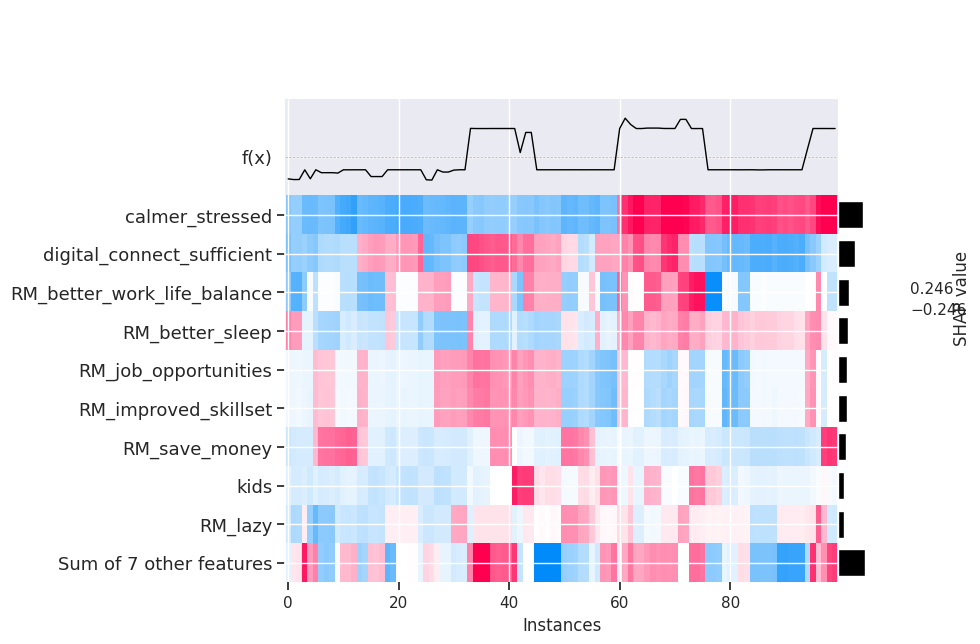

In [245]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

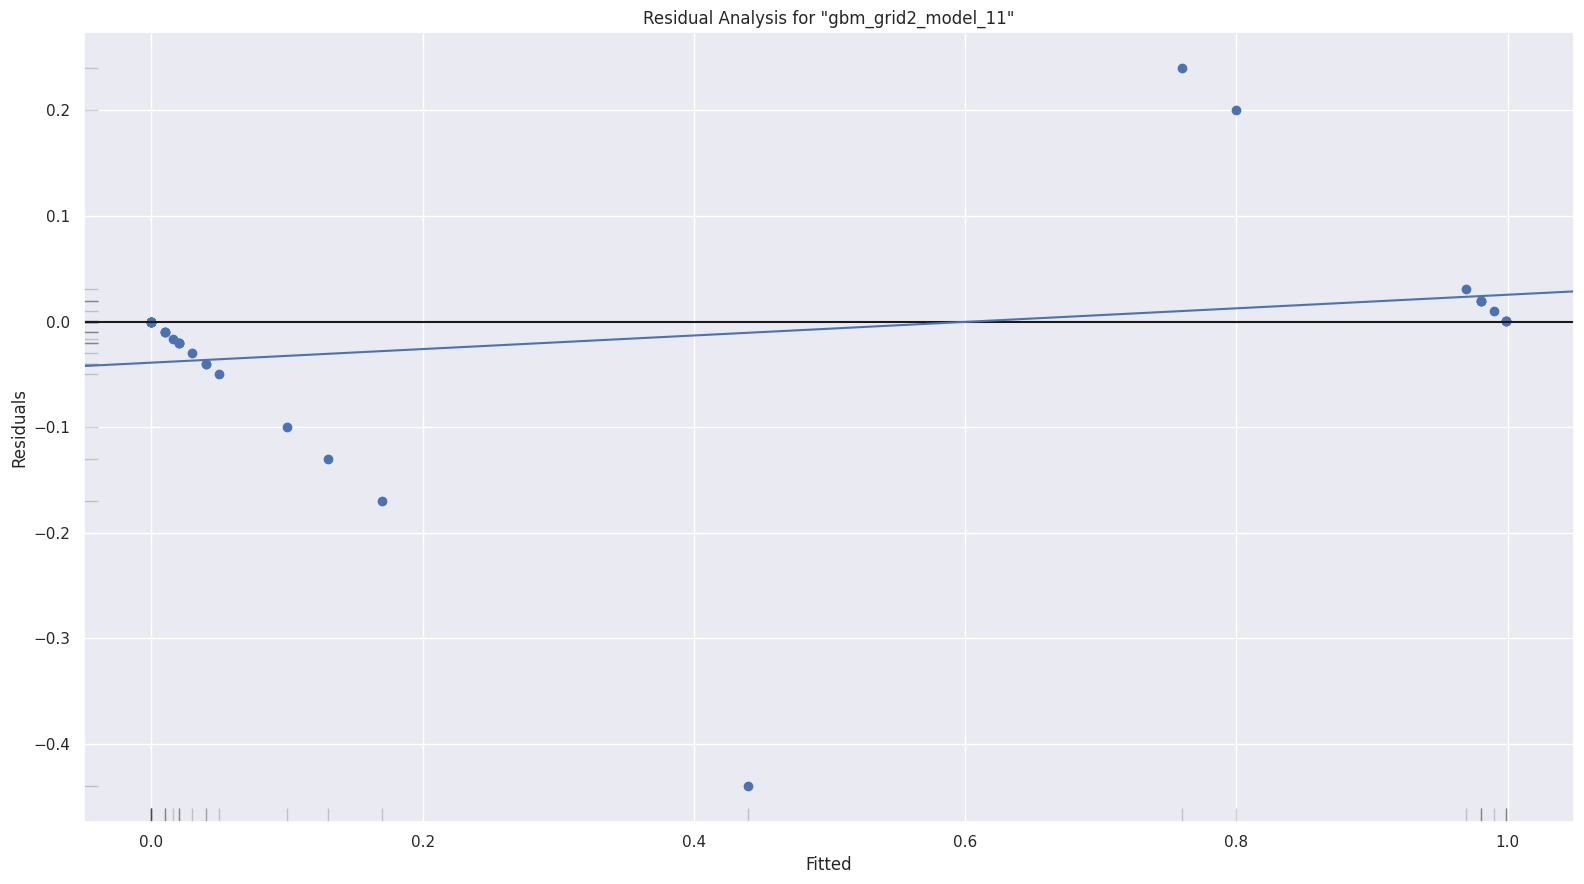

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

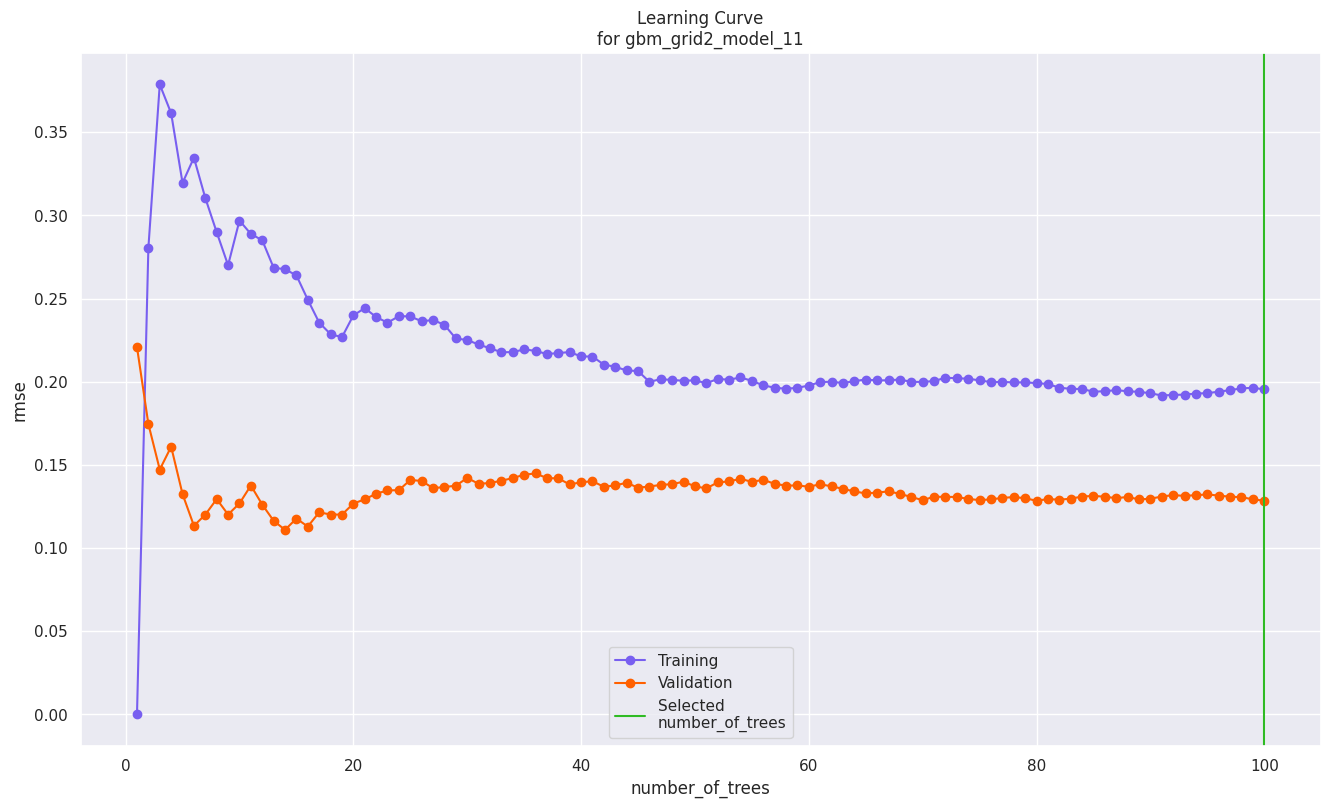

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

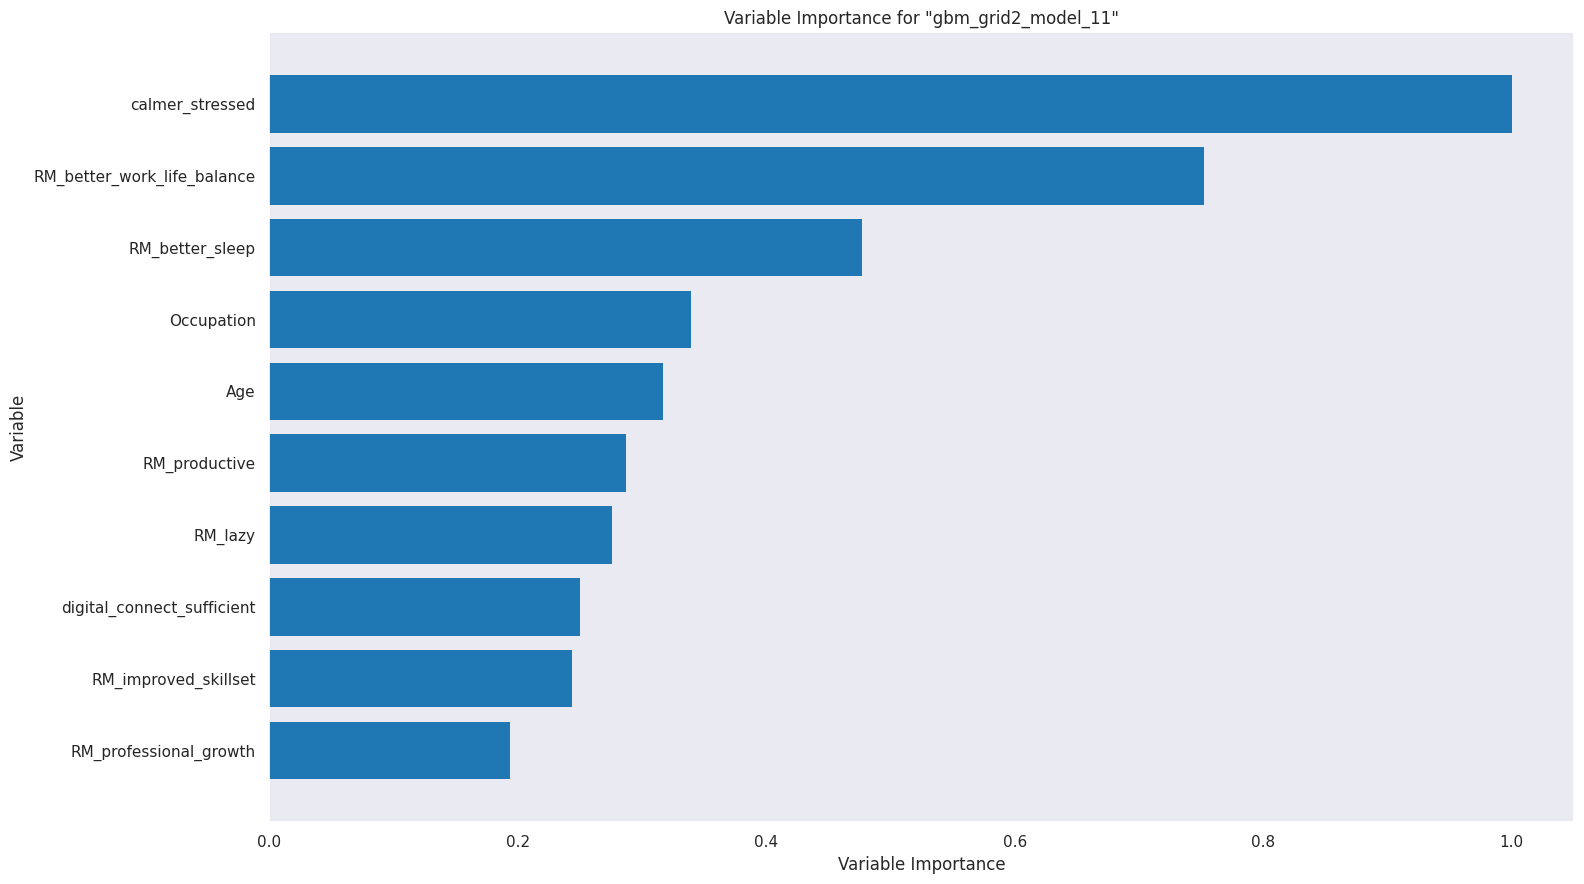

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

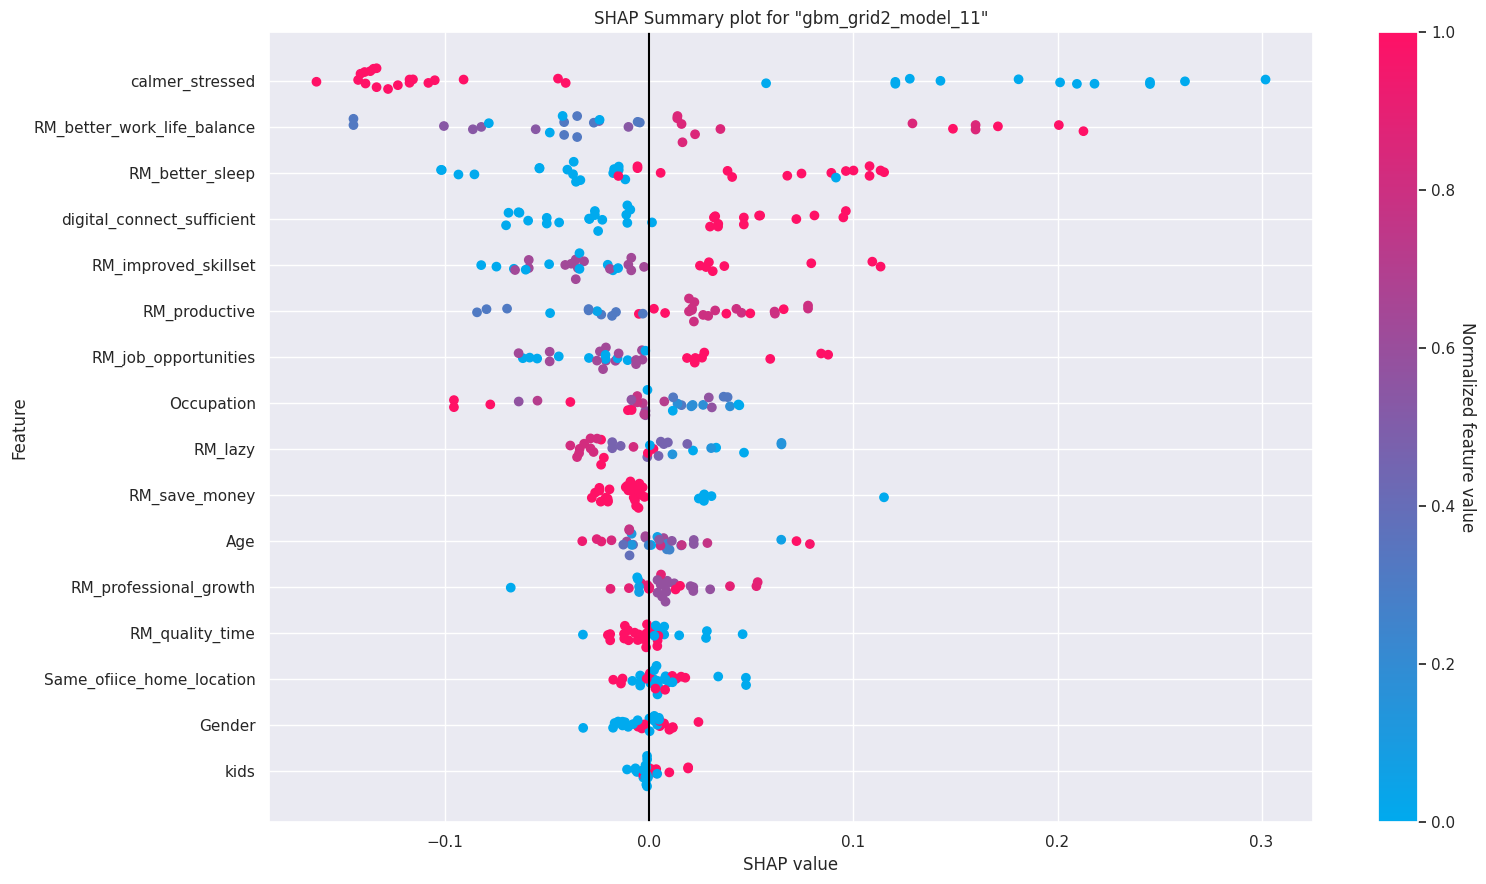

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

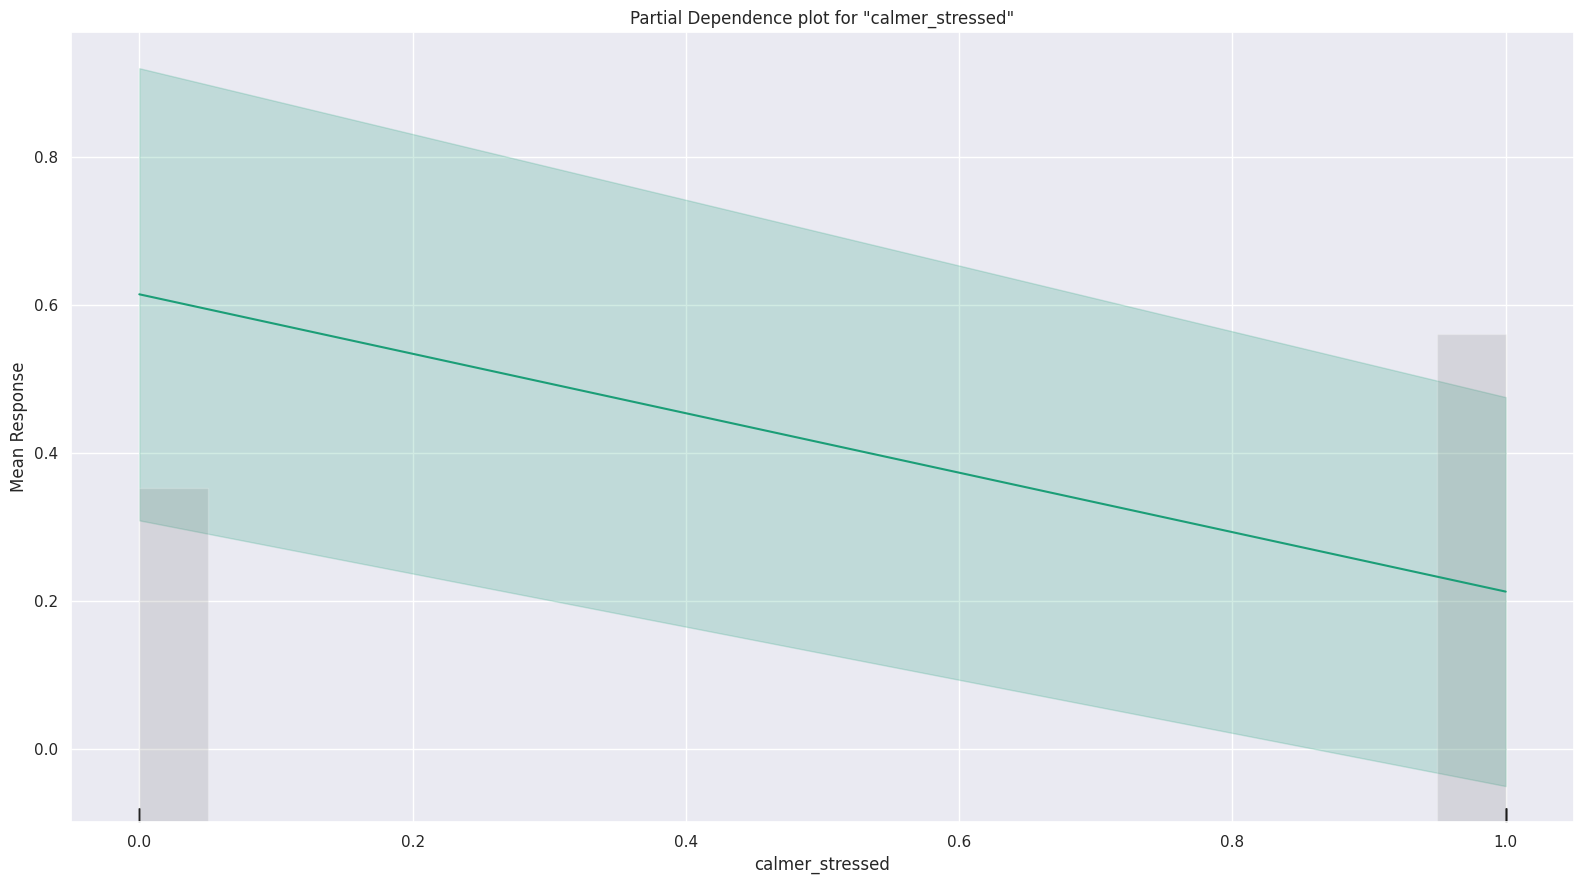

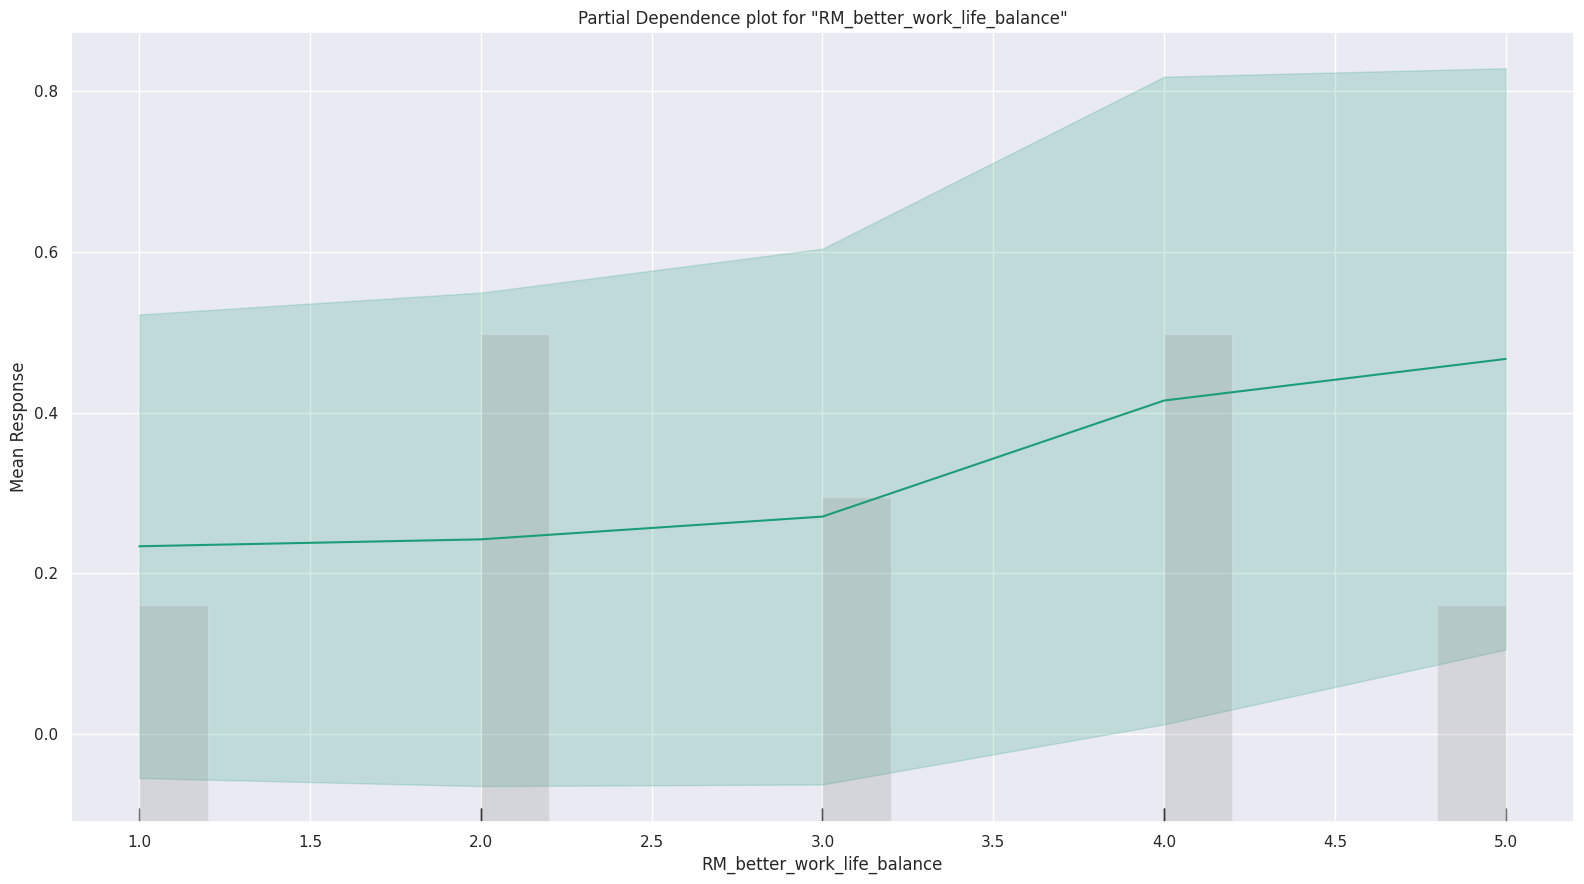

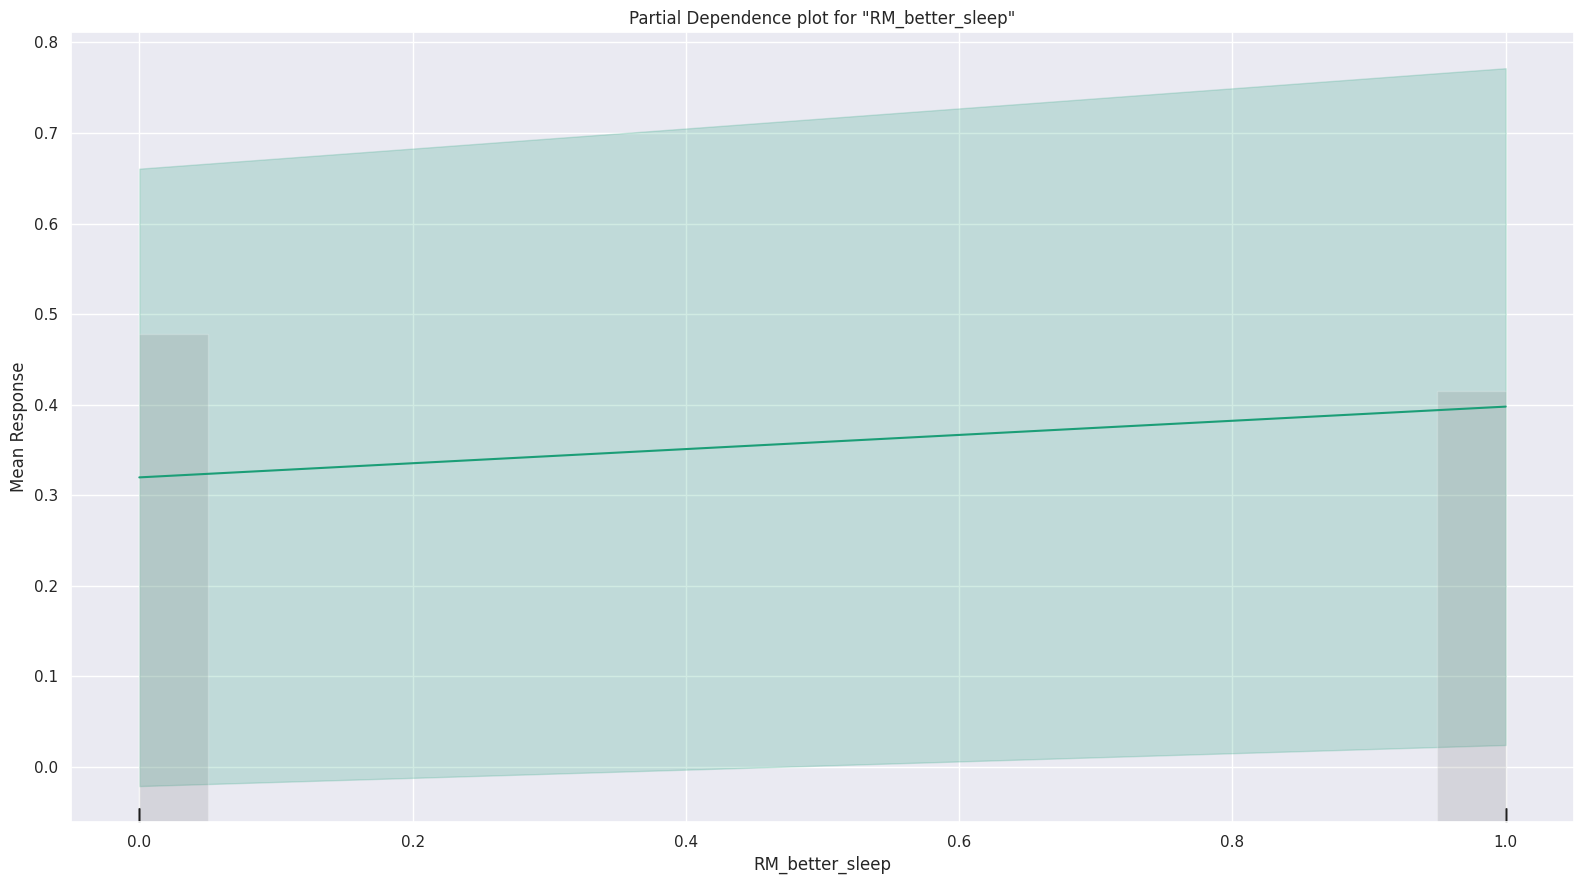

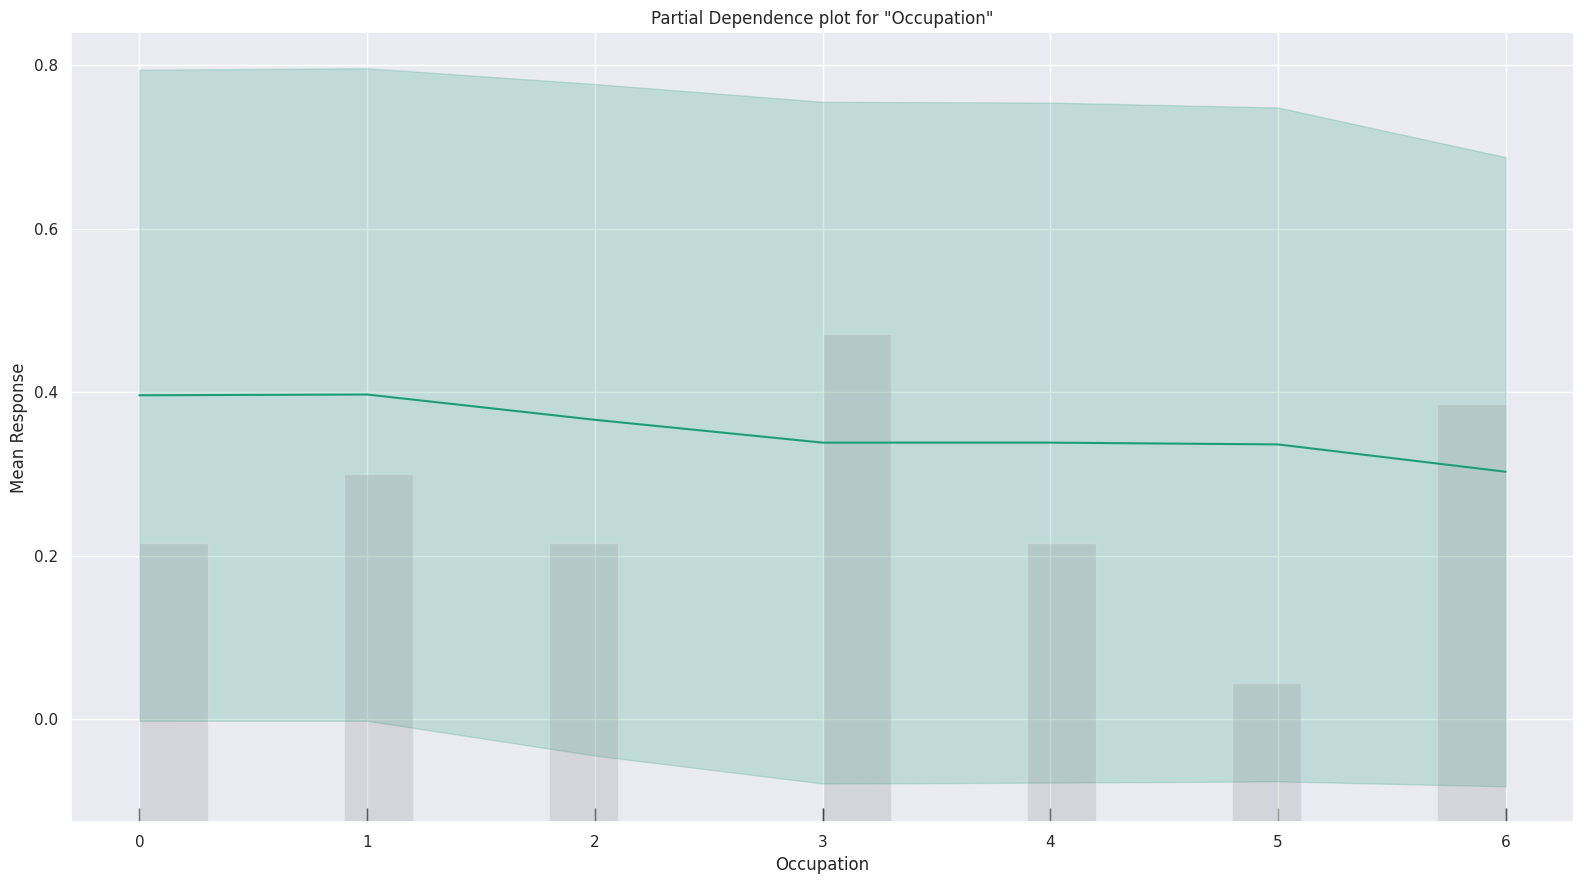

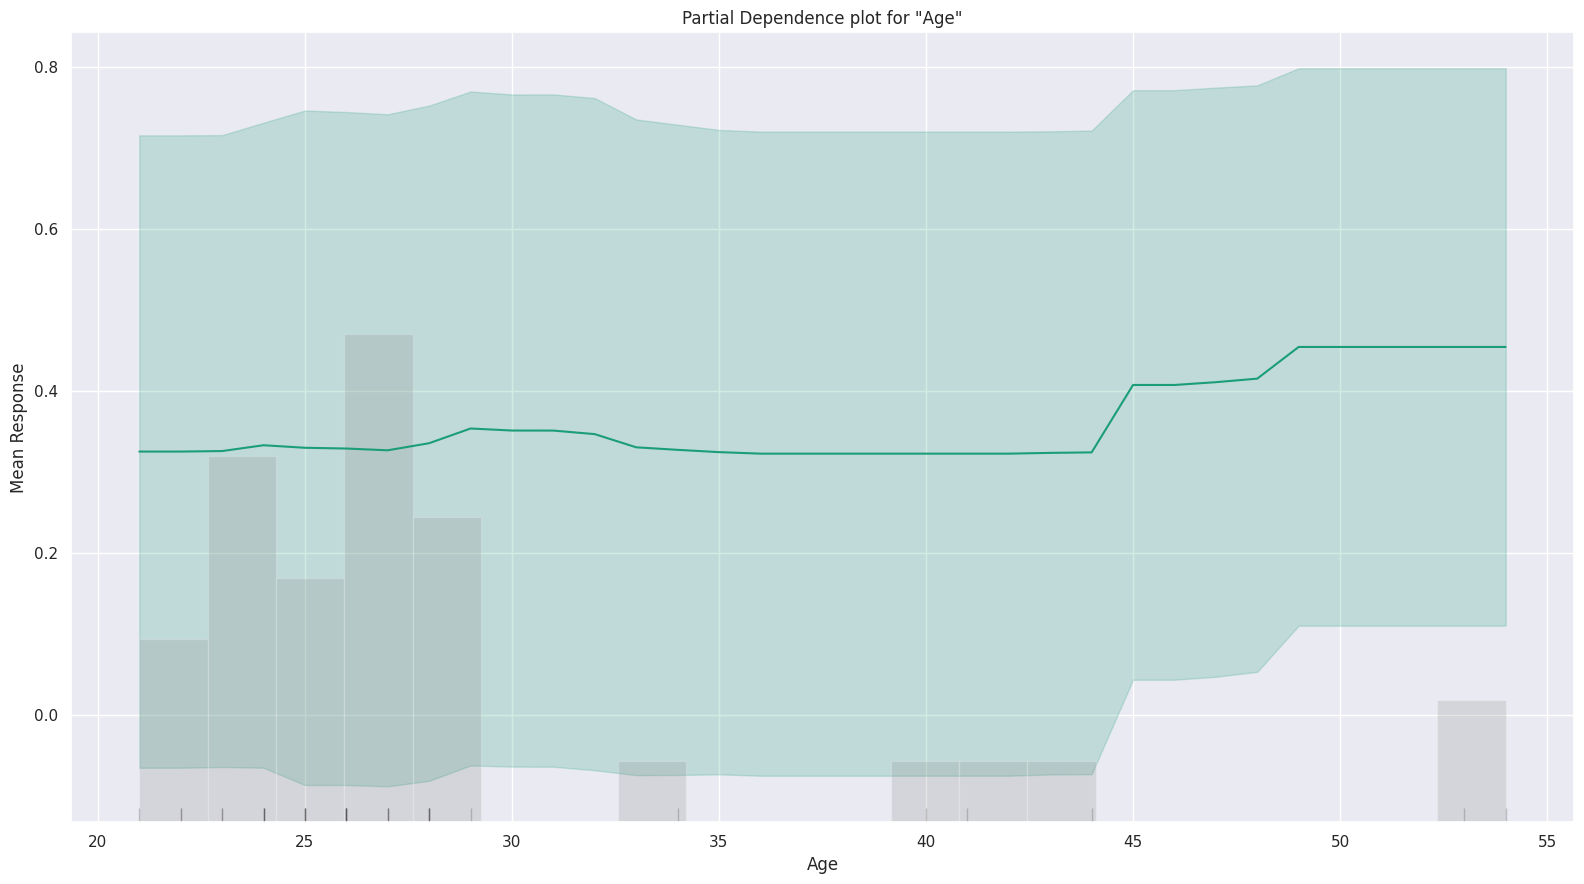

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

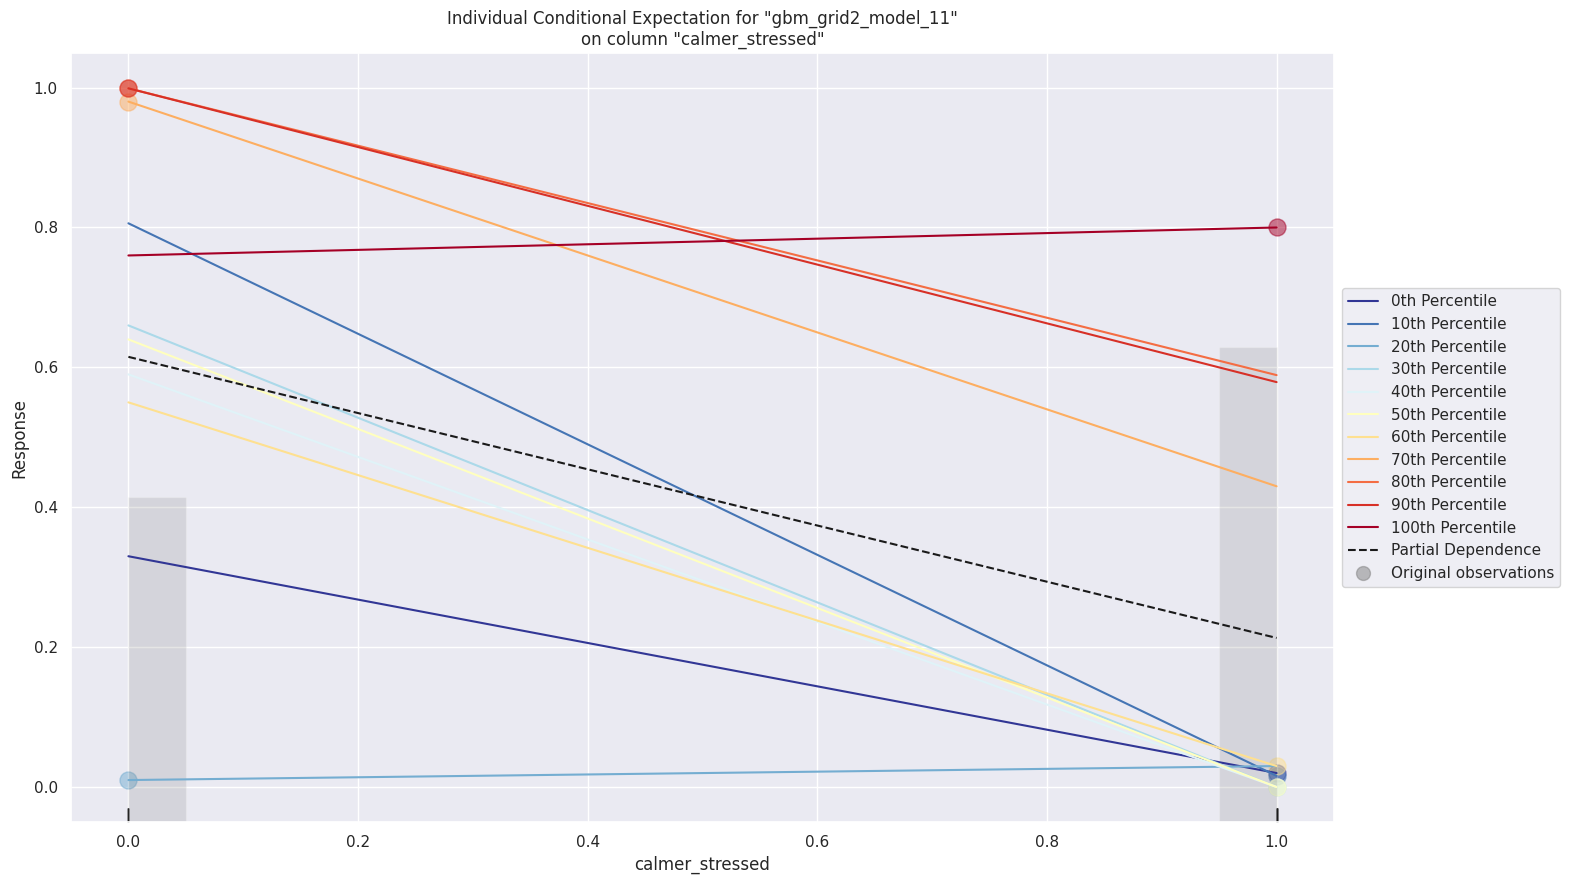

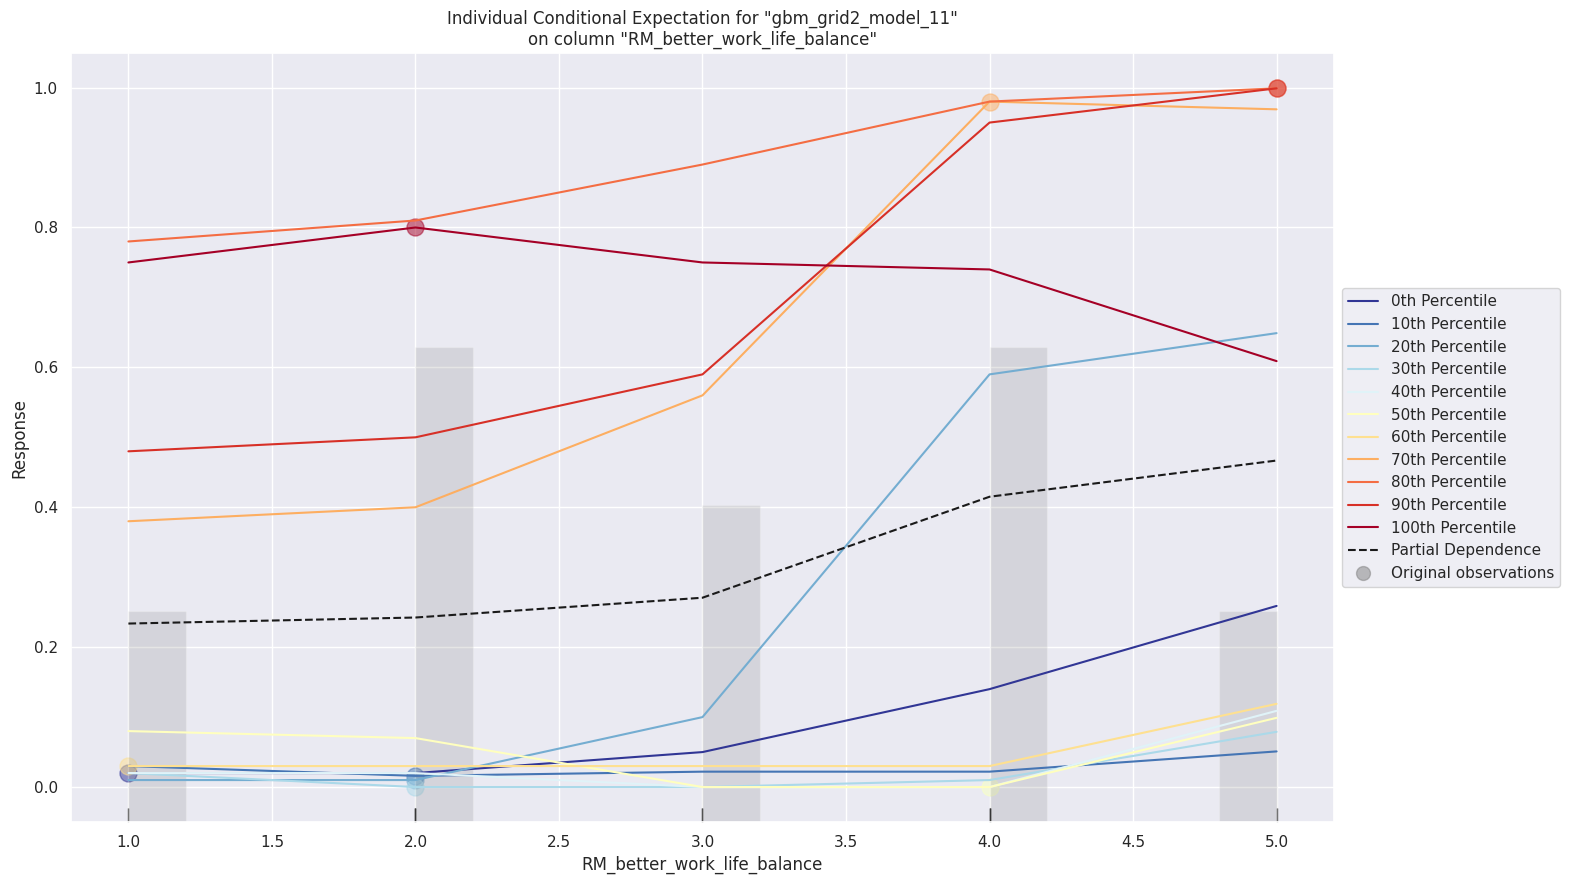

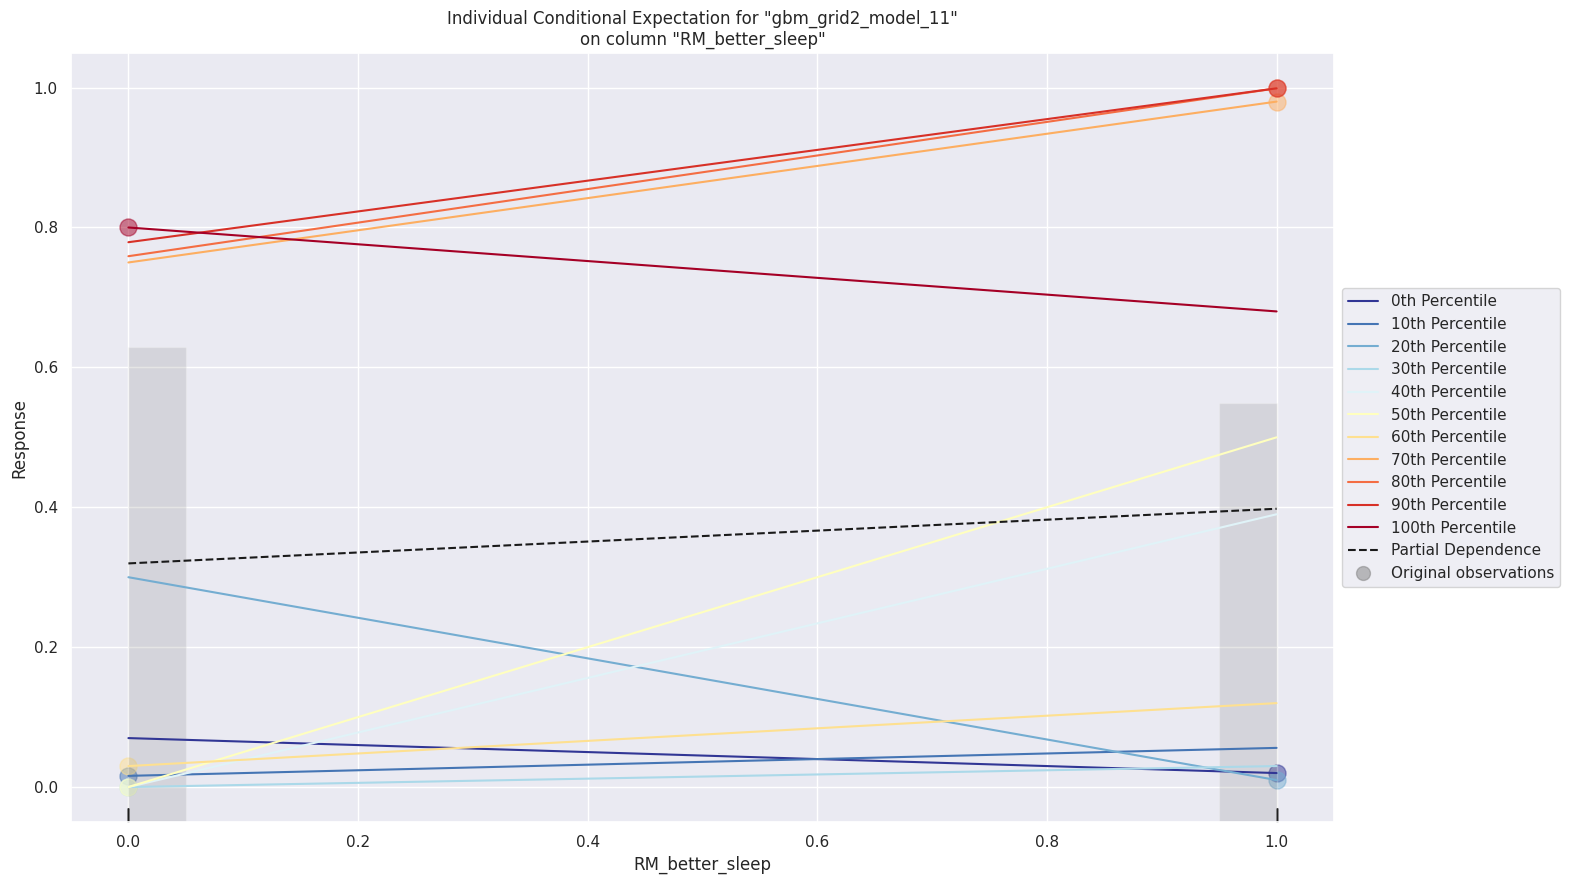

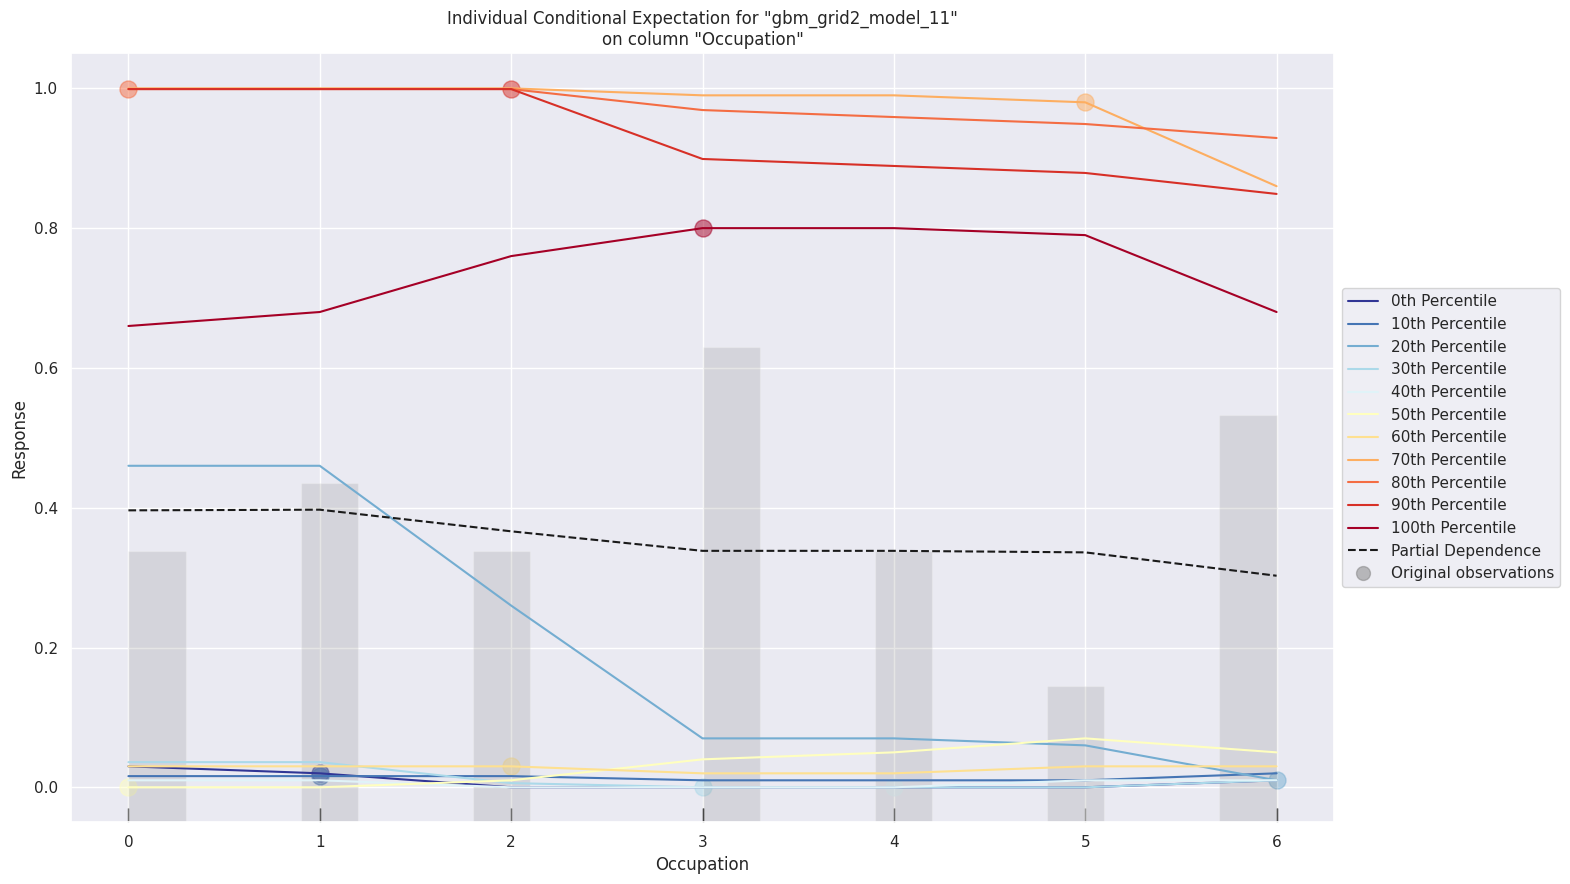

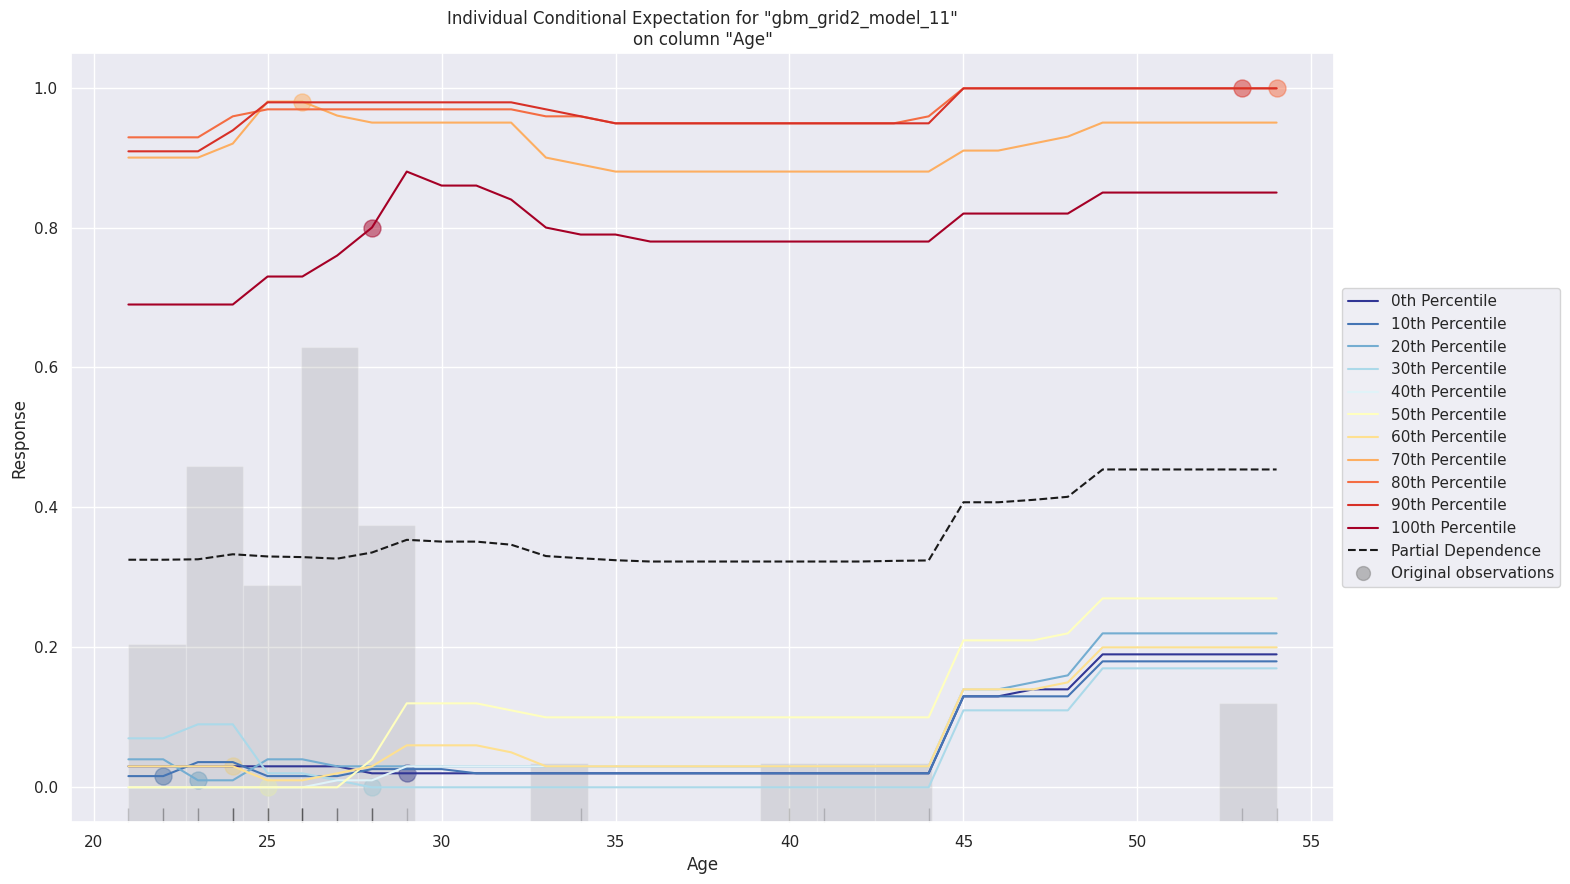

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [246]:
best_drf_model.explain(autoML[1])  # AutoML Explainability

##**Final Takeaways**
The top-performing model in this task is the AutoML's finest model with optimized hyperparameters, as it has exhibited the highest level of accuracy when compared to the other models assessed in this exercise. Furthermore, this model is easily understood, meaning we can identify the underlying factors that contributed to its predictions
##**Learning Outcomes**
Throughout the assignment, I gained an understanding of the entire project lifecycle from data preparation to hyperparameter tuning. It became clear that investing the majority of the time in data preparation - such as data cleaning, normalization, feature selection, and imputation - is crucial. Hyperparameter tuning is also a critical step that many practitioners overlook, but the results are well worth the time investment.

To ensure the best results, it's essential to train multiple models and select the best ones for deployment, as some algorithms perform better than others on specific tasks. Perhaps the most valuable takeaway from this series of assignments was learning how to interpret the models. Tools such as SHAP, LIME, and PDP have made it easier to understand what factors contribute to a model's predictions.
##**References**
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d